In [7]:
import  xihua
import  Word2Feature


import os
import  numpy as np
import  ImageUtil
import  time
import  matplotlib.pyplot as plt
time1 = time.clock()
train_X = np.load(r"KNNData\train_X.npy")
train_Y = np.load(r"KNNData\train_Y.npy")
test_X = np.load(r"KNNData\test_X.npy")
test_Y = np.load(r"KNNData\test_Y.npy")
print(train_X.shape)
print(train_Y.shape)
# print(train_X[0])
# print(train_Y[0])
print(test_X.shape)
print(test_Y.shape)
# print(test_X[0])
# print(test_Y[0])
time2 =time.clock()
print(time2-time1)

(331191, 144)
(331191, 2)
(6759, 144)
(6759, 2)
0.8023450000000025


In [8]:
class KNN(object):
    
    def __init__(self,k):
        self.k =k 
        
    def run(self,distence,label):
        arg = np.argsort(distence)
        knn_label = label[arg[:k],:]
        kind = knn_label[:,0]
        reverse = knn_label[:,1]
        unq_kind,counts_kind = np.unique(kind,return_counts=True)
        unq_reverse,counts_reverse = np.unique(reverse,return_counts=True)
        predict_kind = unq_kind[np.argmax(counts_kind)]
        predict_reverse = unq_reverse[np.argmax(counts_reverse)]
        
        return np.array([predict_kind,predict_reverse]) 

协 0 错 0 魄 1 猾 0 塘 0 蛹 1 叮 0 .gif
夏 0 赘 1 讽 0 爽 1 异 0 肴 0 芒 0 .gif
妻 1 尺 0 鹊 0 背 0 向 0 彪 1 徒 0 .gif
山 0 形 0 收 0 哀 0 备 1 棒 0 菌 0 .gif
怎 1 苟 0 涧 0 诡 0 广 0 秸 0 秧 1 .gif
挫 0 弹 1 牙 0 竖 1 身 0 谣 0 炎 0 .gif
柏 0 烹 0 挖 0 雄 0 待 0 艺 0 罪 1 .gif
求 0 管 0 怪 1 员 0 煎 0 雁 0 停 0 .gif
狠 0 诗 0 填 0 芒 1 峦 0 址 0 吮 1 .gif
狭 0 蚤 0 悼 1 徘 0 牛 0 波 0 府 1 .gif
羡 1 热 0 徊 0 马 0 铸 0 茫 0 辉 1 .gif
肝 0 卜 1 谋 0 愿 0 唧 0 狈 0 矛 1 .gif
胃 0 超 0 席 1 氏 0 愕 0 袁 0 祭 1 .gif
胶 1 摧 0 纺 0 狂 0 布 0 渠 0 炸 0 .gif
脉 0 萌 1 朵 0 至 0 星 0 枣 1 嫉 0 .gif
茂 0 赤 0 呀 0 茶 1 暂 0 氧 0 首 0 .gif
裂 0 缝 0 困 0 挑 1 兴 0 耕 1 智 0 .gif
诽 0 歪 1 蓄 0 赤 0 儿 0 熏 0 蚁 0 .gif
贪 0 楔 0 卦 1 哎 0 歉 1 楼 0 葛 0 .gif
鸳 1 尾 0 饲 0 茂 1 遏 0 富 0 青 0 .gif
1 准确率：汉字识别成功率0.292857,反转识别成功率0.835714，F1score0.693333,同时识别成功率0.292857
协 0 错 0 魄 1 猾 0 塘 0 蛹 1 叮 0 .gif
夏 0 赘 1 讽 0 爽 1 异 0 肴 0 芒 0 .gif
妻 1 尺 0 鹊 0 背 0 向 0 彪 1 徒 0 .gif
山 0 形 0 收 0 哀 0 备 1 棒 0 菌 0 .gif
怎 1 苟 0 涧 0 诡 0 广 0 秸 0 秧 1 .gif
挫 0 弹 1 牙 0 竖 1 身 0 谣 0 炎 0 .gif
柏 0 烹 0 挖 0 雄 0 待 0 艺 0 罪 1 .gif
求 0 管 0 怪 1 员 0 煎 0 雁 0 停 0 .gif
狠 0 诗 

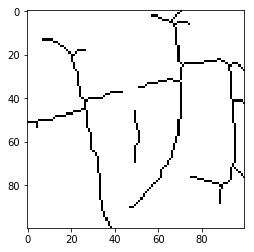

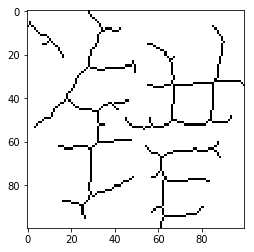

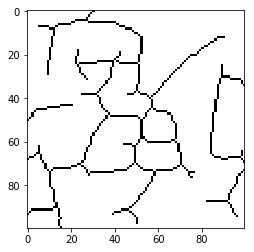

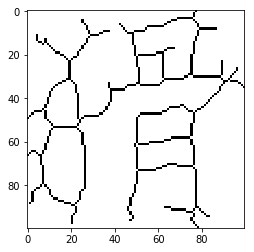

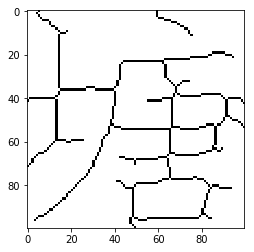

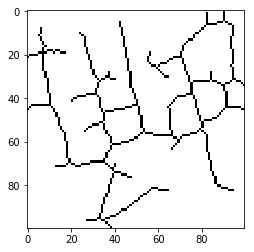

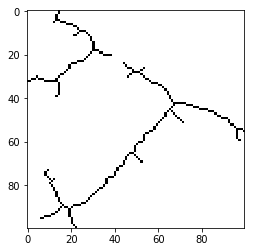

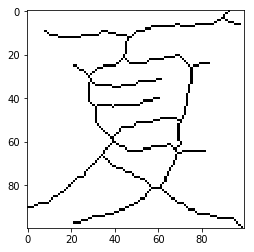

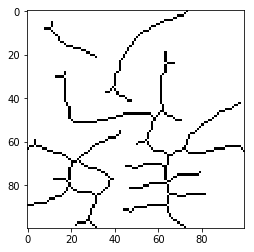

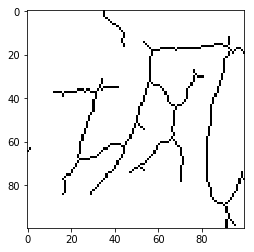

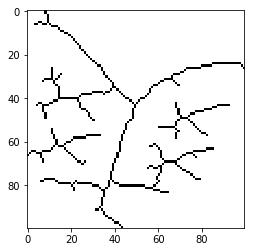

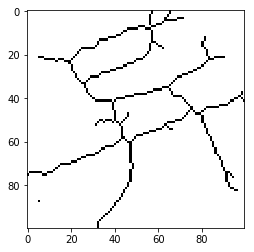

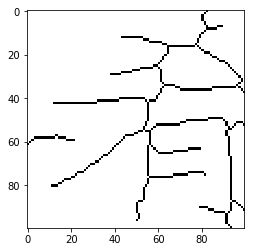

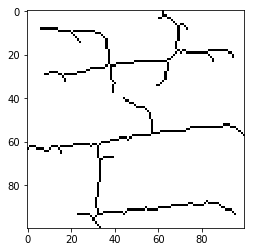

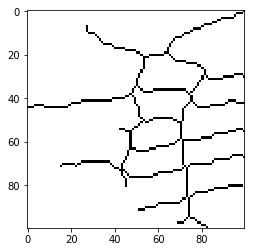

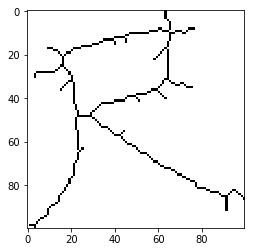

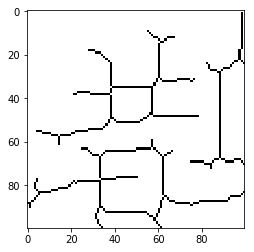

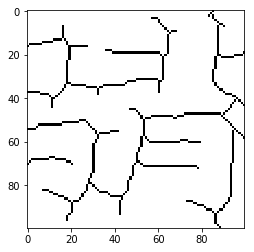

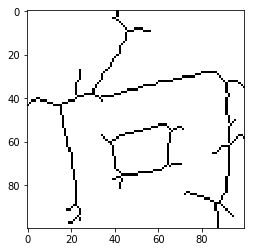

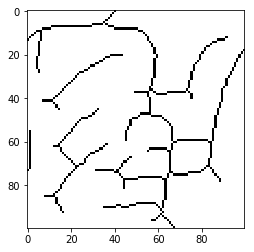

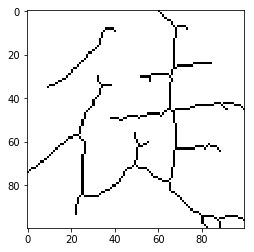

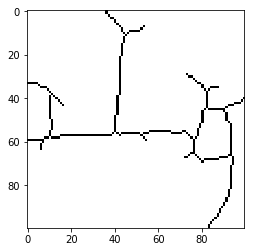

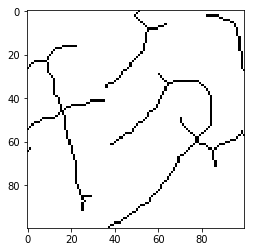

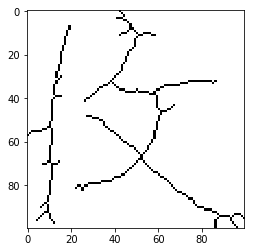

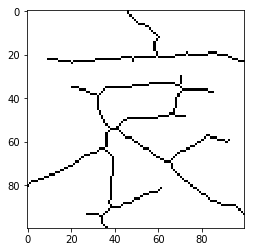

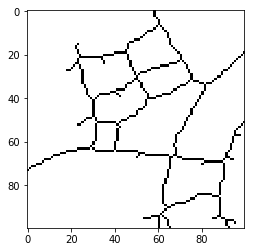

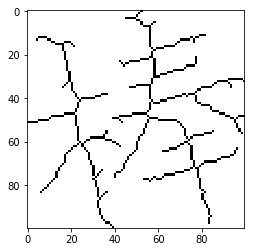

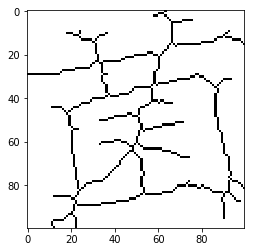

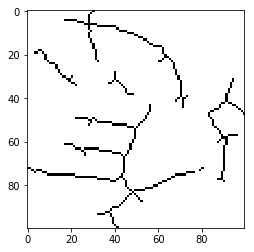

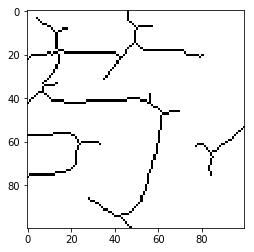

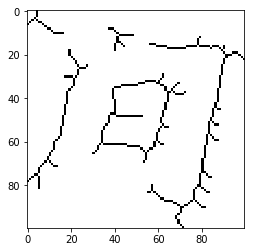

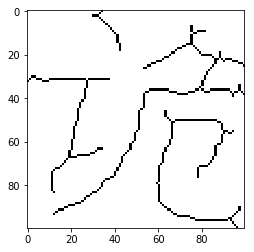

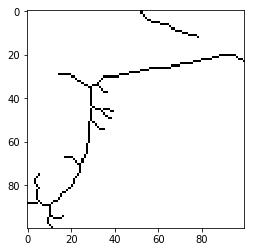

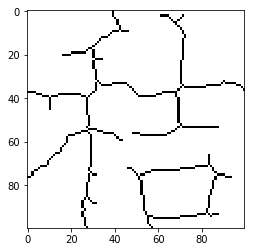

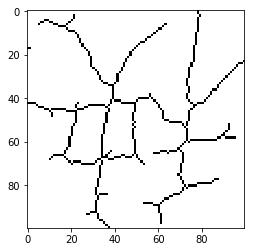

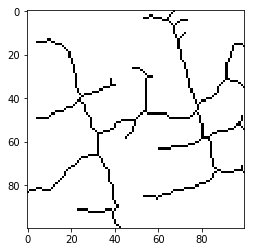

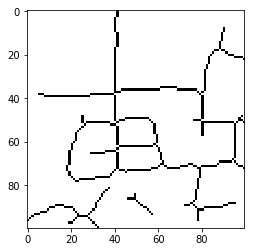

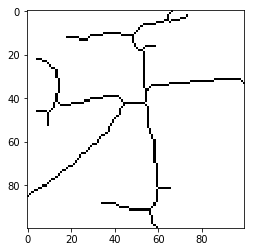

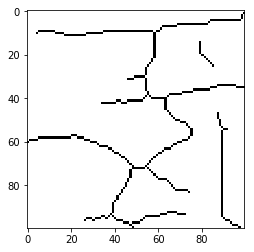

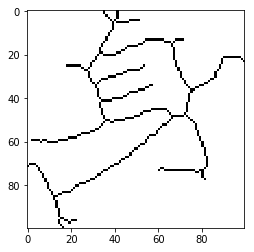

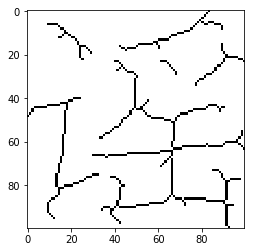

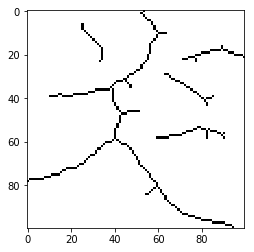

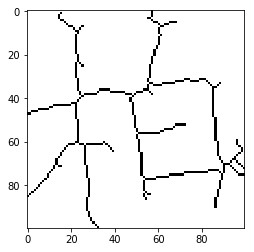

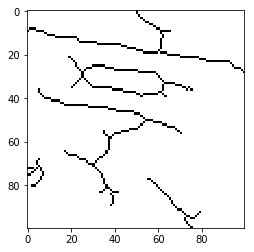

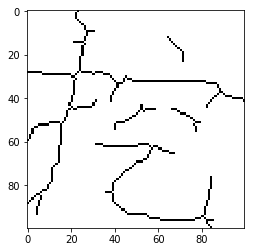

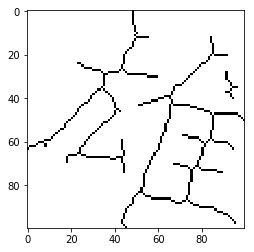

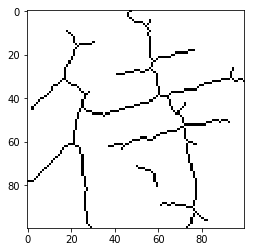

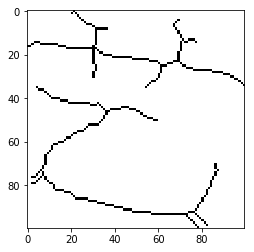

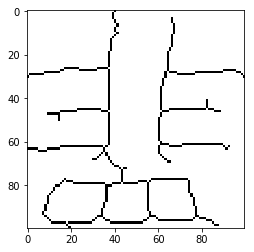

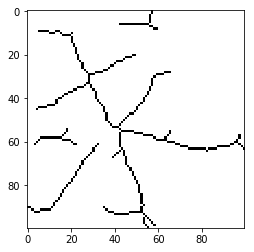

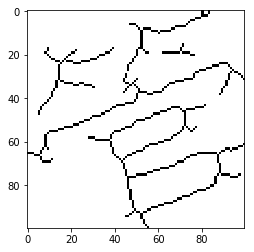

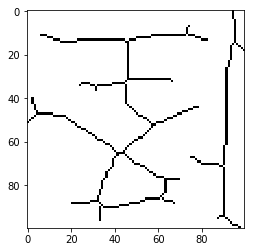

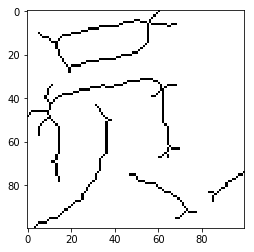

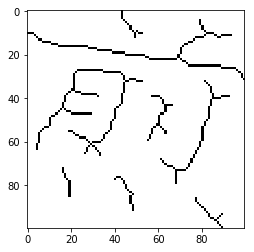

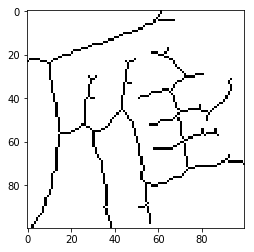

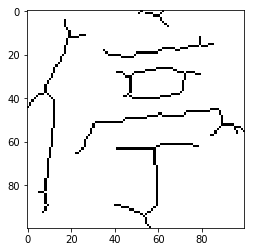

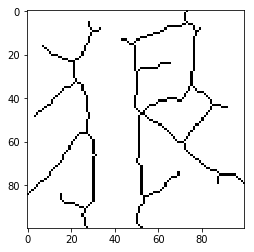

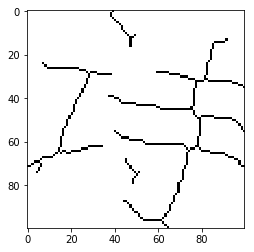

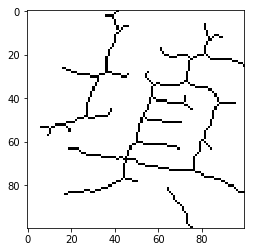

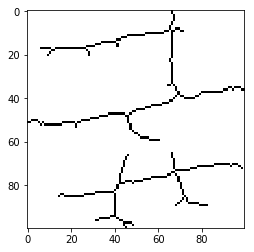

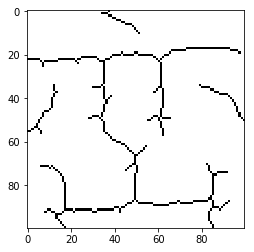

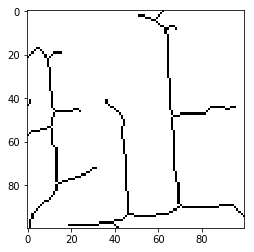

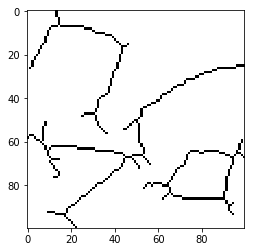

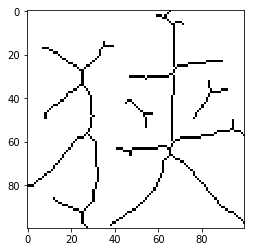

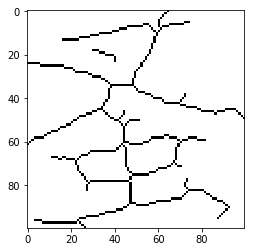

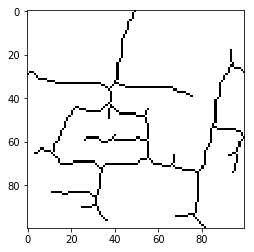

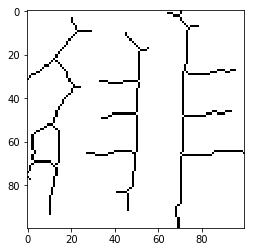

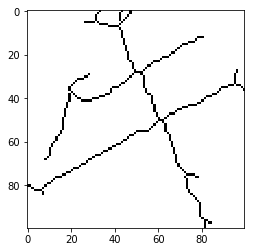

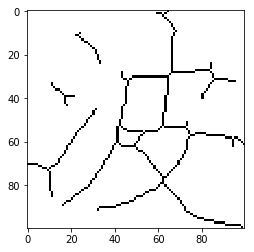

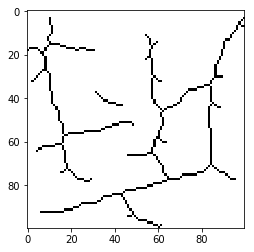

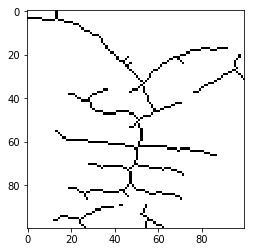

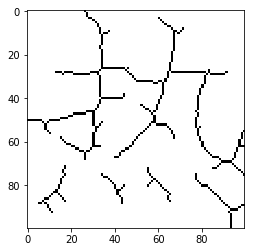

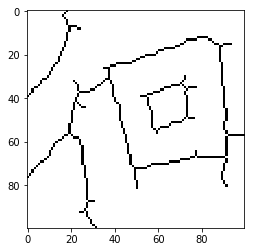

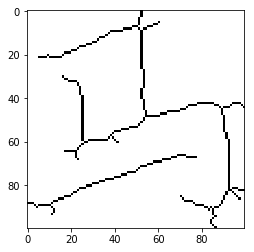

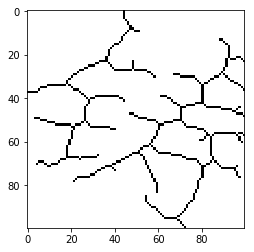

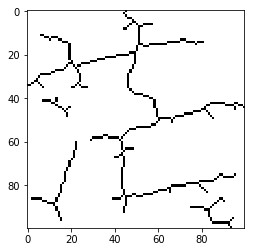

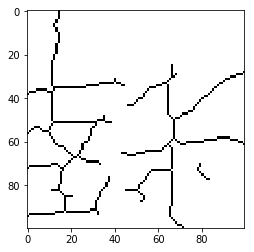

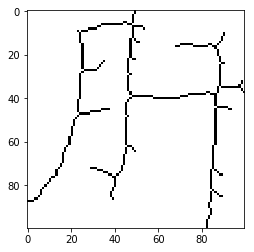

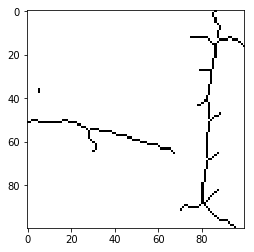

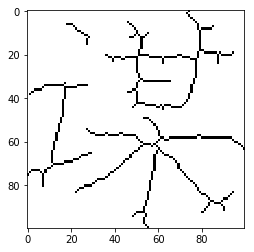

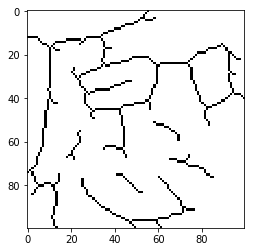

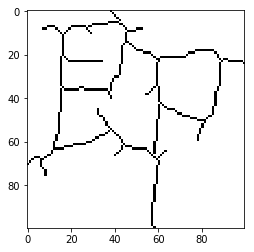

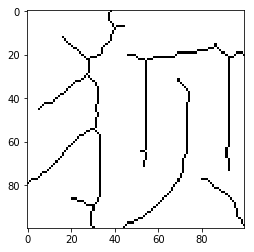

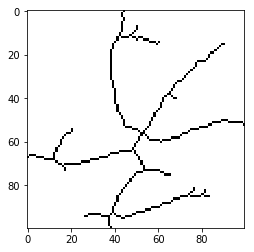

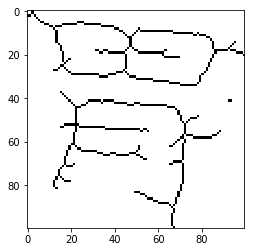

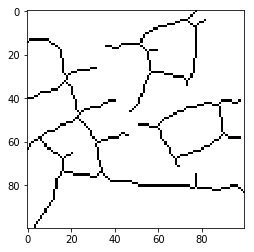

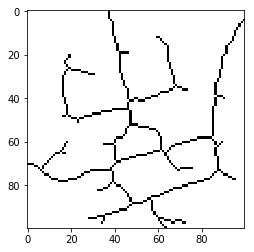

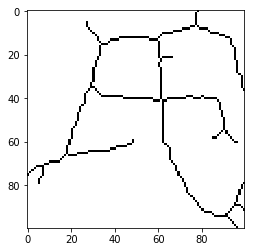

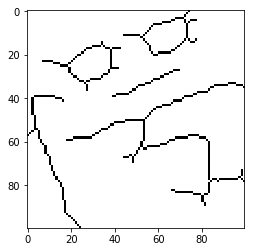

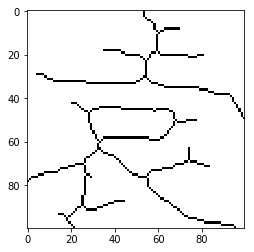

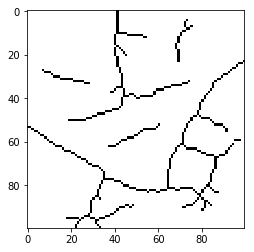

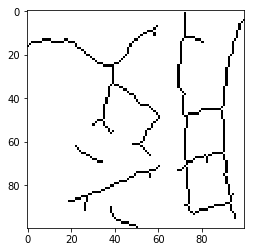

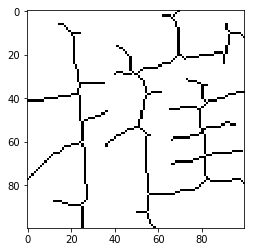

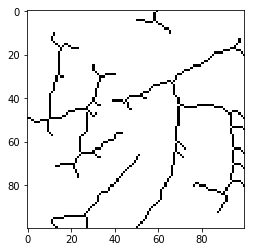

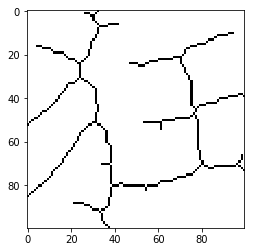

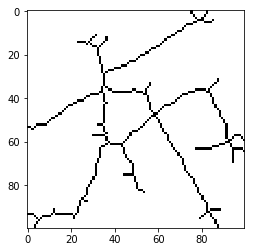

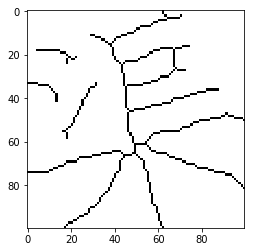

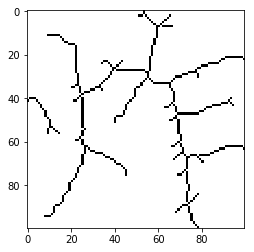

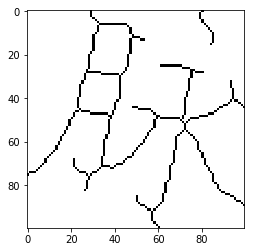

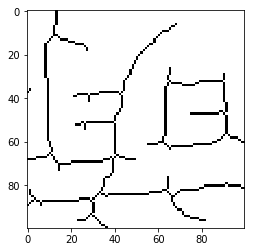

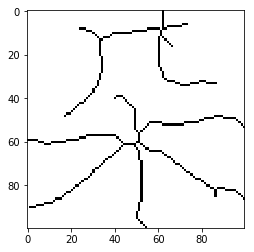

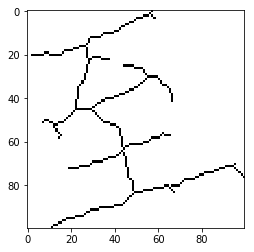

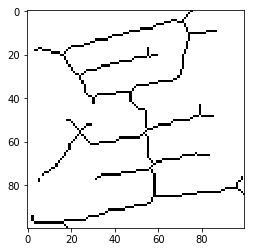

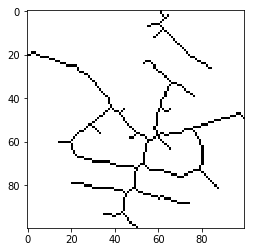

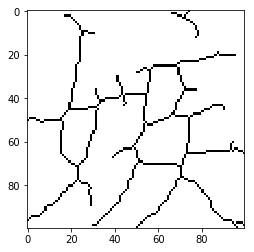

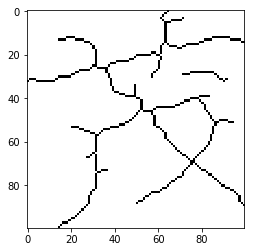

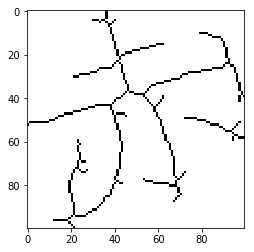

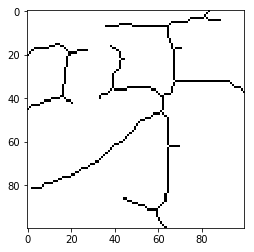

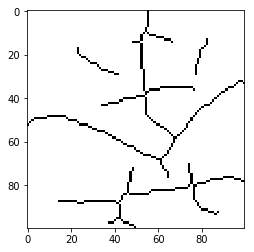

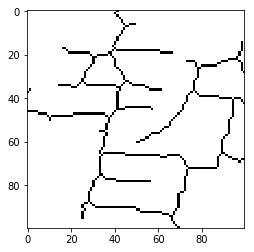

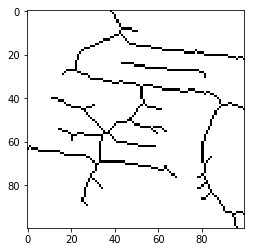

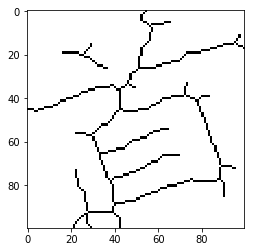

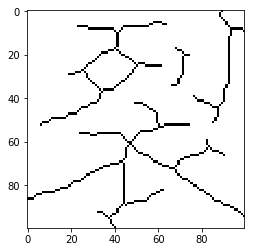

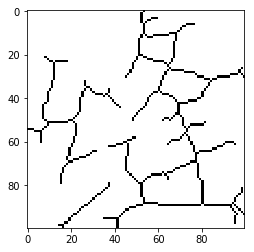

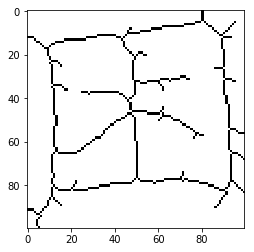

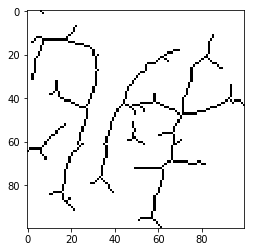

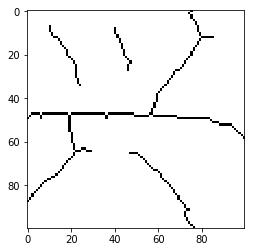

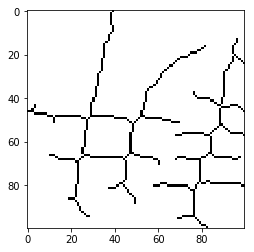

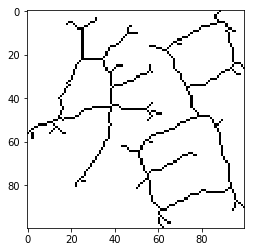

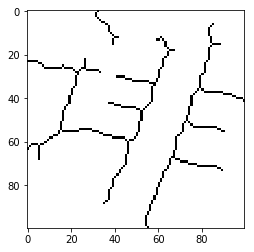

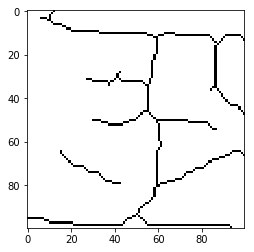

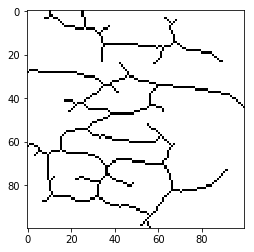

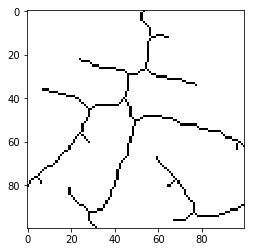

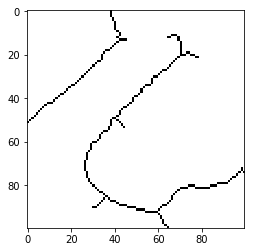

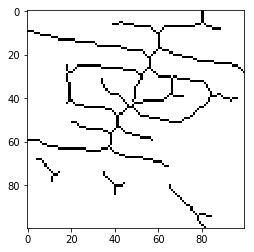

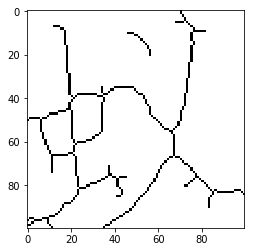

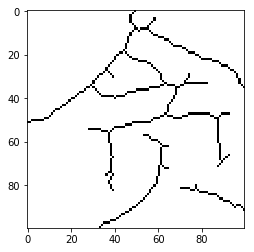

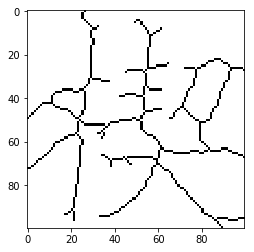

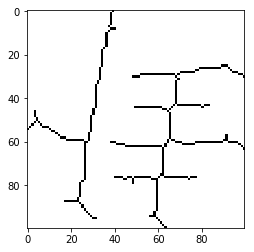

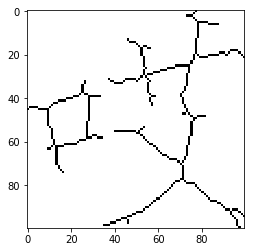

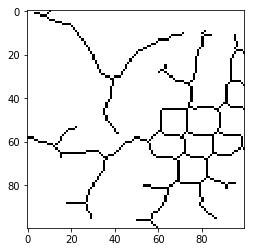

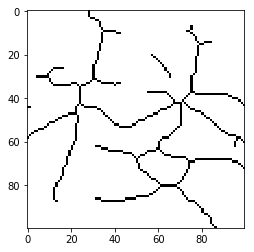

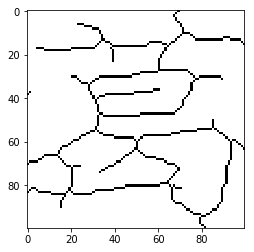

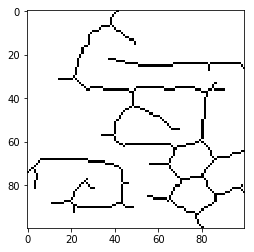

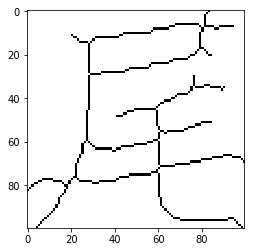

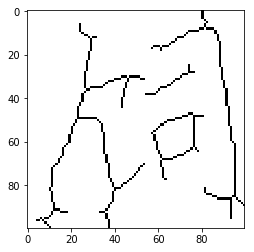

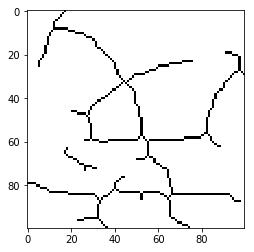

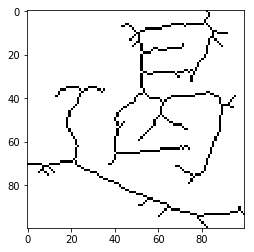

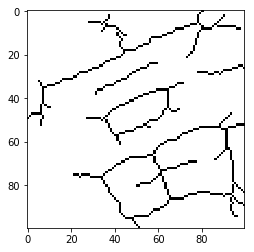

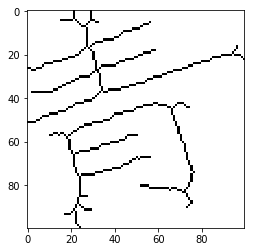

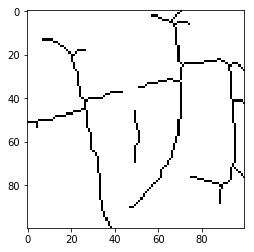

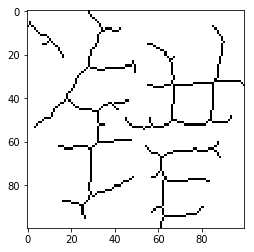

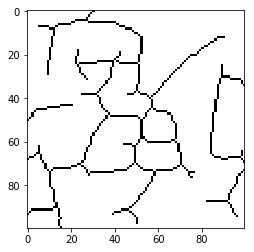

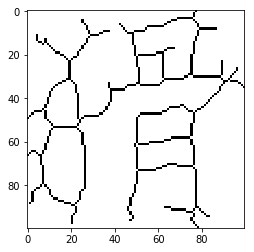

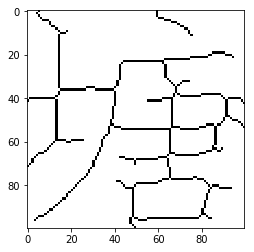

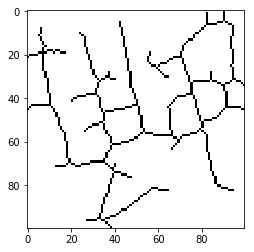

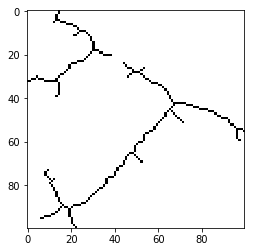

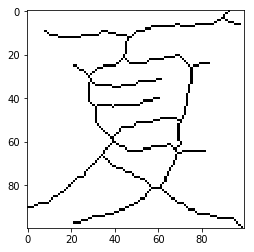

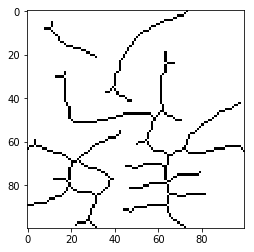

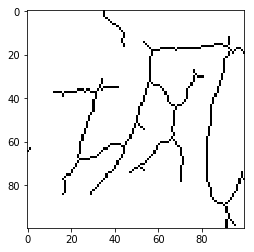

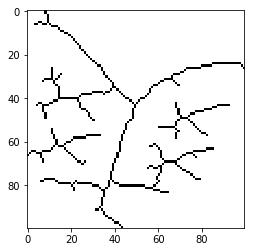

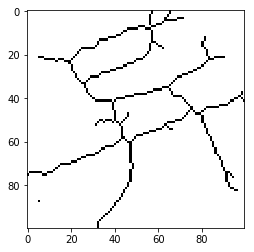

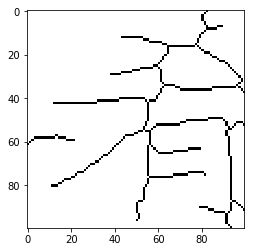

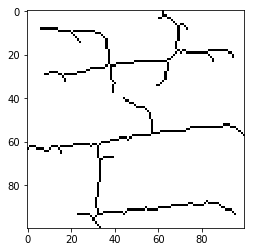

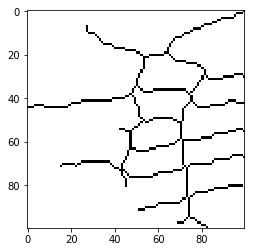

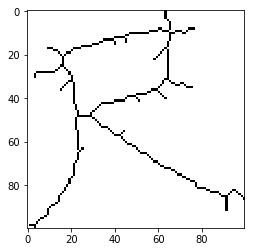

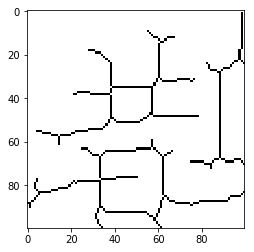

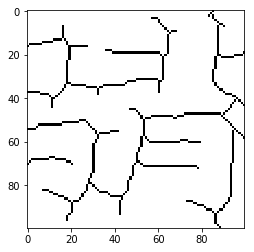

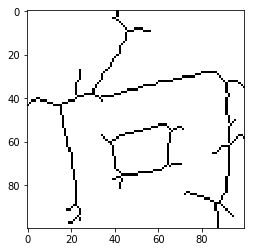

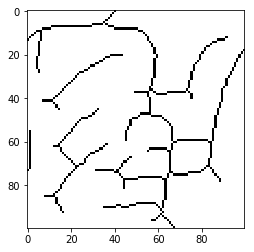

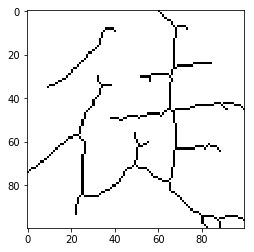

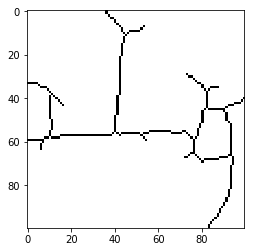

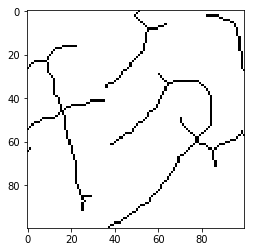

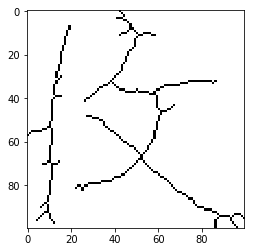

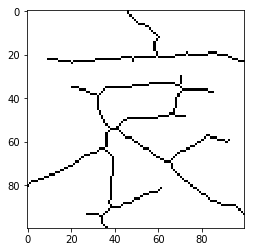

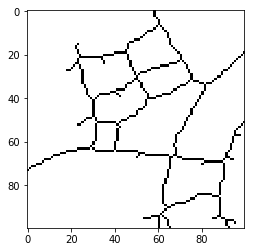

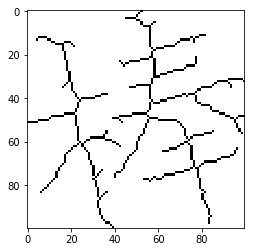

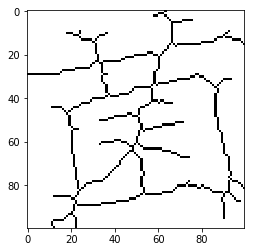

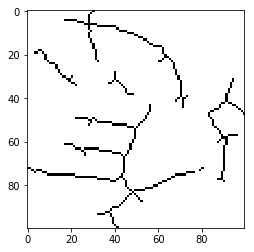

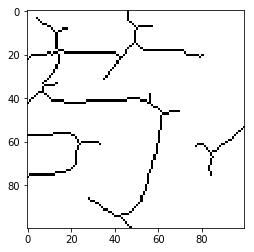

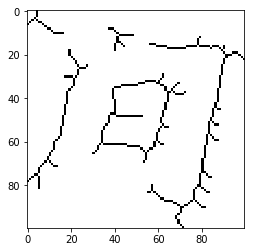

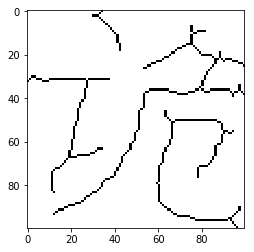

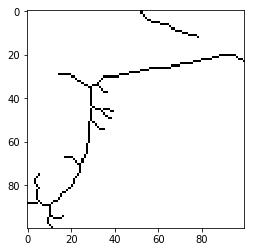

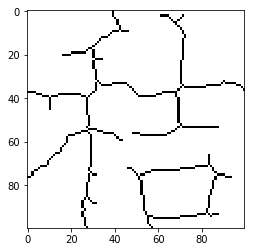

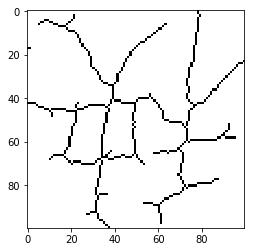

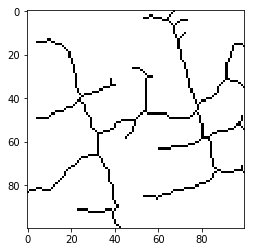

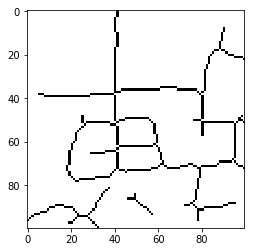

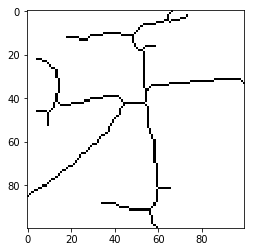

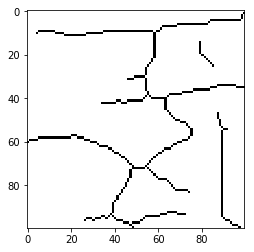

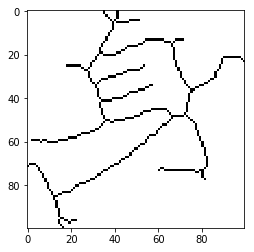

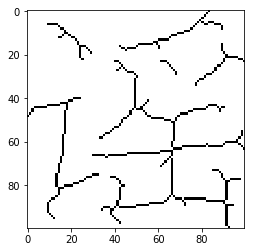

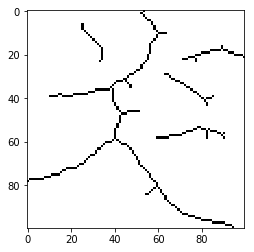

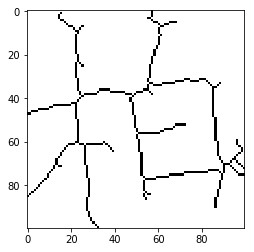

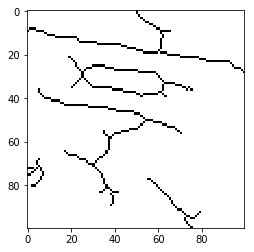

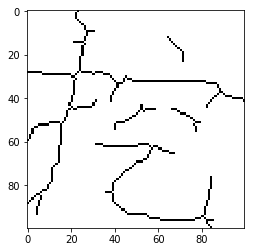

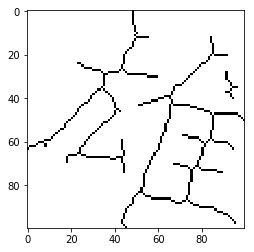

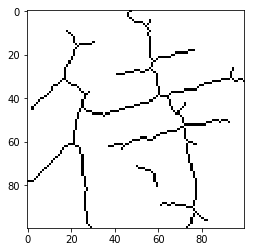

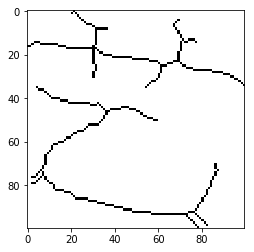

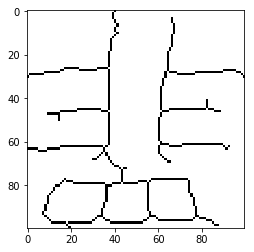

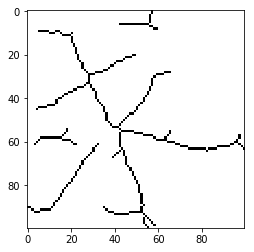

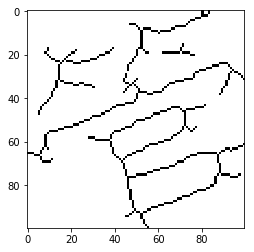

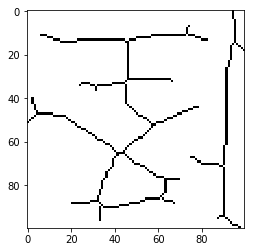

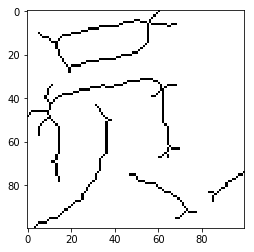

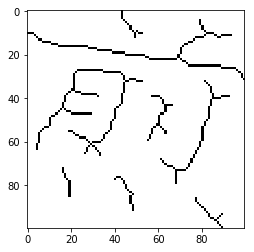

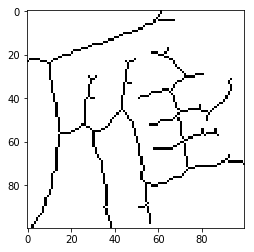

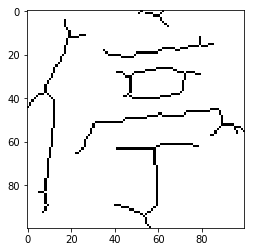

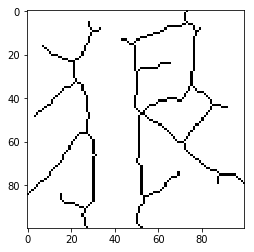

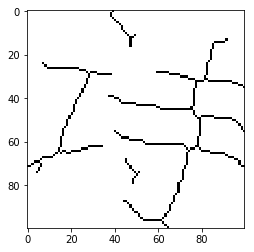

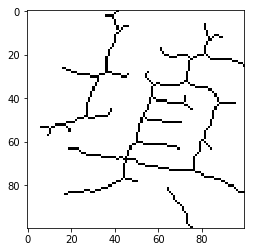

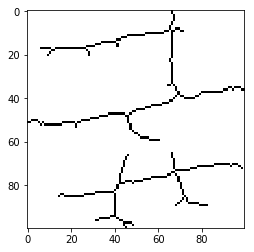

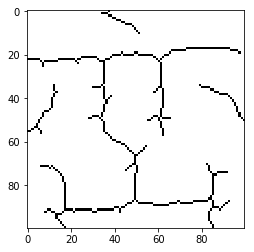

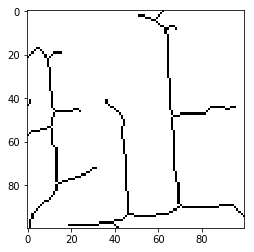

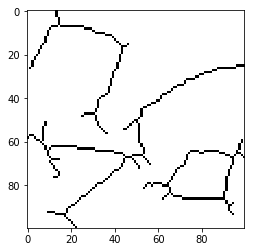

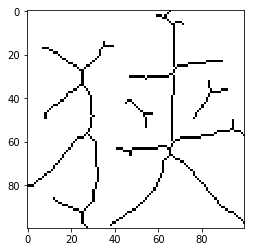

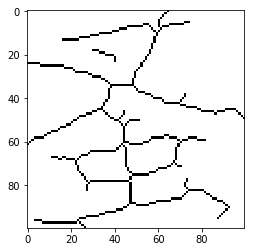

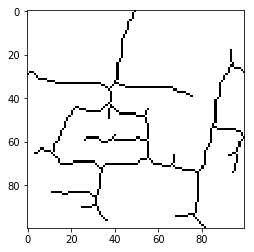

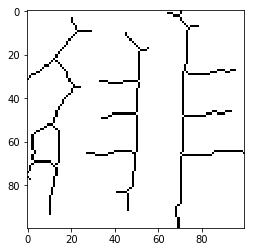

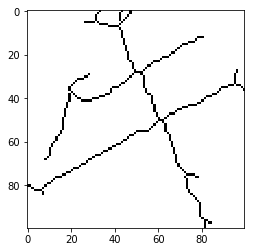

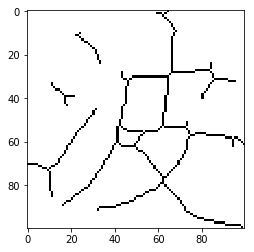

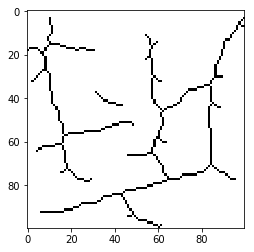

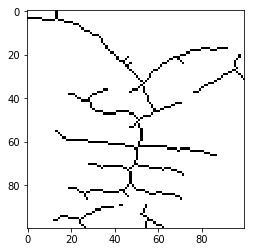

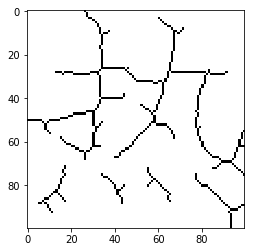

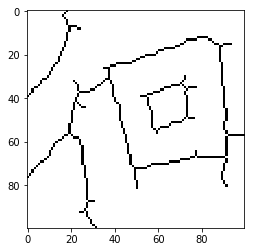

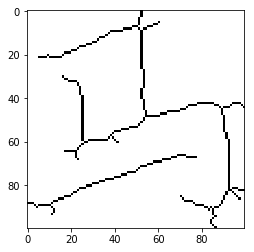

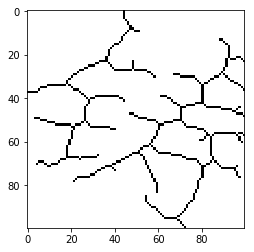

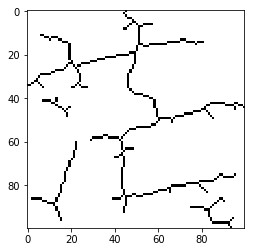

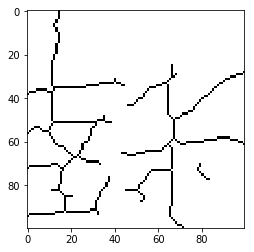

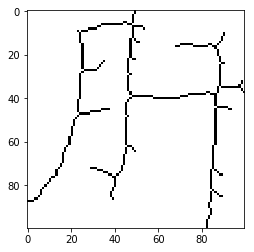

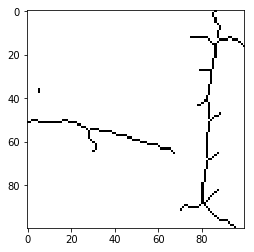

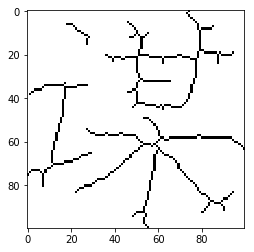

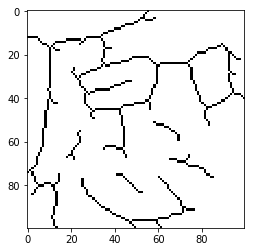

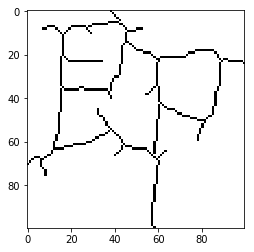

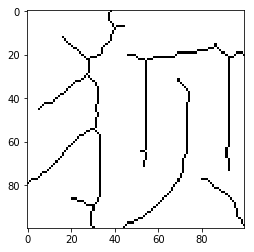

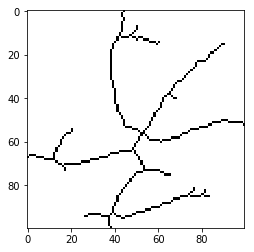

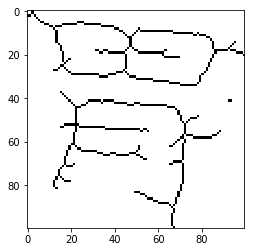

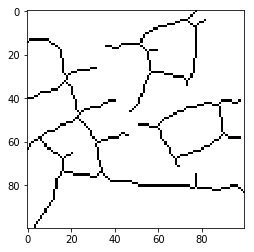

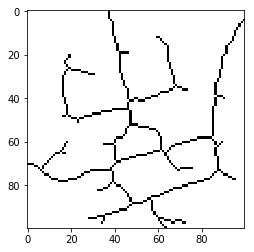

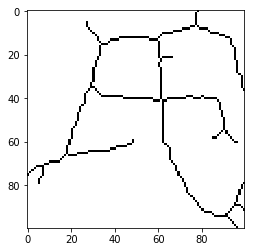

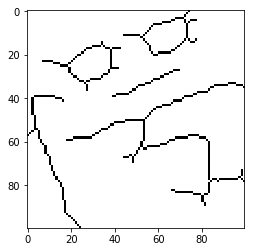

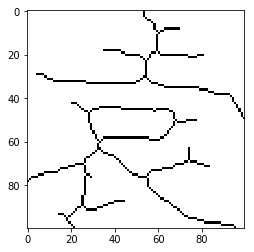

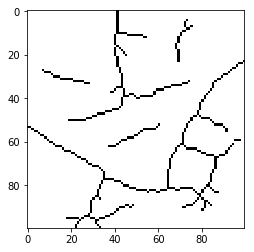

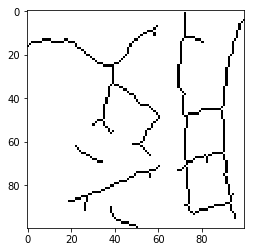

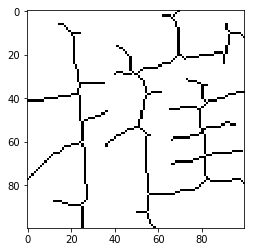

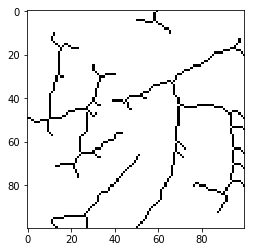

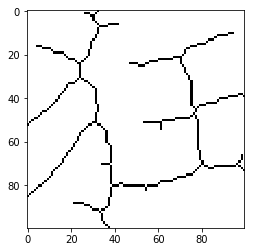

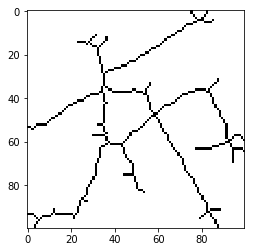

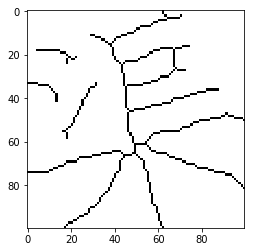

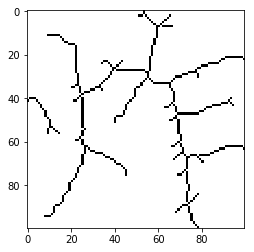

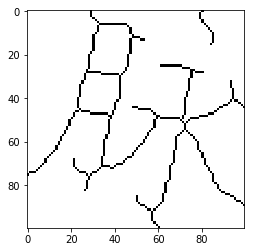

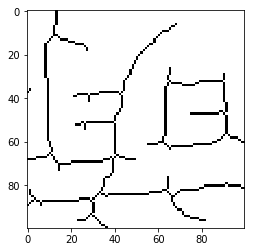

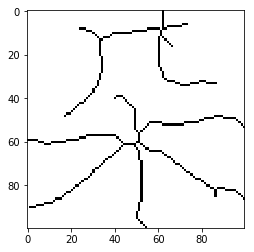

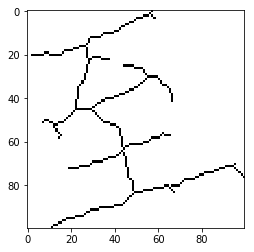

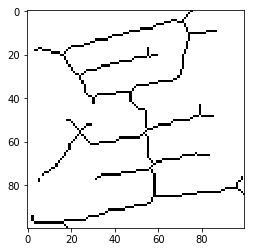

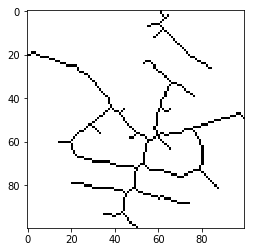

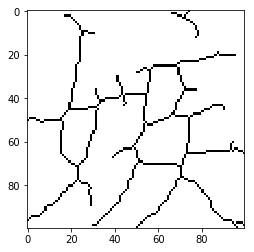

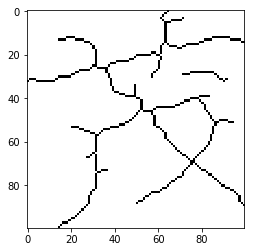

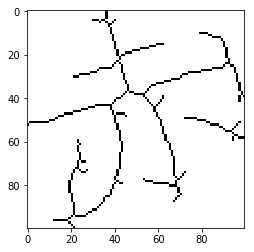

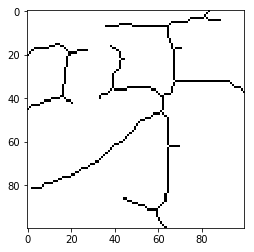

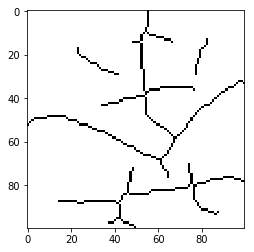

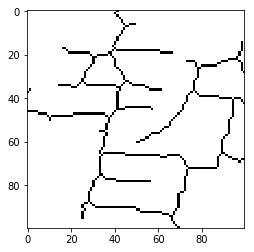

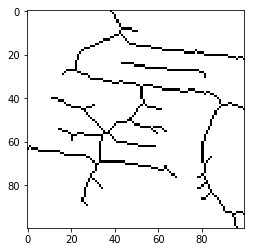

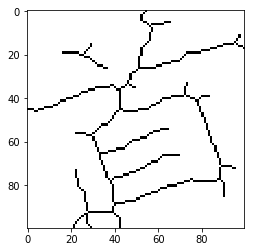

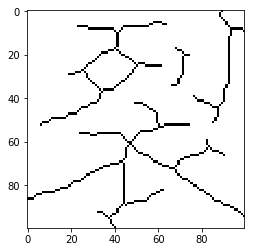

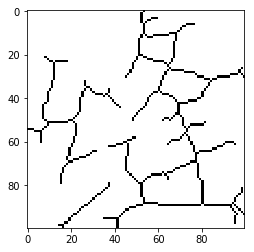

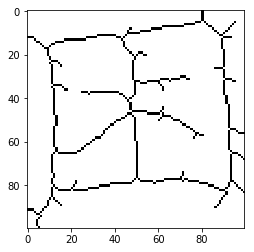

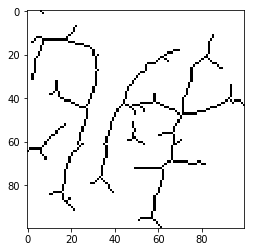

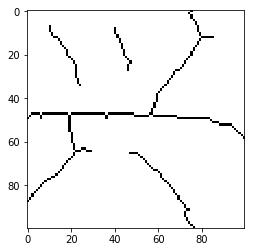

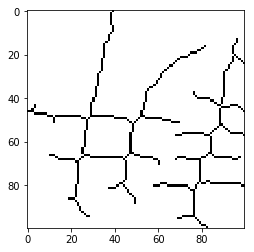

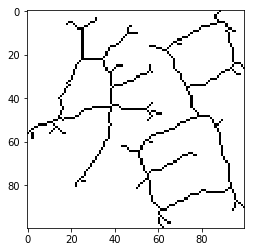

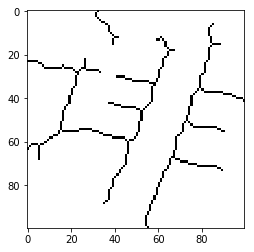

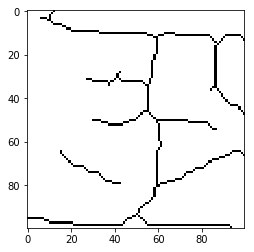

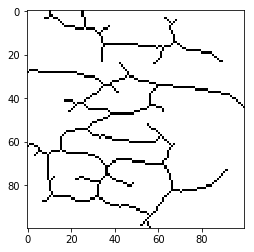

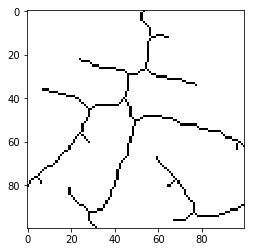

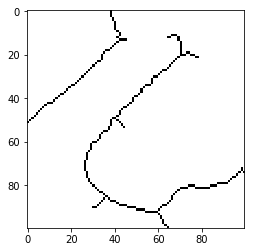

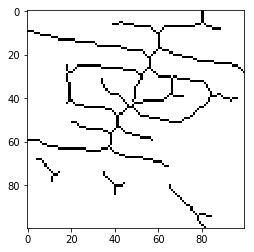

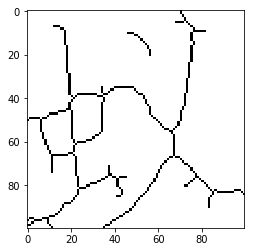

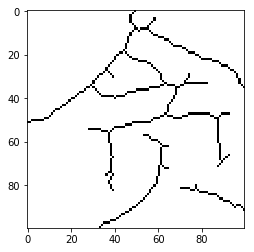

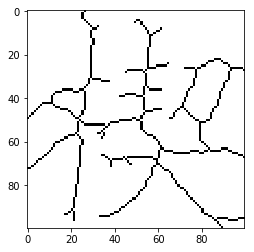

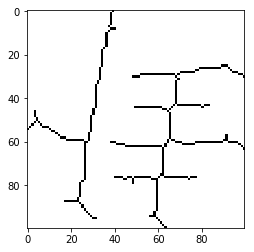

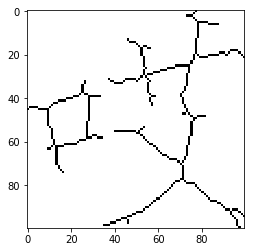

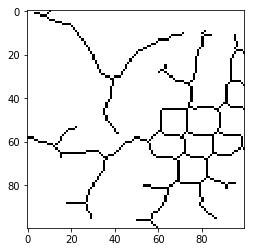

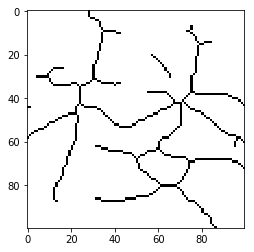

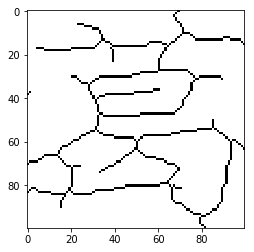

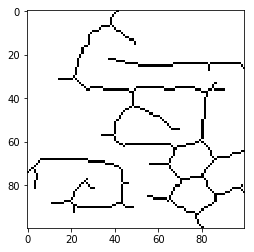

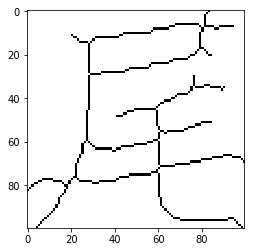

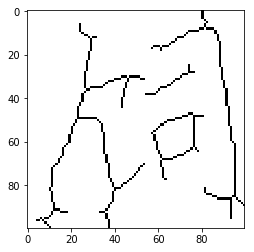

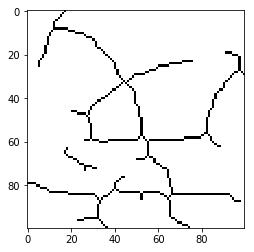

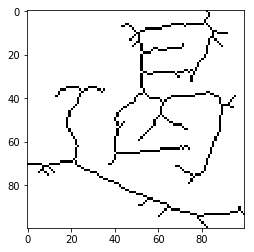

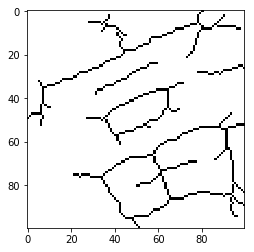

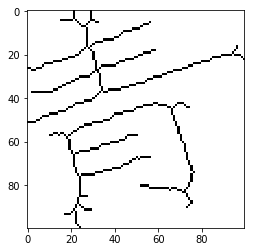

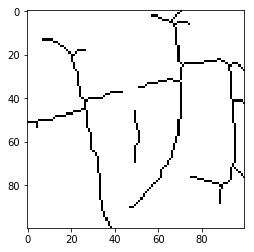

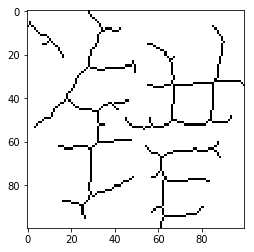

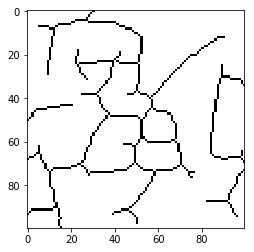

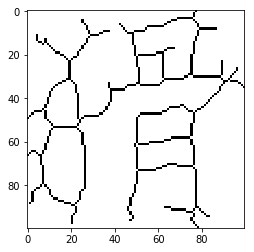

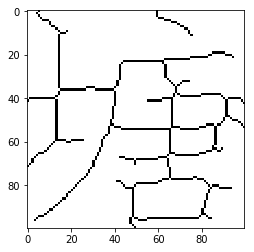

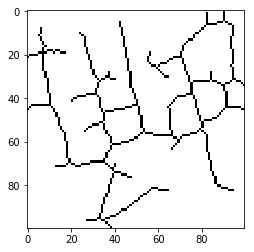

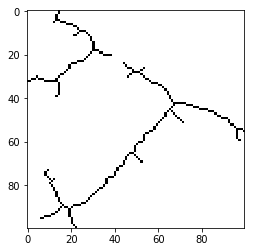

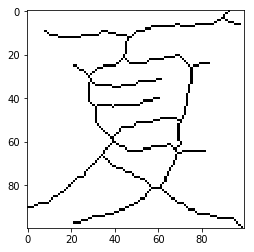

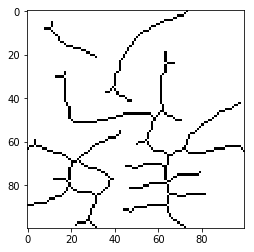

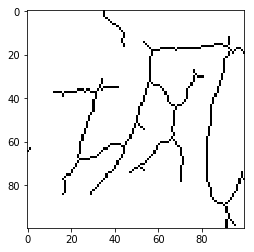

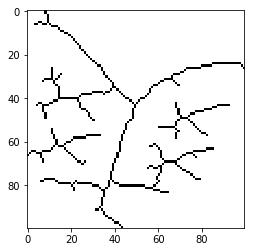

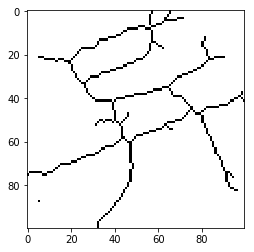

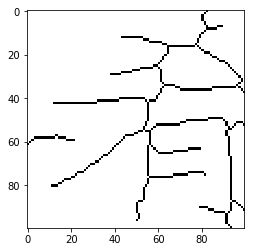

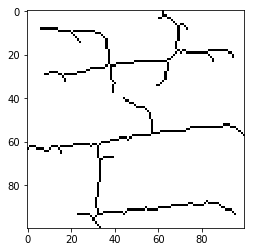

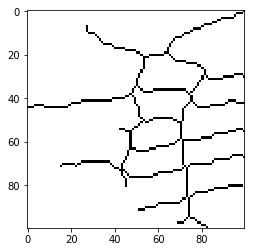

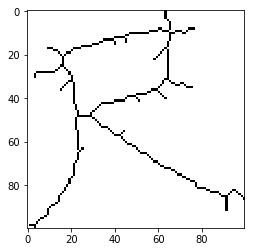

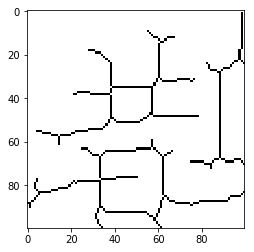

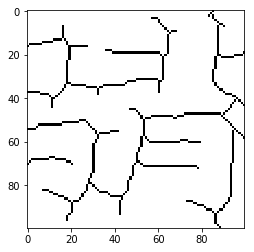

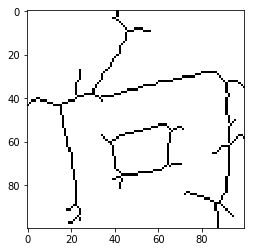

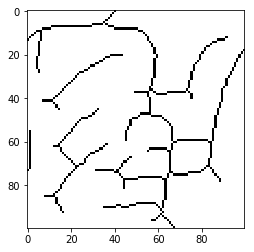

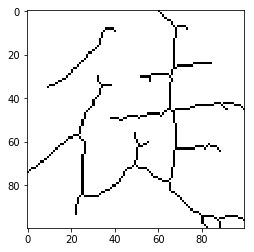

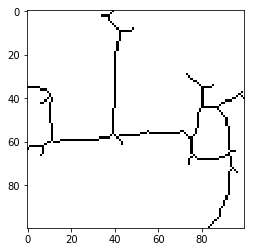

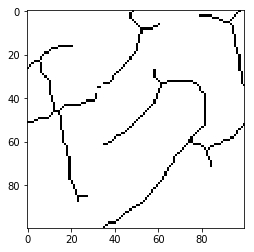

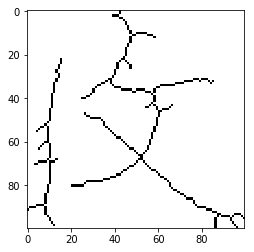

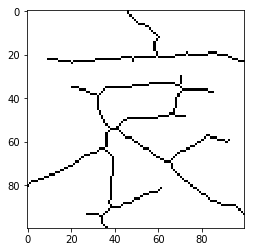

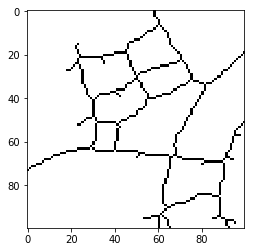

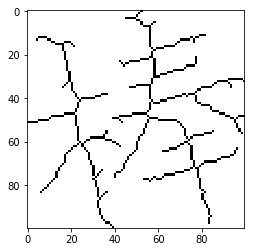

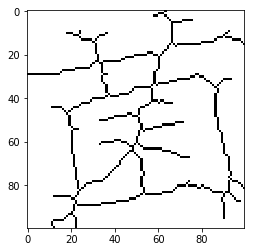

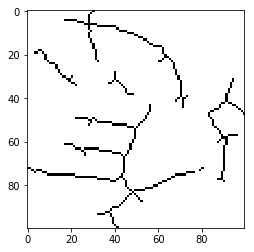

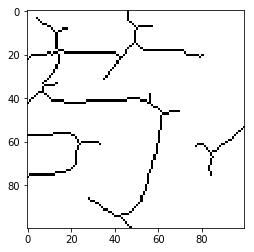

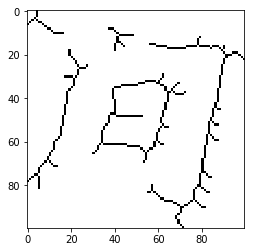

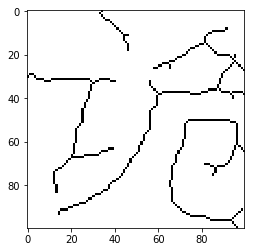

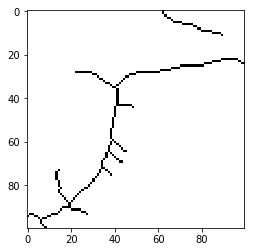

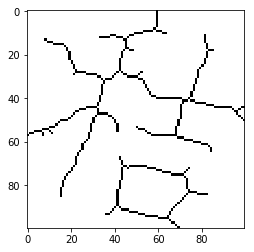

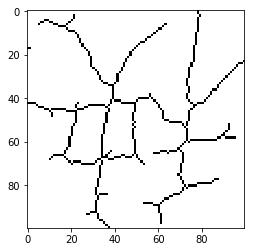

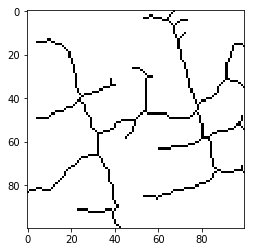

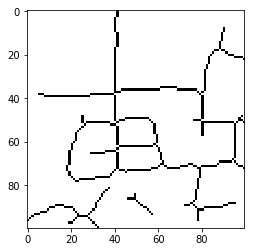

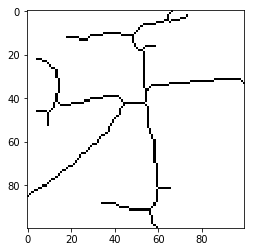

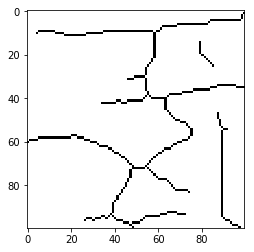

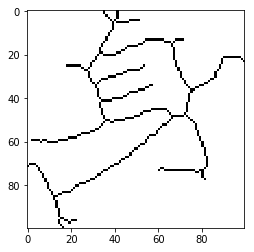

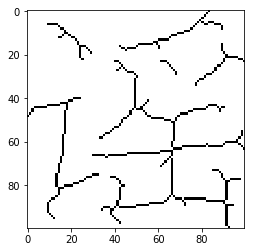

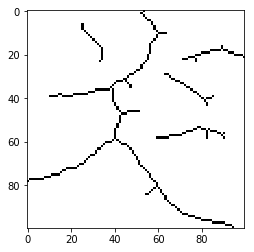

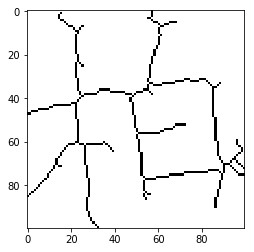

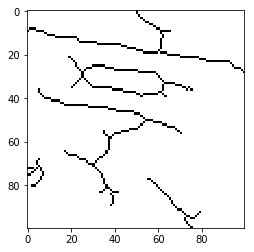

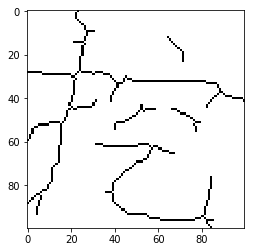

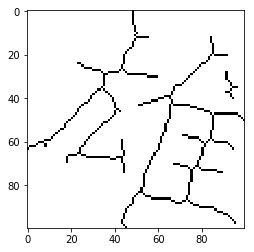

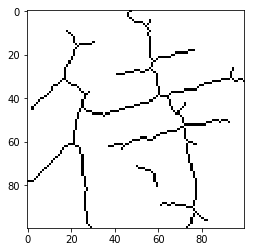

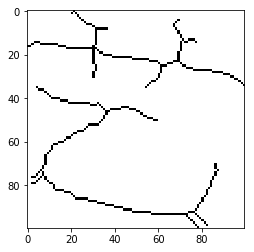

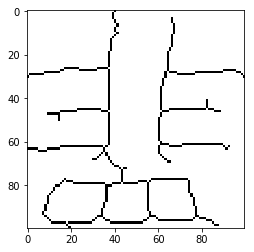

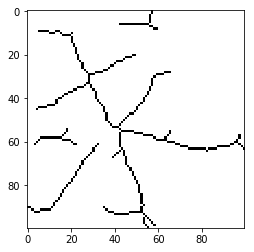

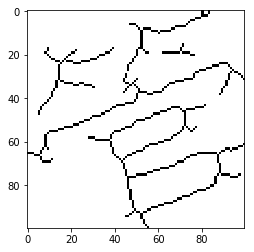

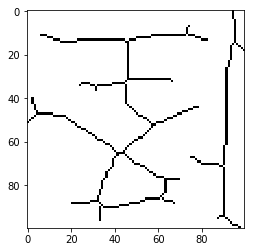

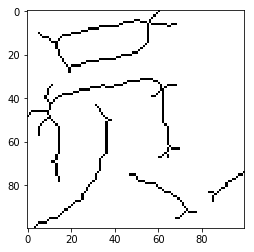

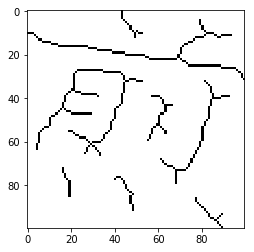

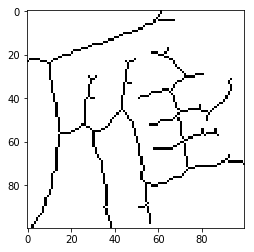

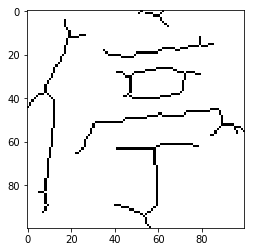

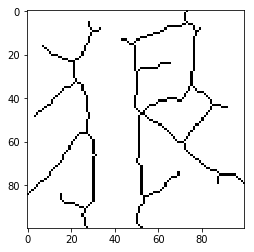

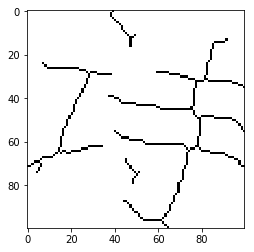

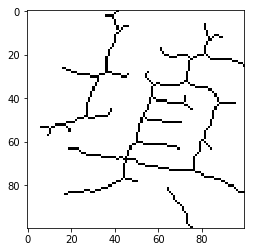

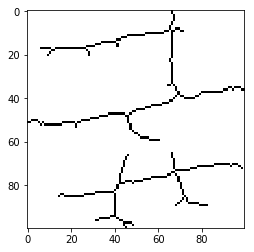

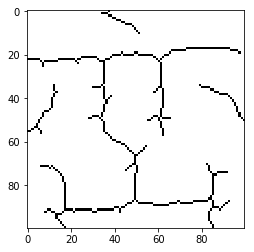

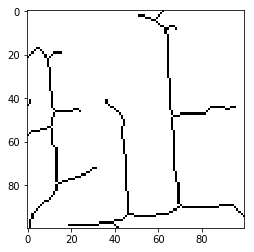

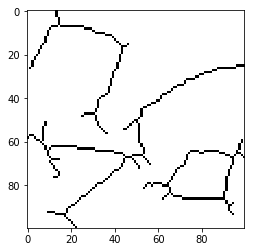

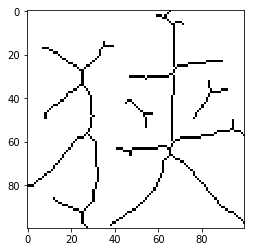

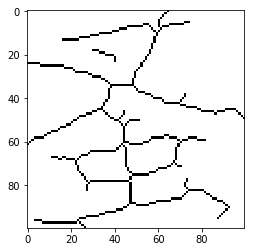

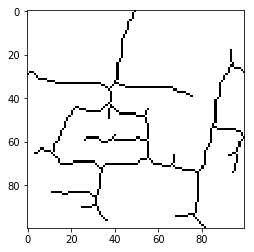

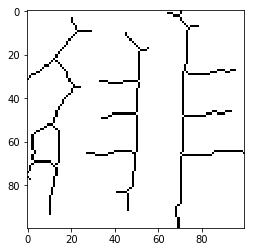

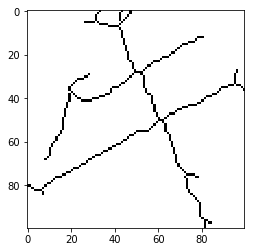

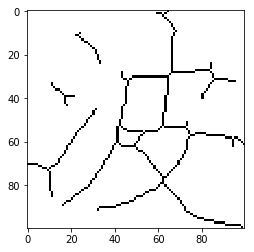

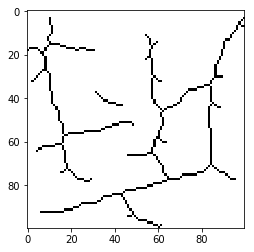

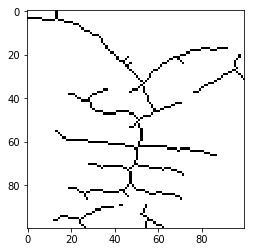

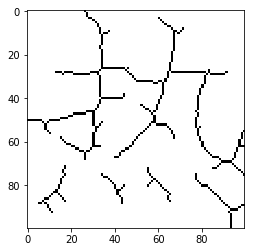

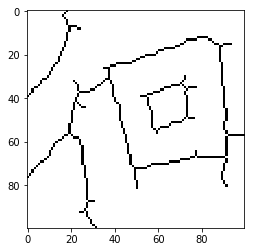

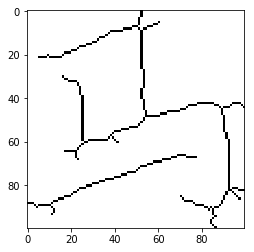

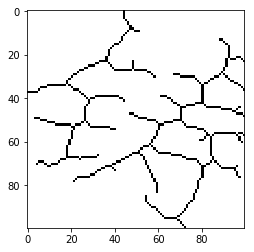

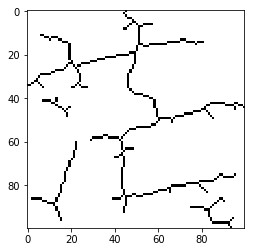

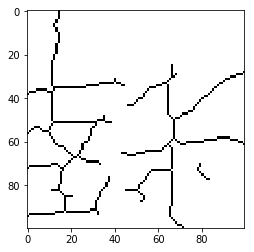

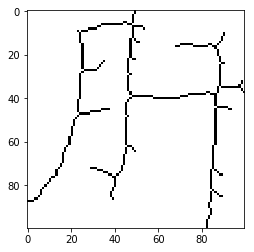

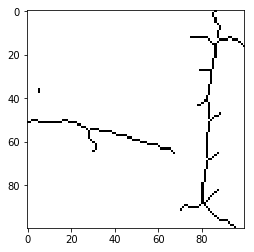

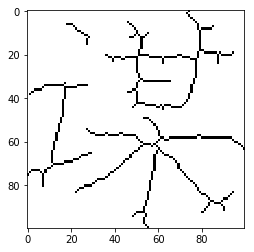

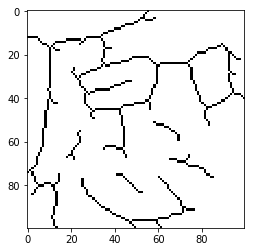

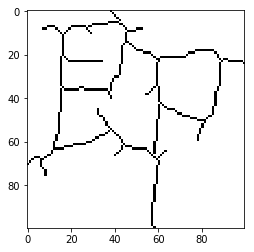

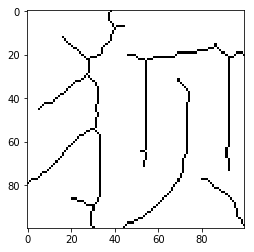

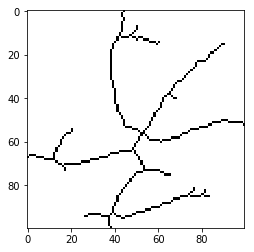

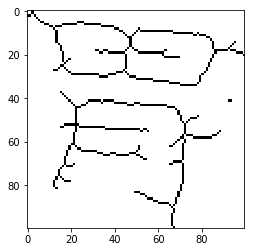

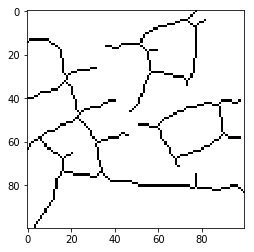

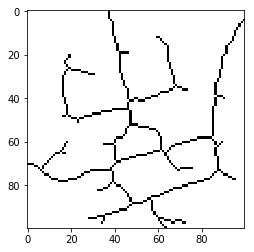

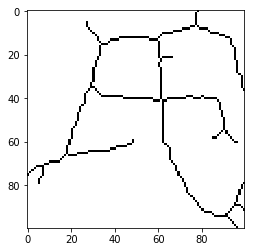

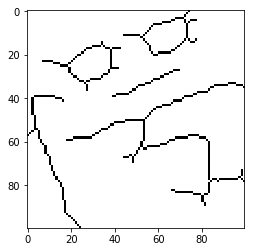

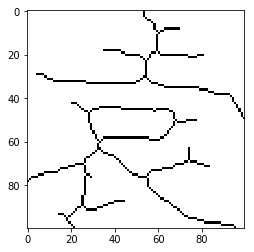

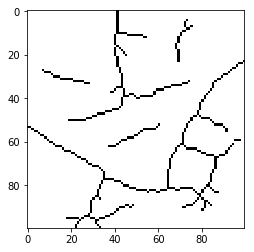

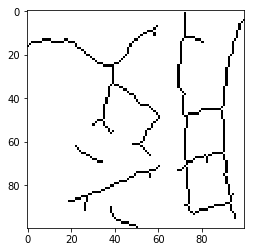

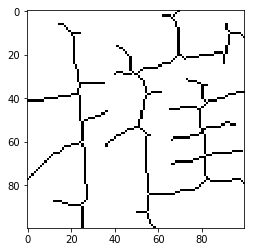

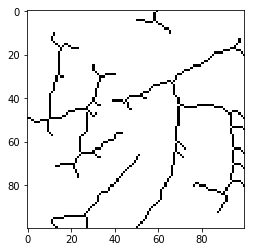

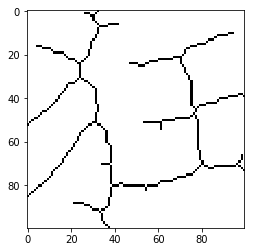

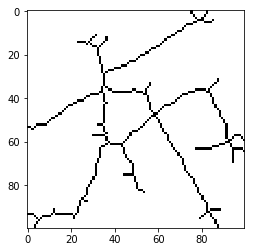

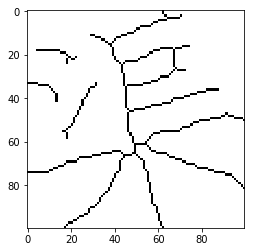

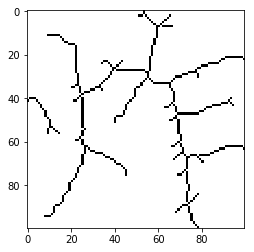

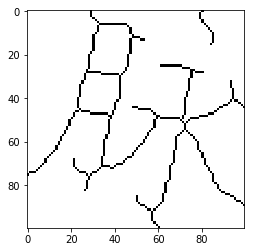

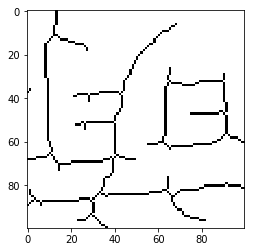

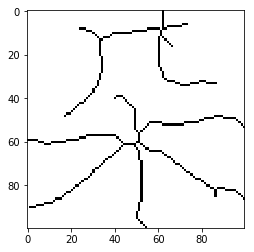

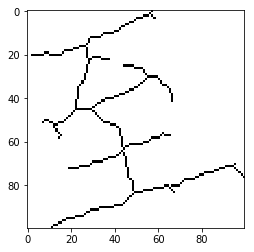

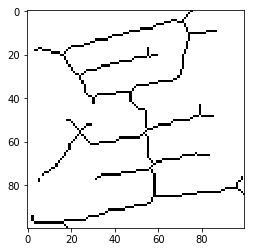

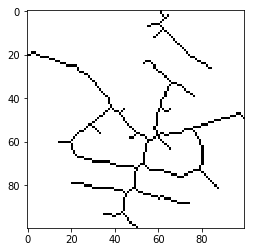

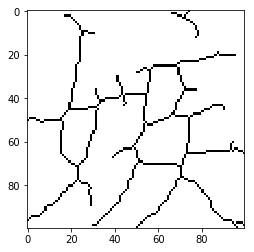

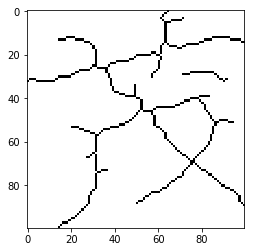

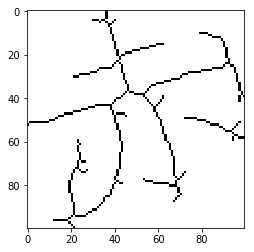

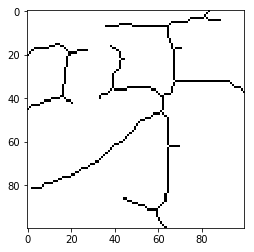

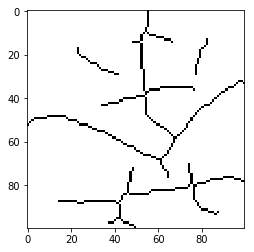

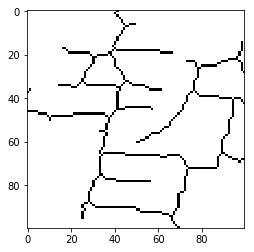

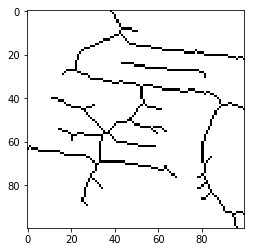

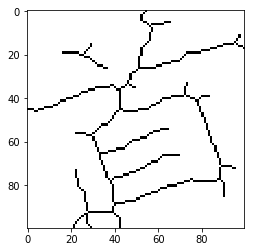

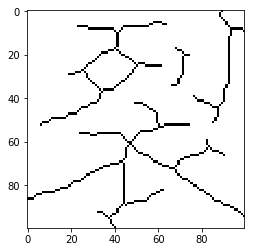

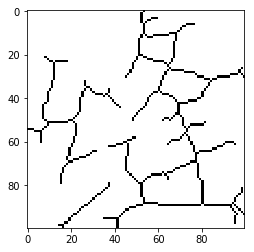

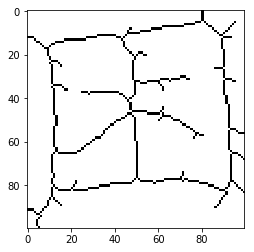

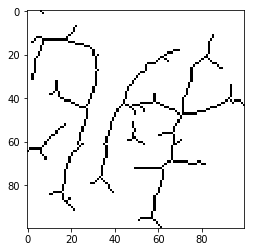

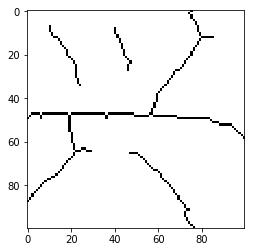

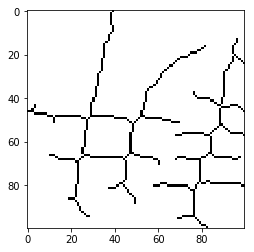

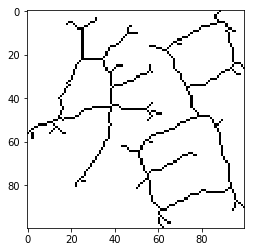

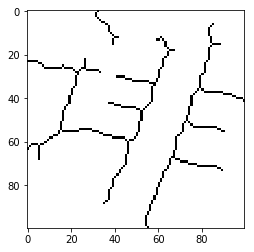

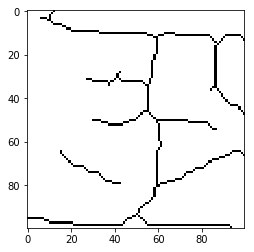

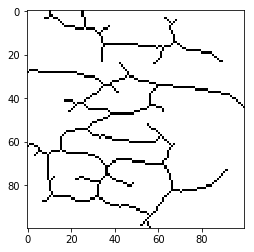

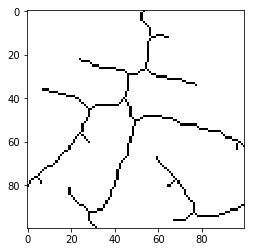

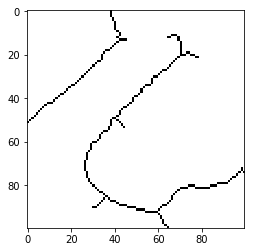

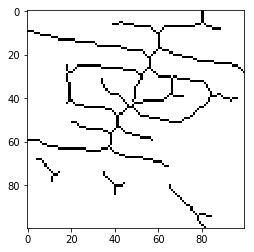

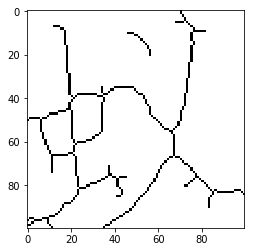

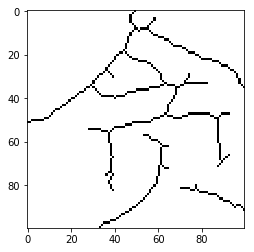

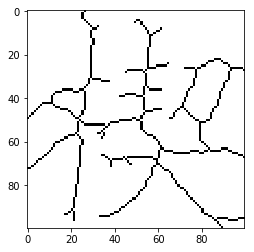

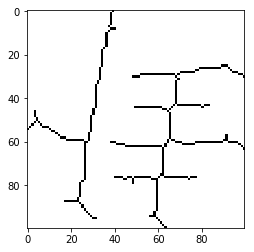

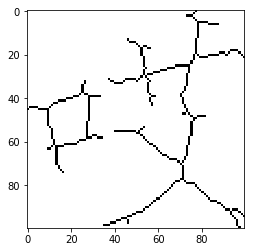

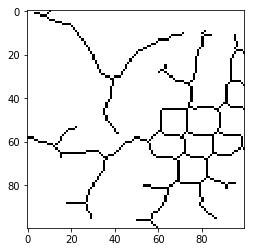

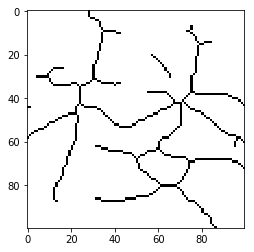

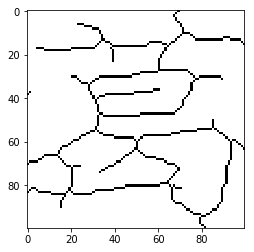

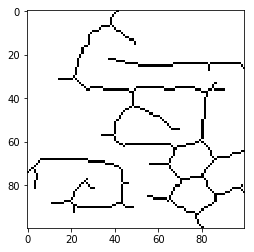

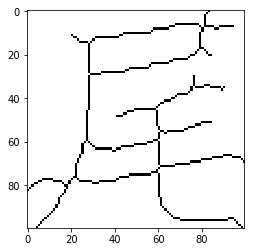

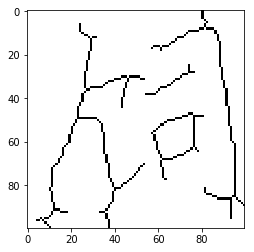

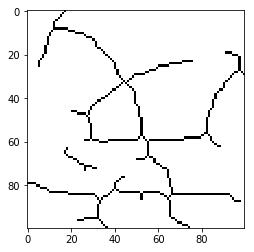

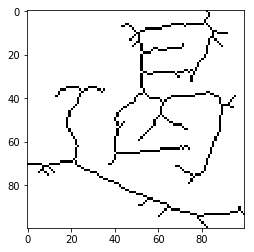

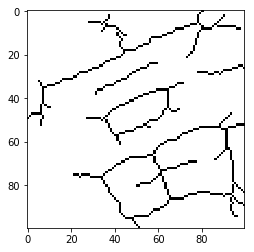

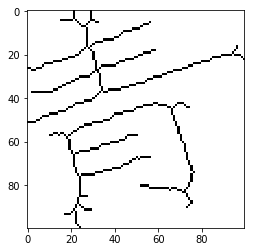

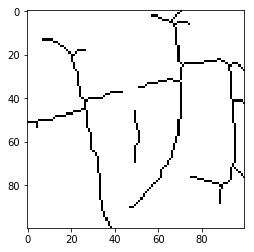

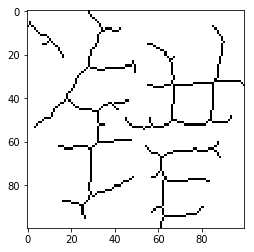

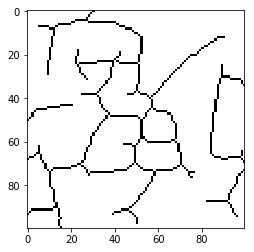

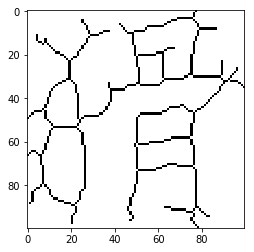

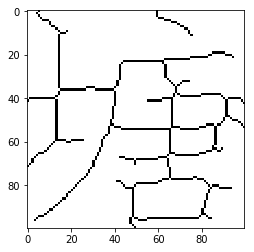

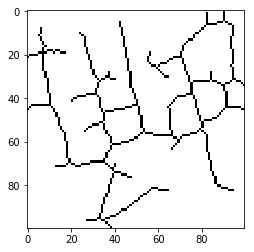

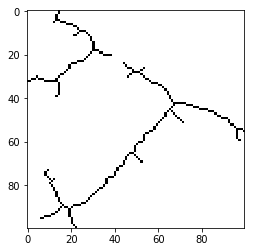

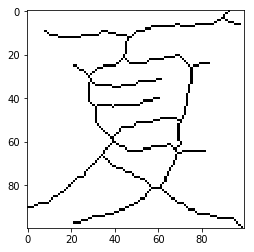

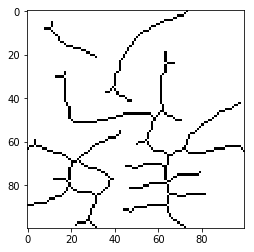

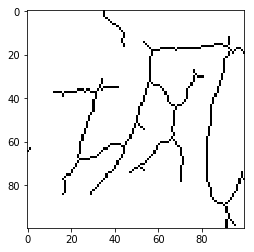

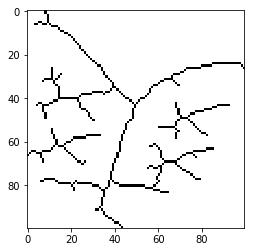

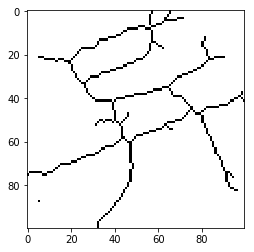

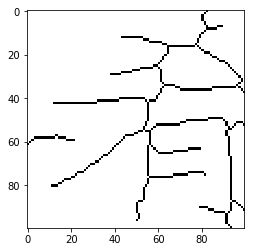

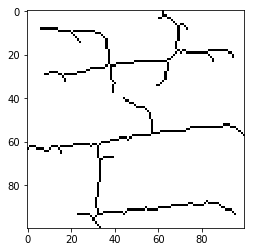

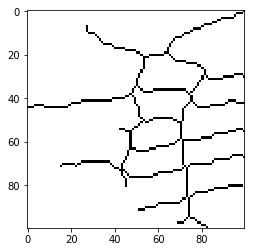

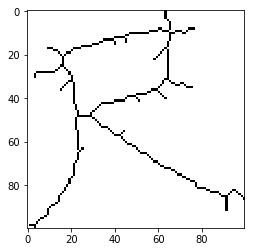

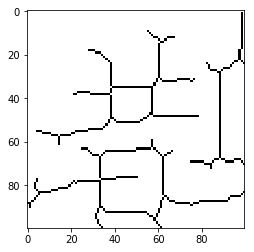

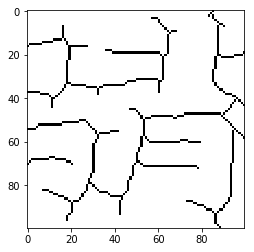

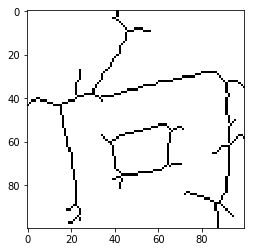

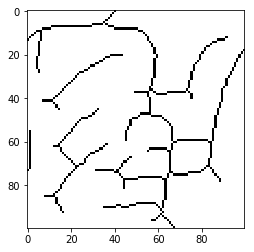

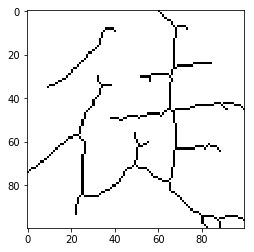

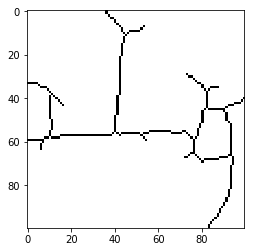

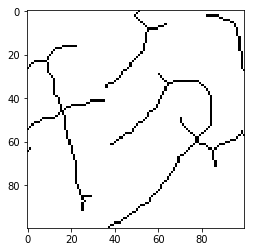

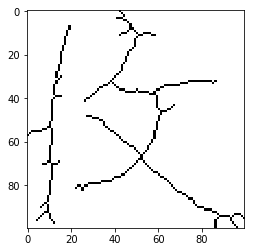

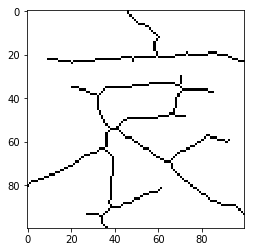

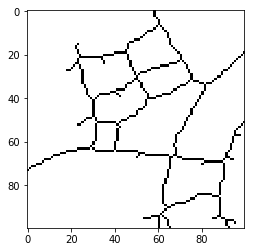

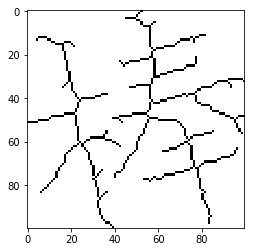

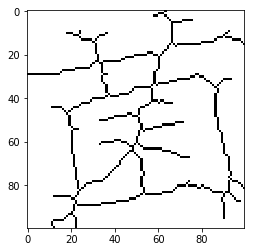

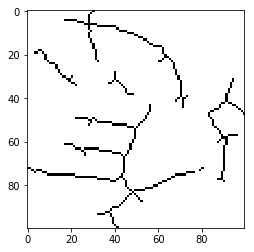

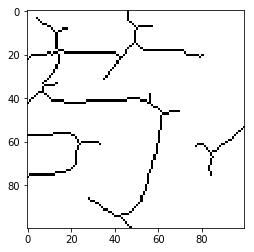

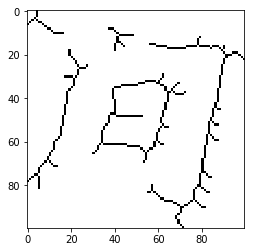

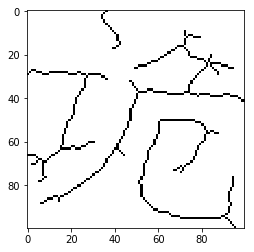

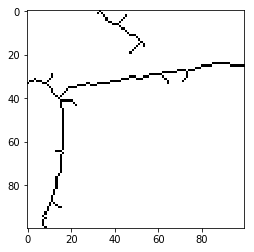

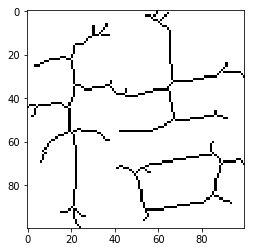

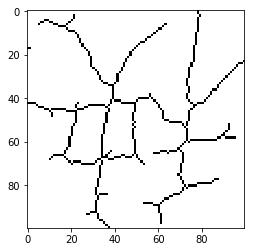

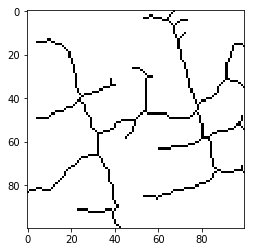

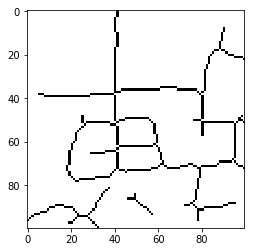

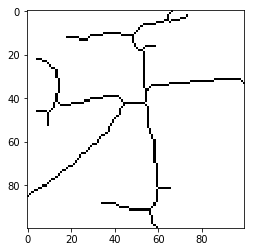

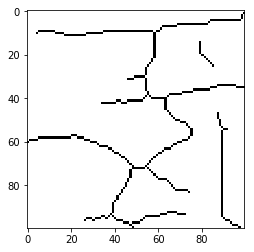

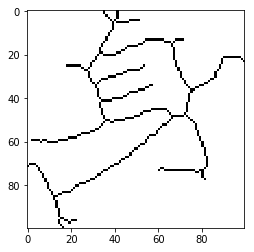

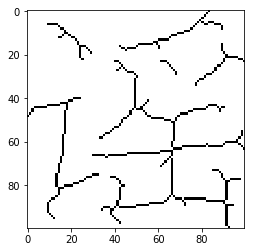

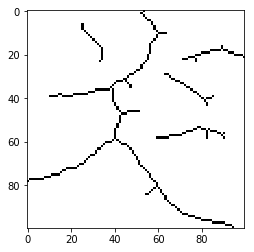

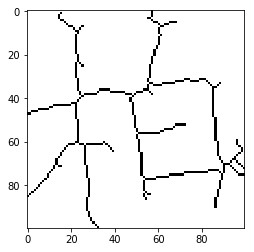

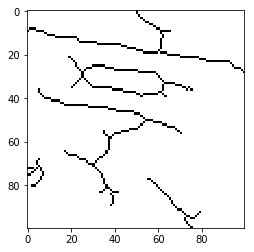

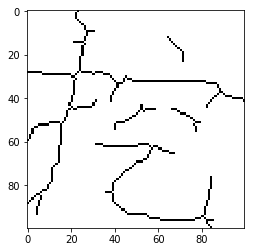

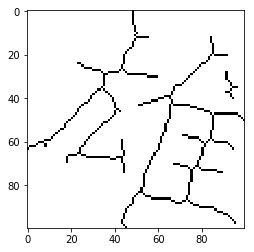

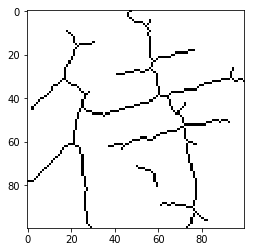

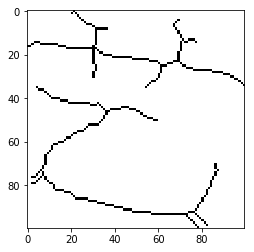

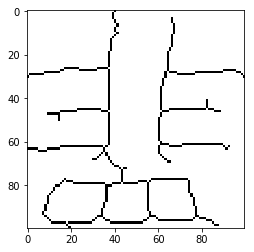

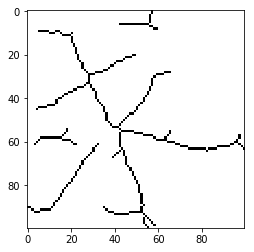

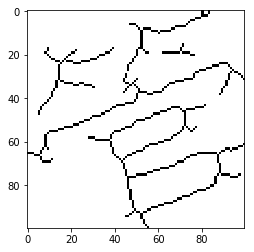

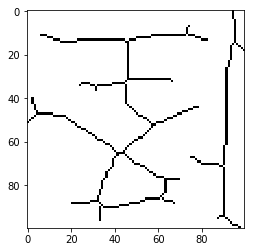

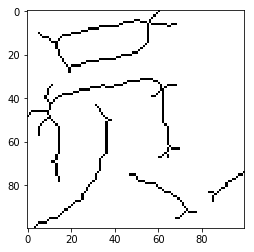

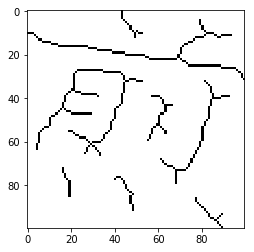

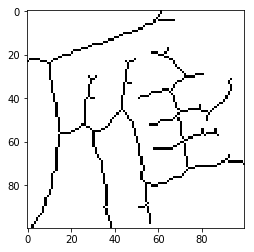

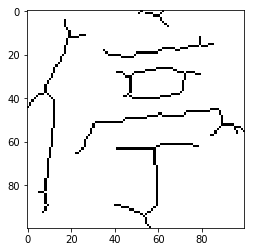

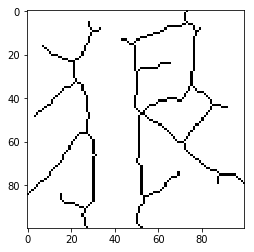

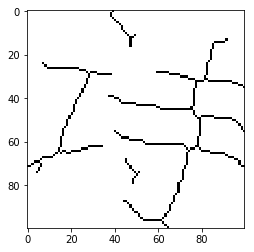

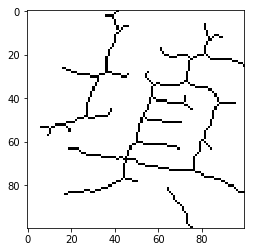

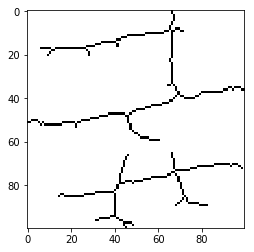

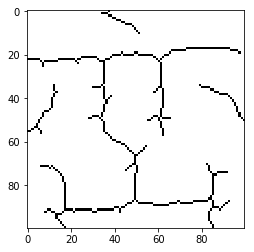

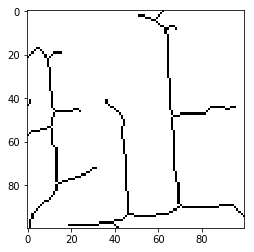

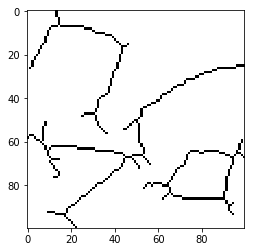

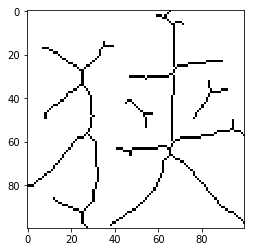

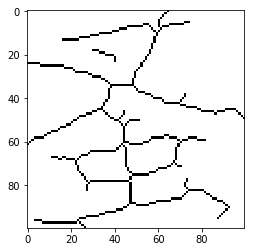

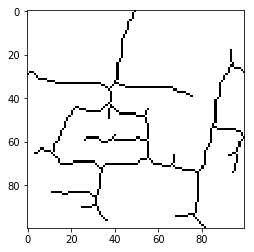

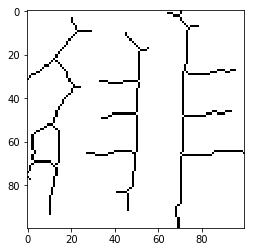

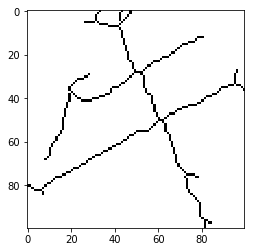

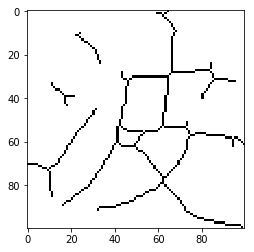

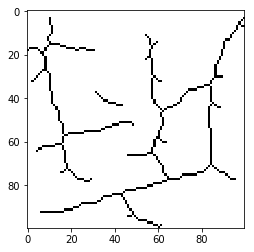

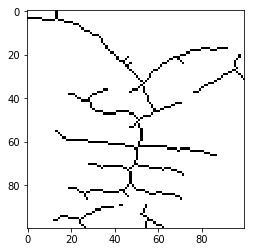

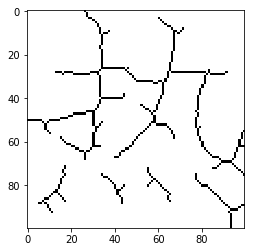

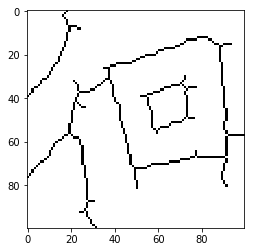

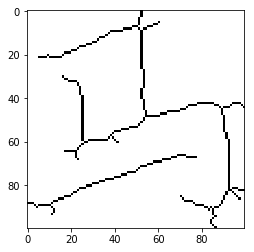

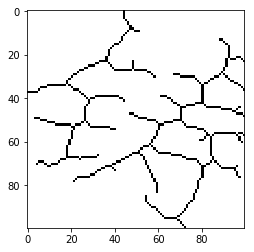

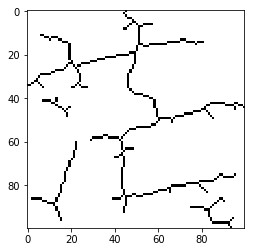

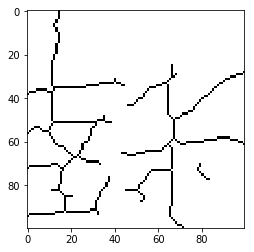

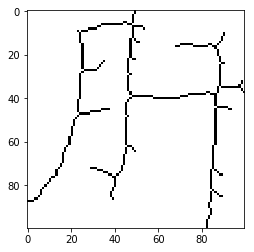

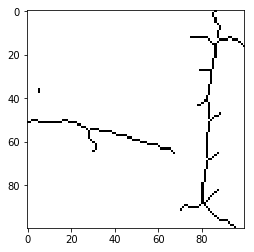

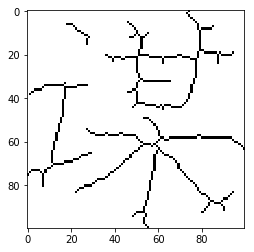

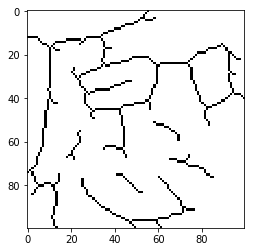

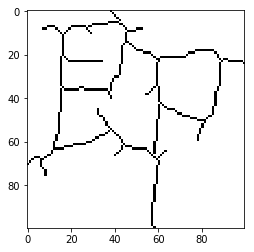

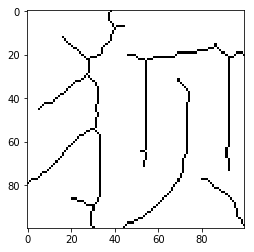

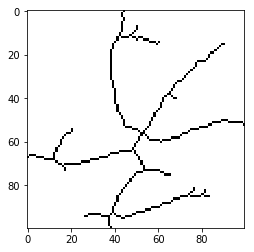

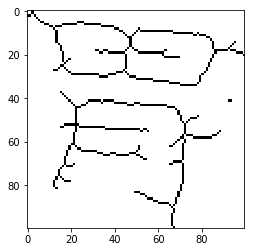

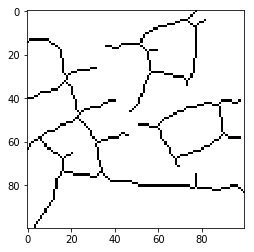

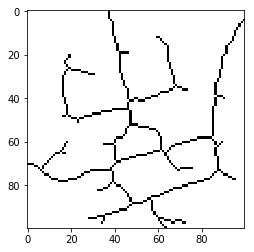

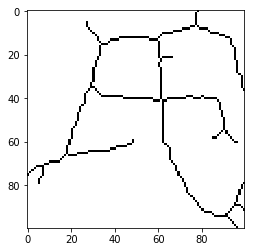

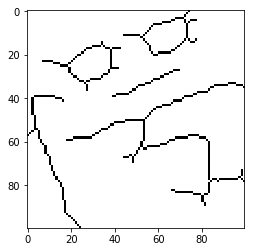

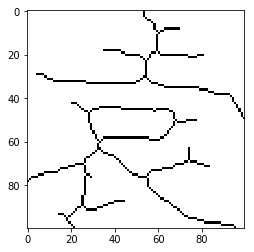

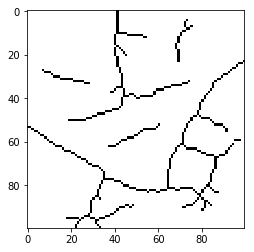

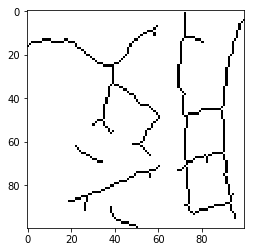

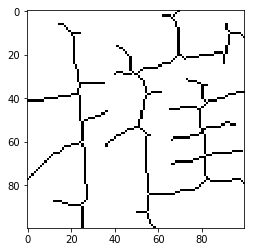

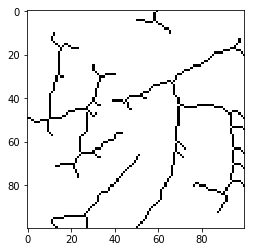

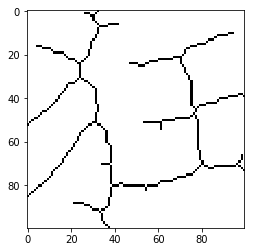

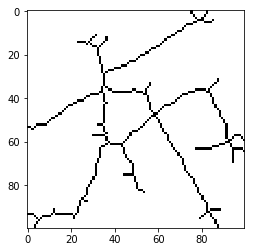

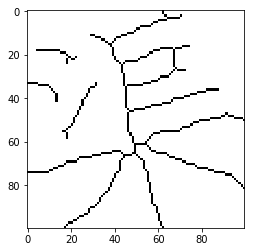

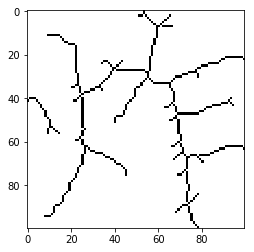

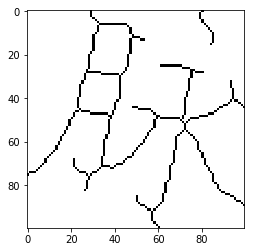

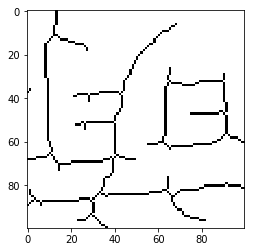

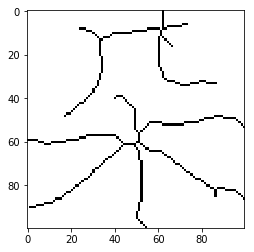

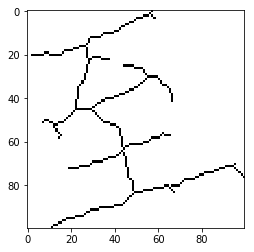

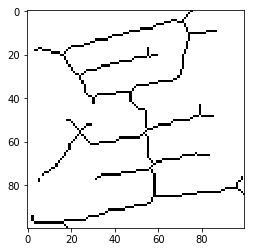

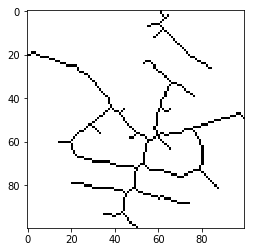

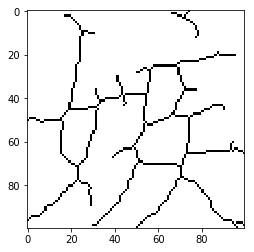

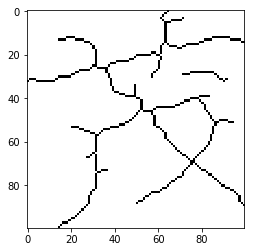

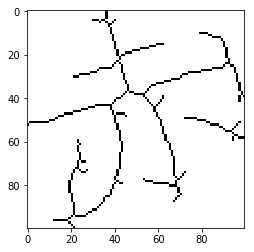

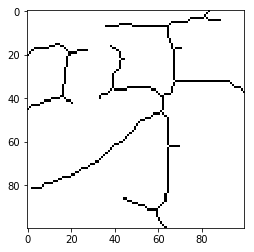

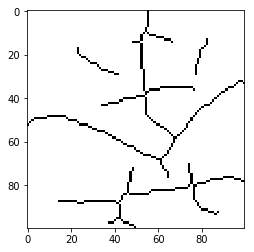

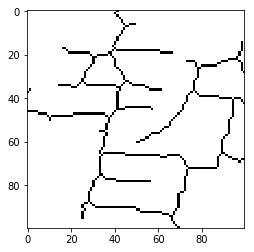

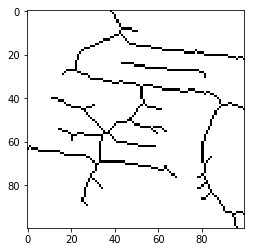

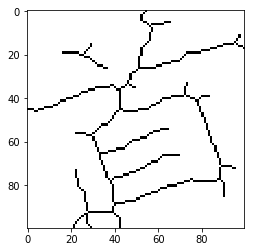

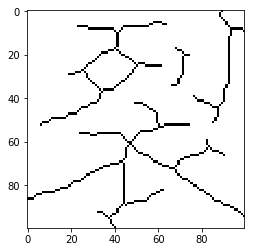

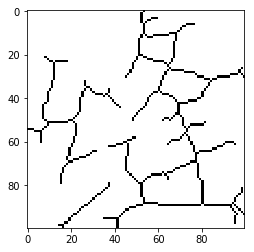

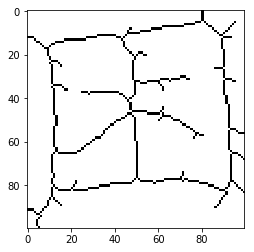

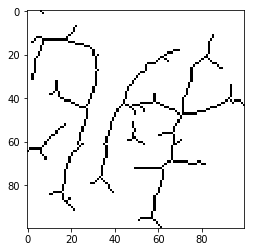

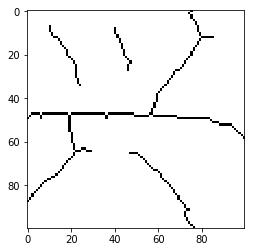

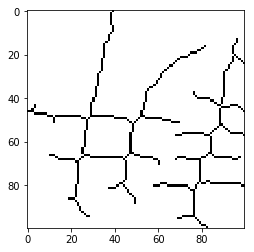

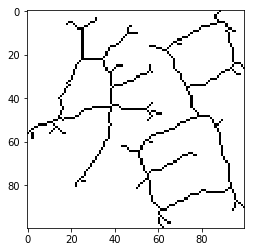

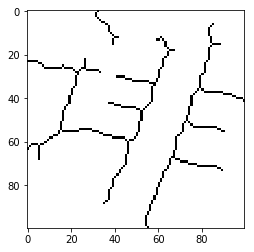

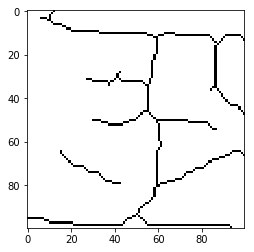

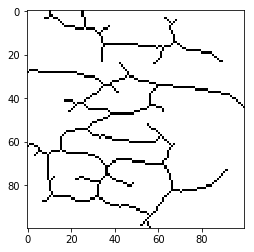

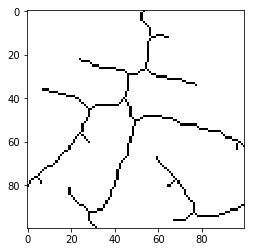

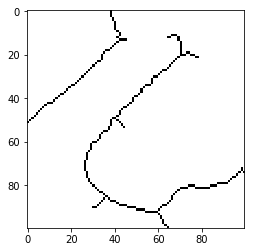

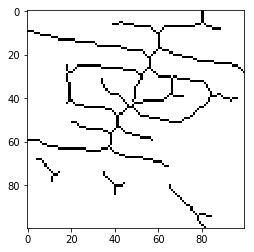

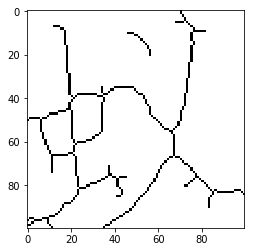

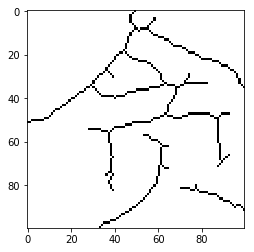

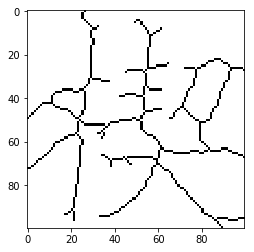

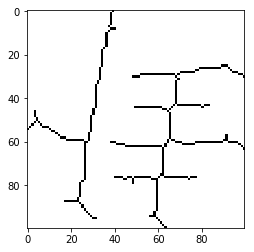

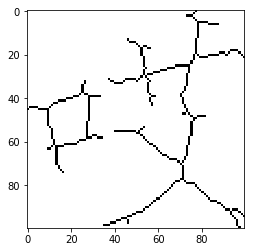

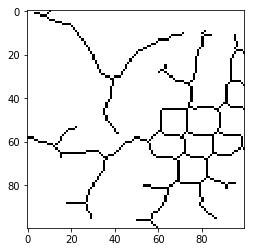

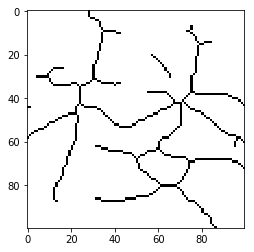

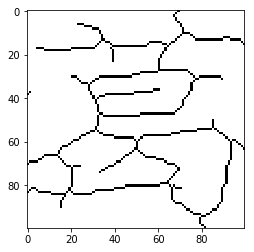

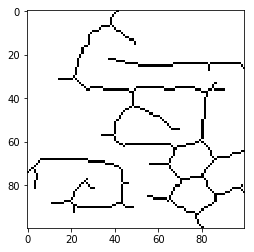

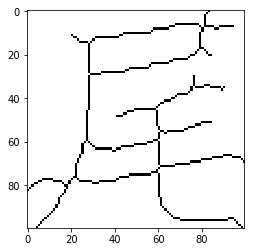

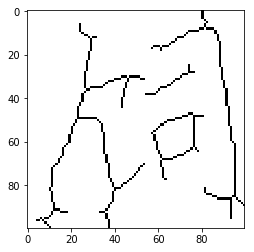

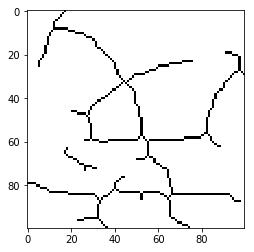

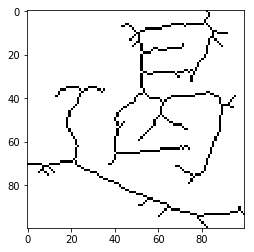

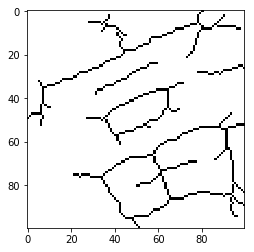

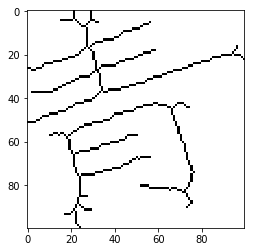

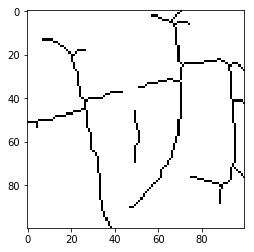

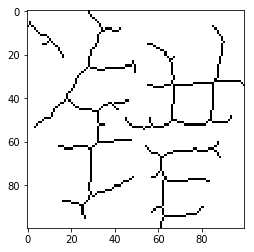

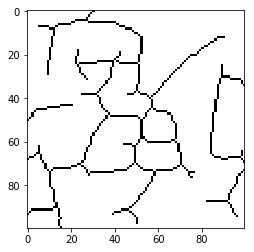

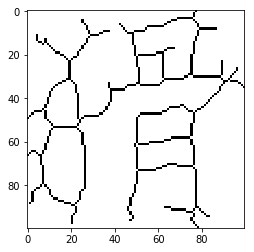

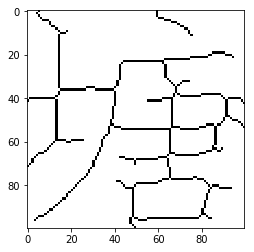

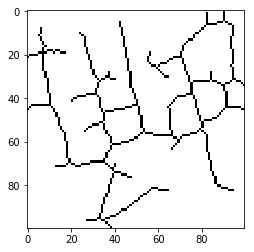

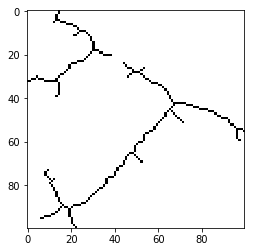

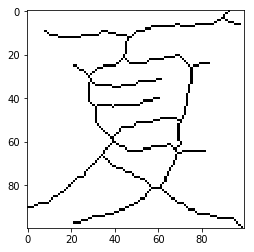

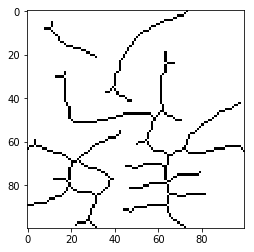

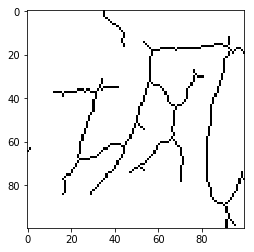

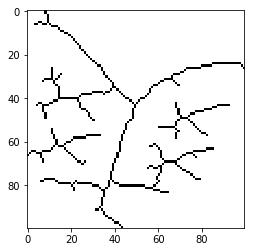

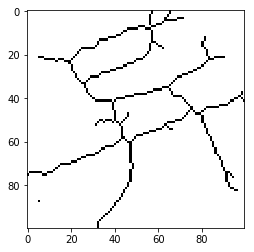

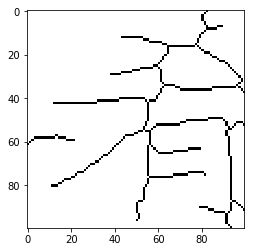

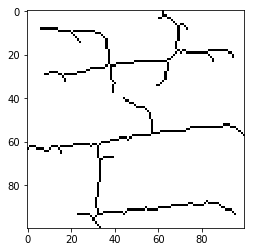

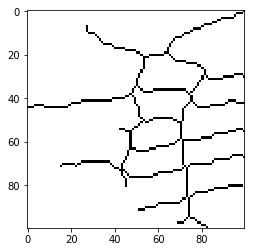

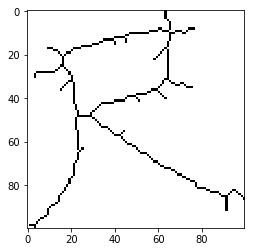

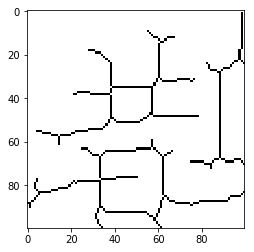

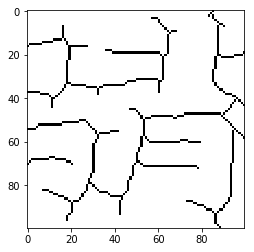

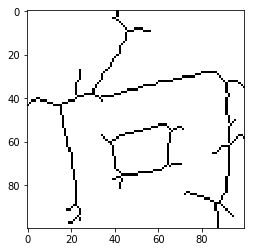

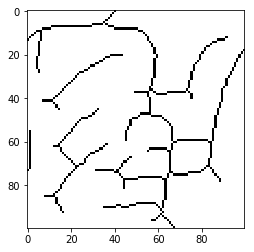

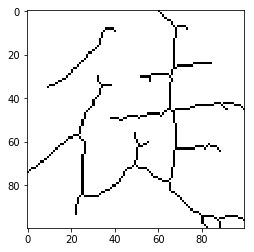

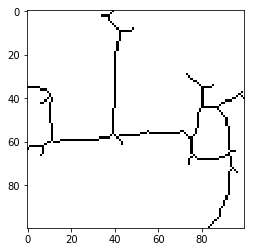

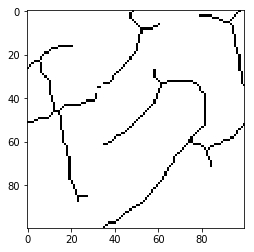

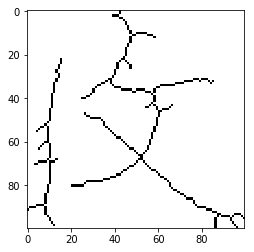

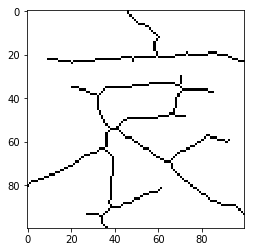

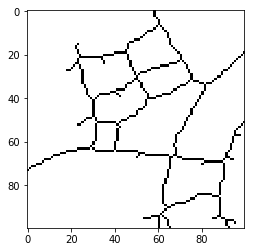

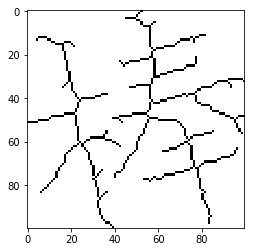

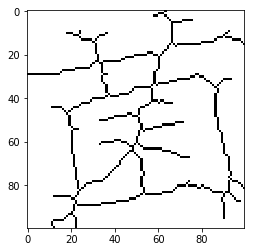

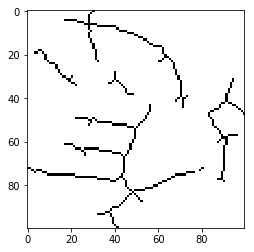

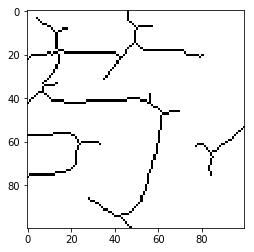

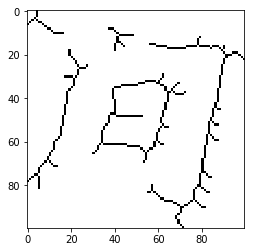

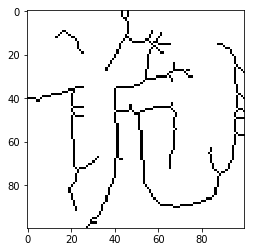

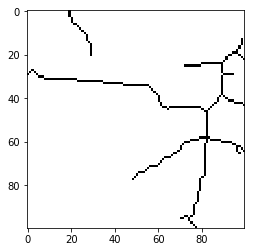

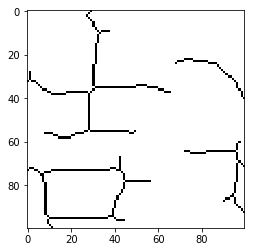

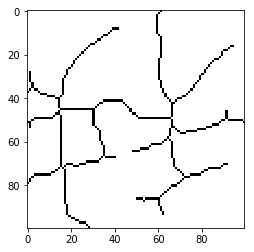

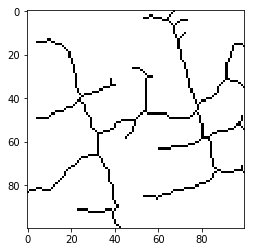

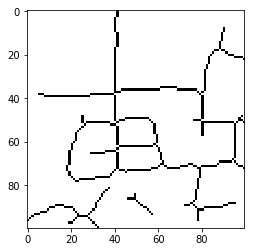

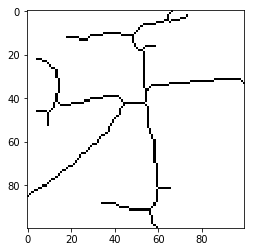

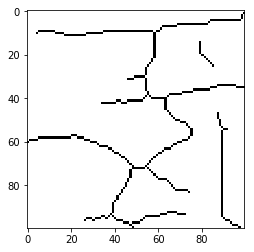

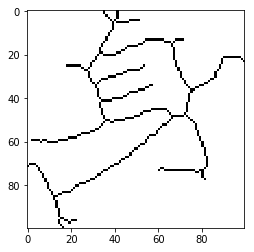

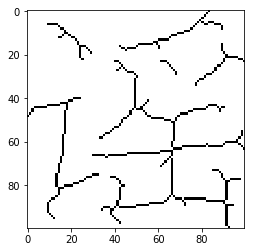

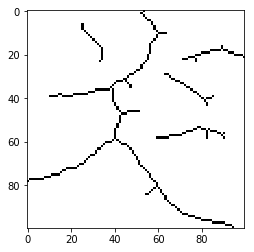

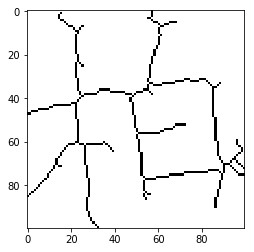

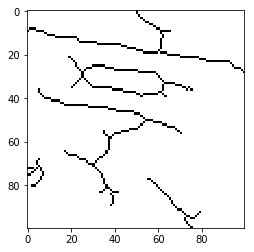

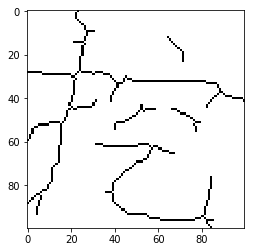

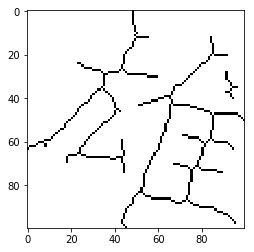

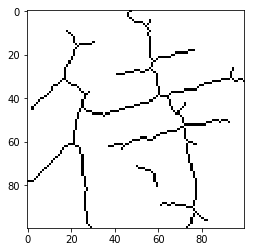

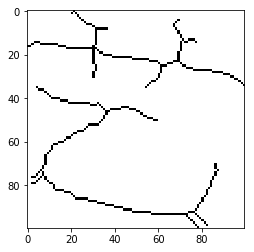

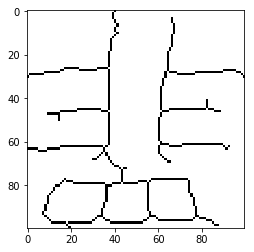

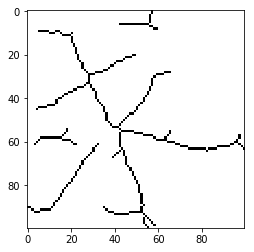

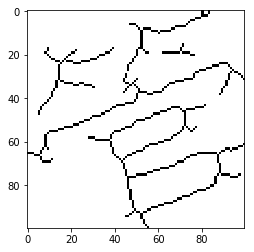

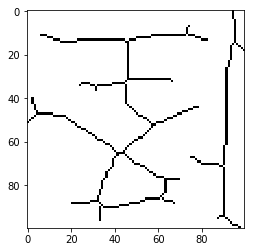

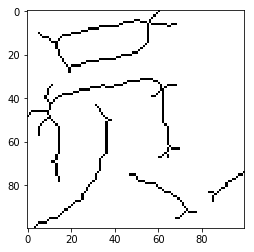

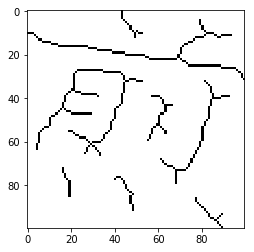

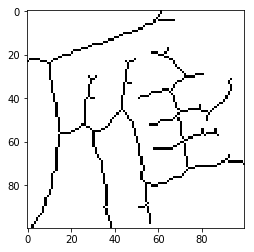

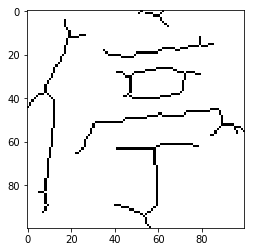

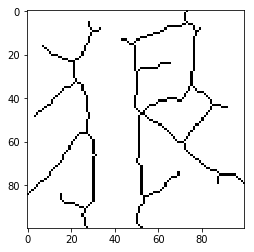

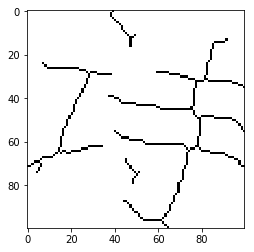

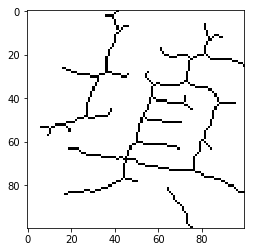

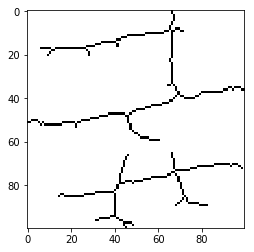

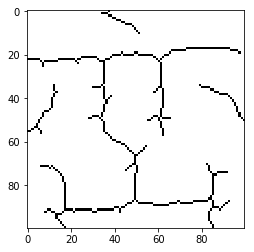

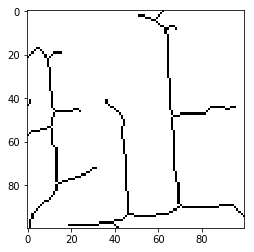

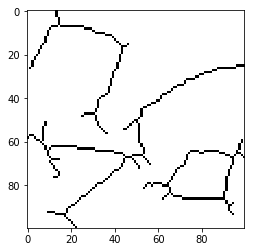

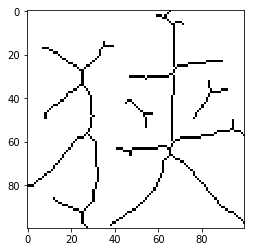

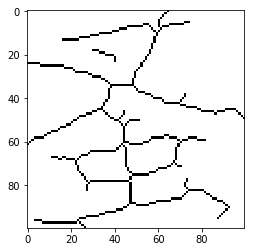

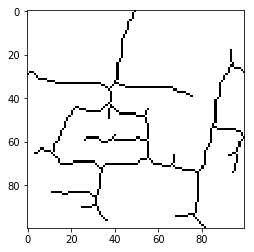

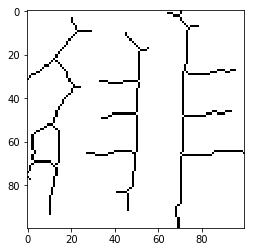

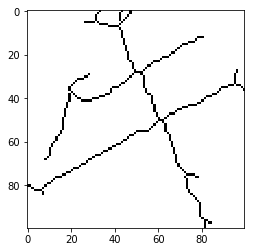

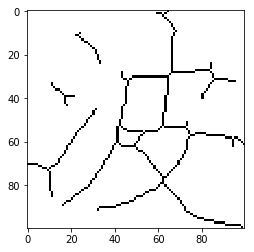

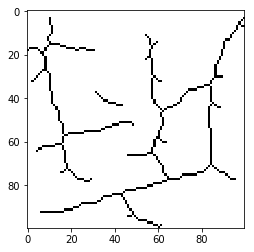

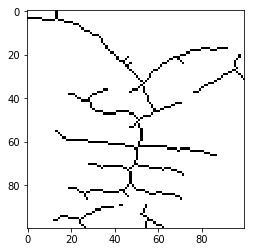

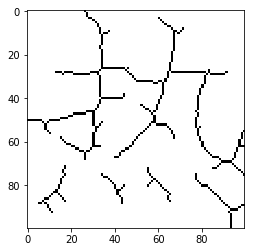

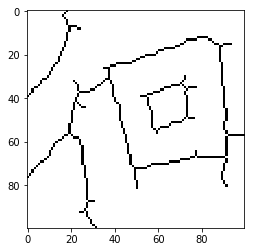

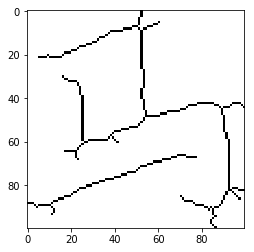

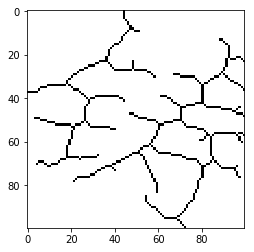

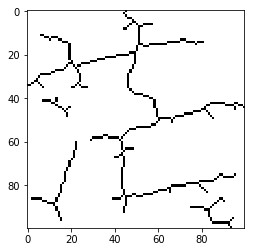

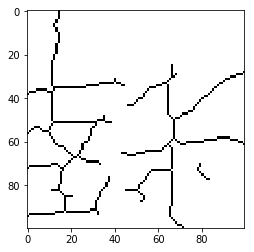

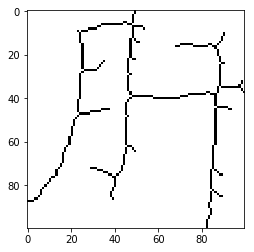

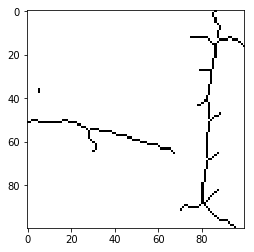

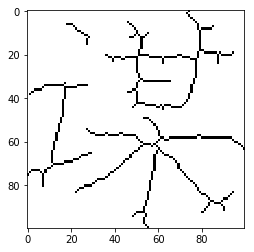

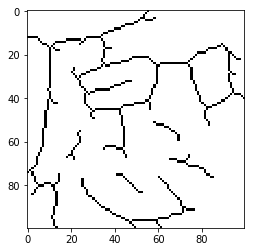

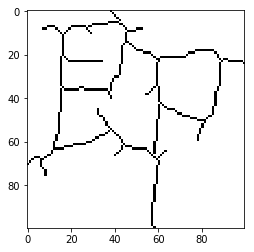

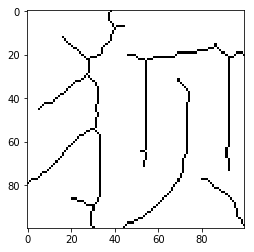

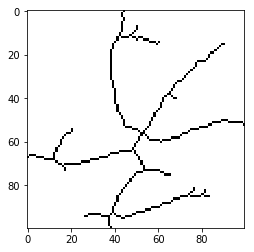

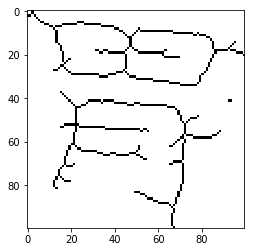

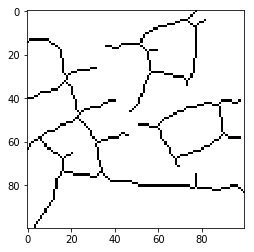

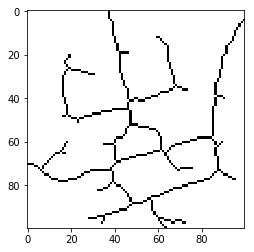

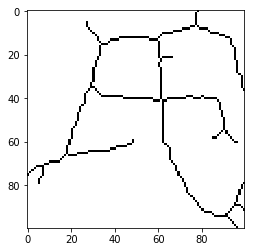

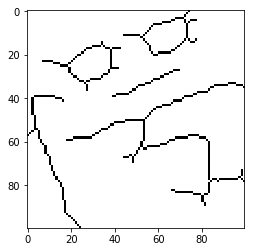

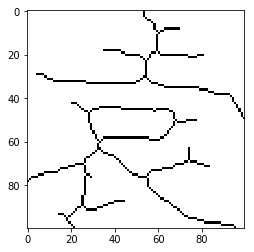

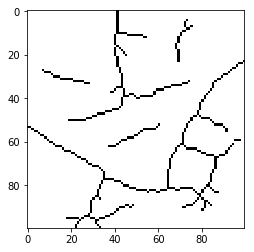

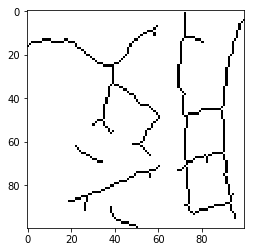

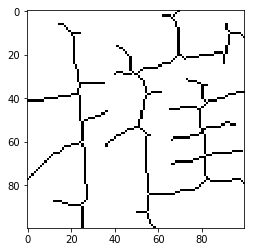

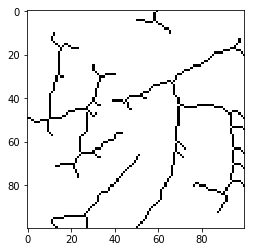

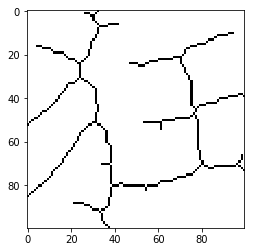

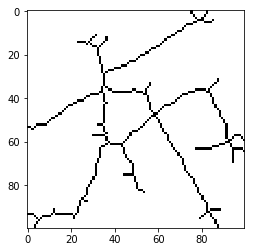

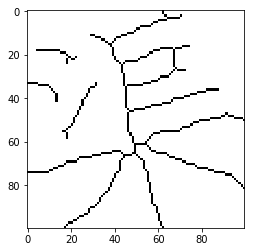

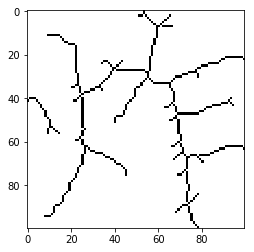

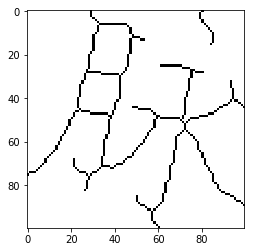

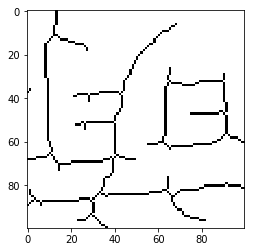

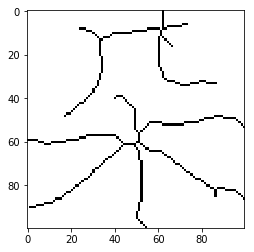

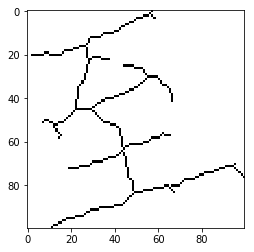

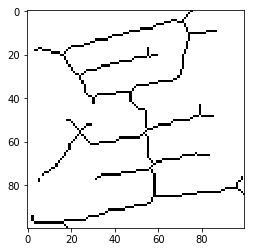

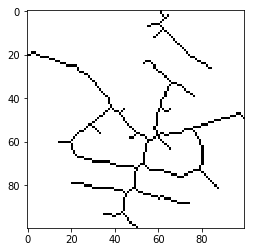

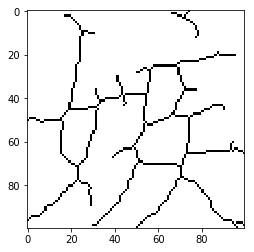

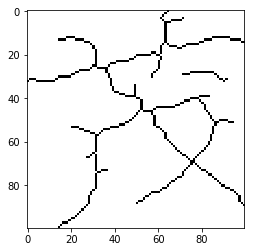

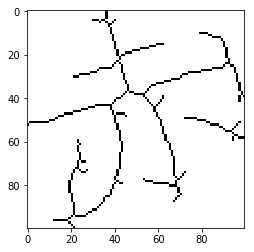

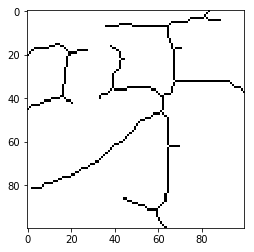

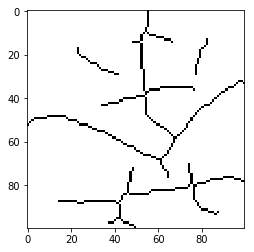

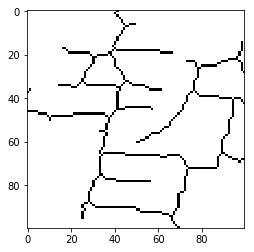

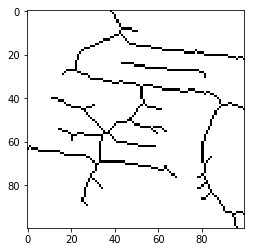

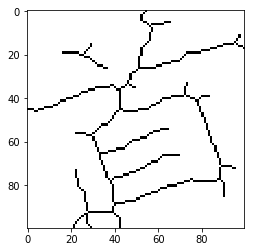

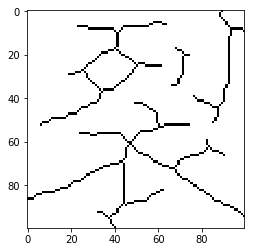

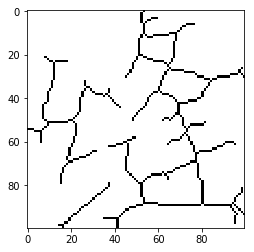

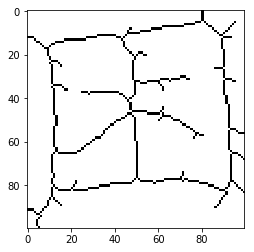

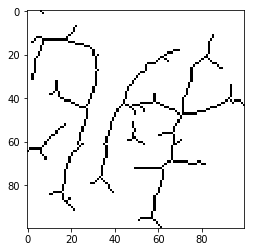

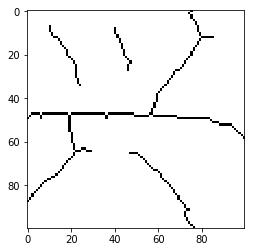

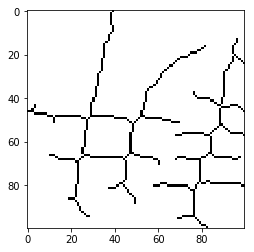

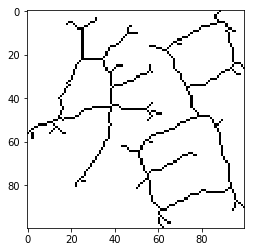

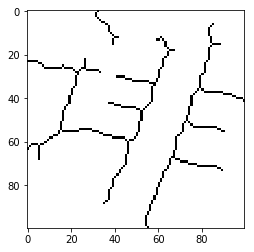

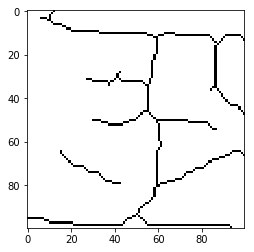

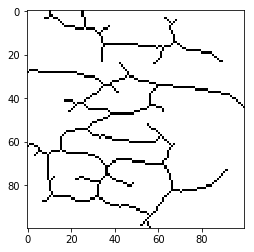

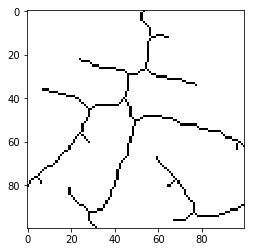

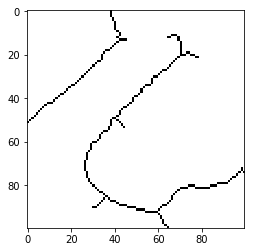

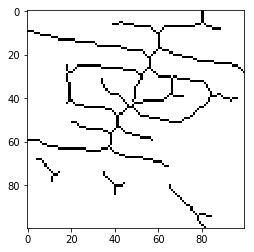

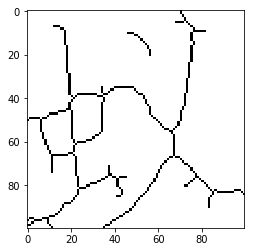

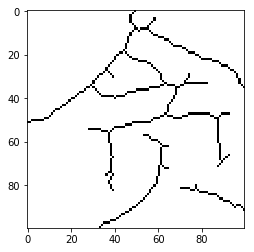

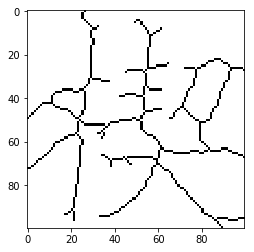

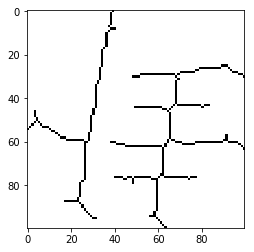

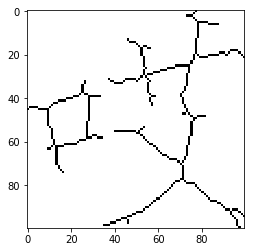

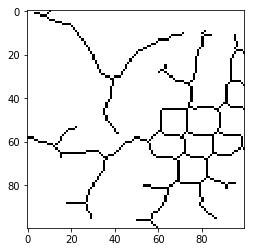

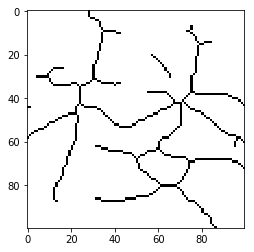

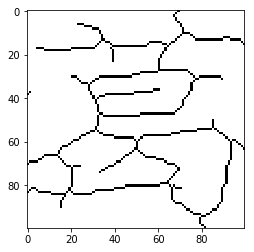

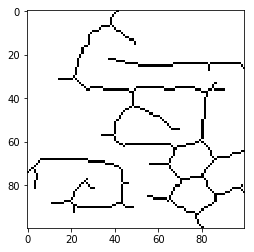

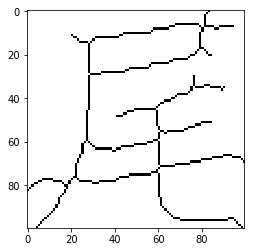

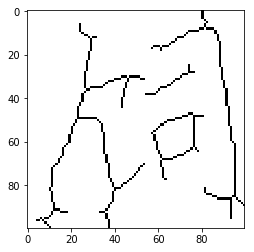

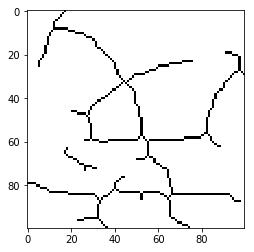

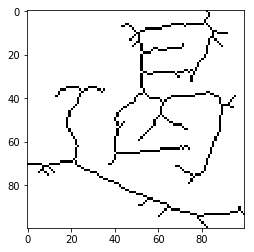

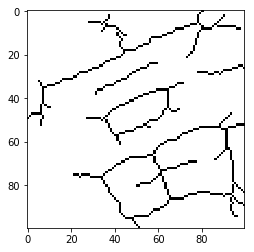

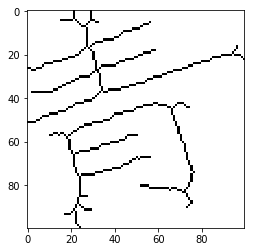

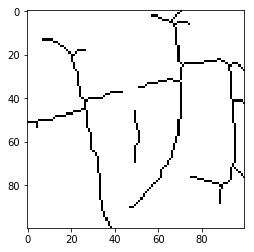

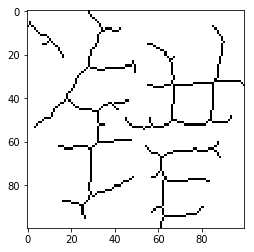

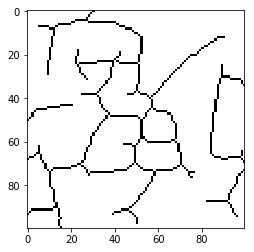

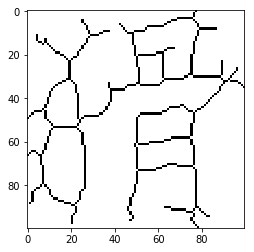

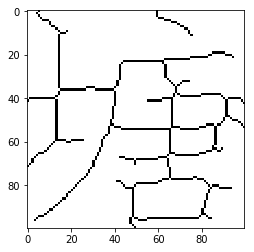

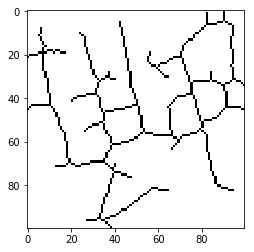

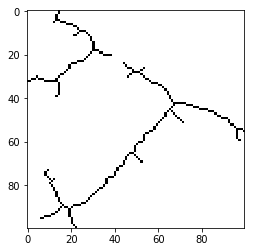

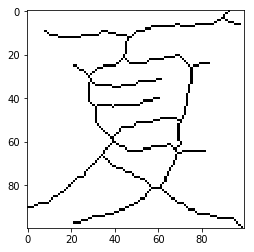

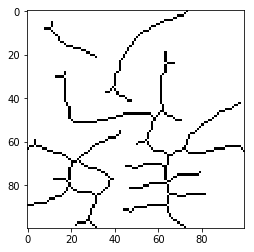

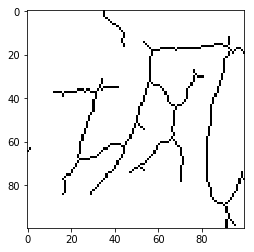

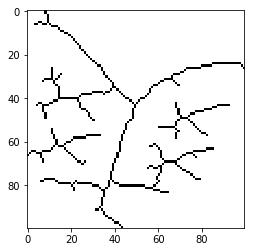

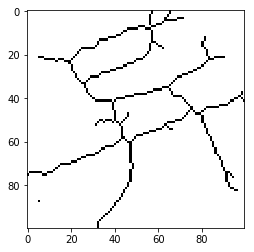

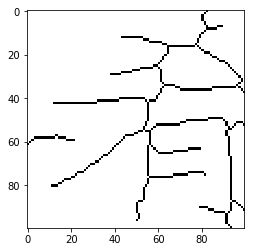

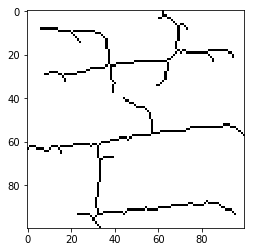

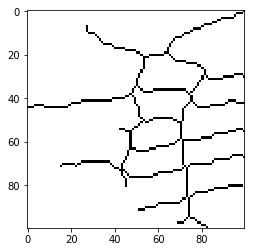

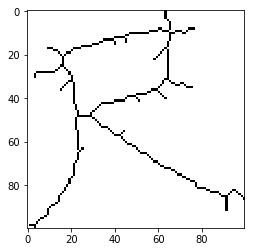

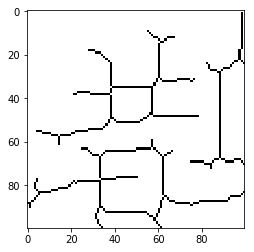

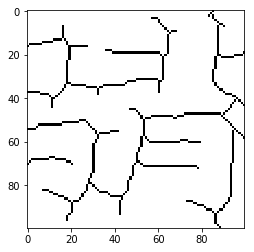

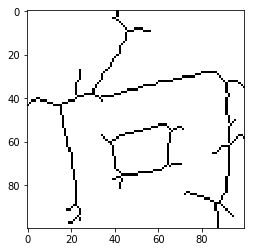

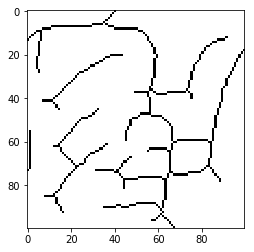

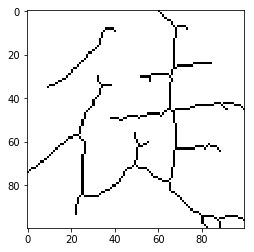

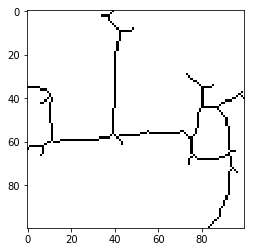

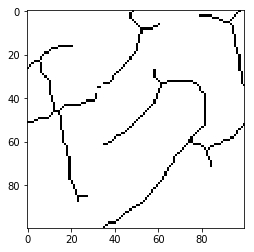

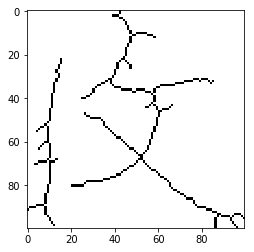

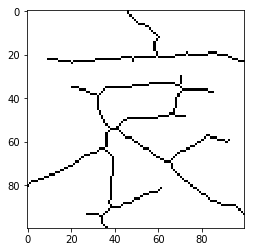

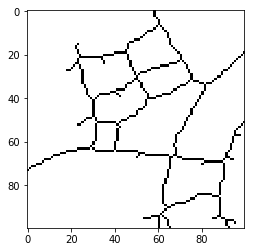

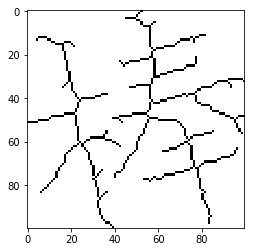

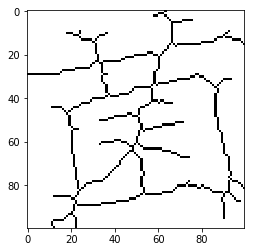

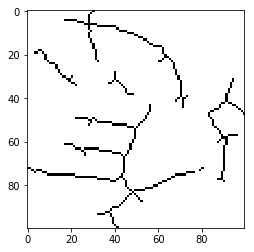

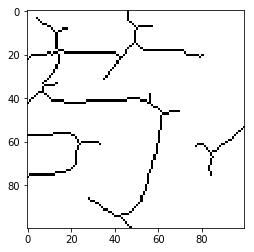

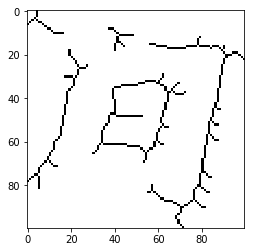

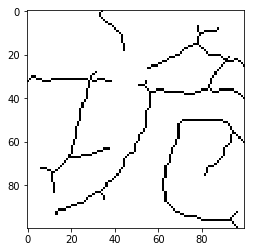

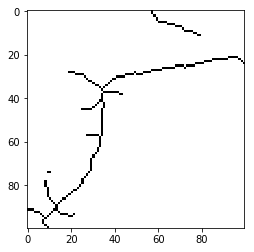

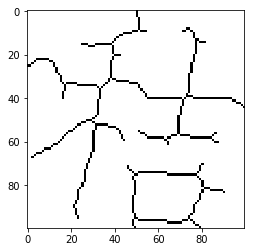

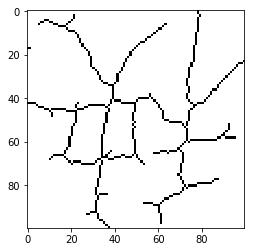

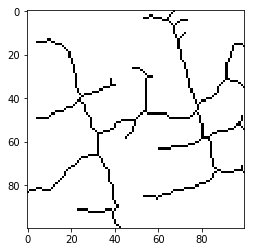

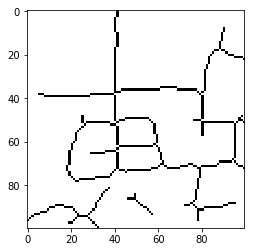

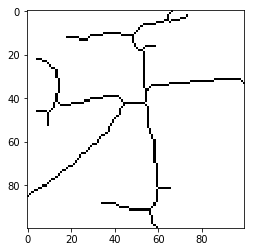

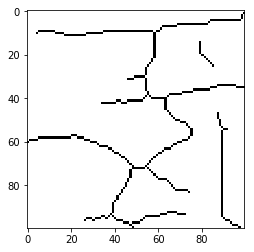

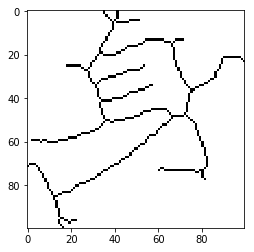

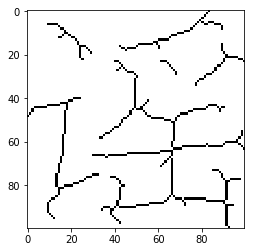

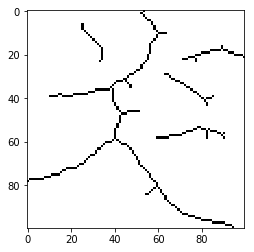

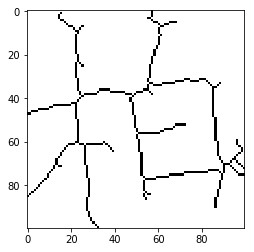

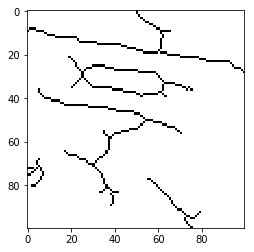

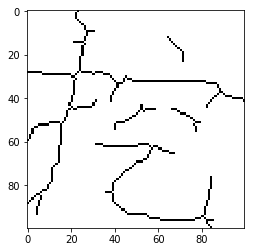

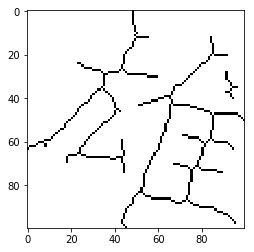

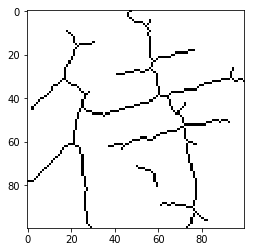

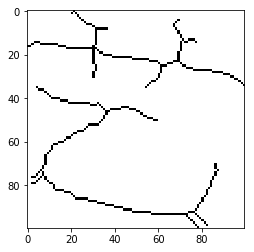

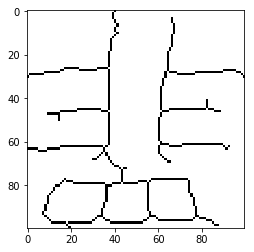

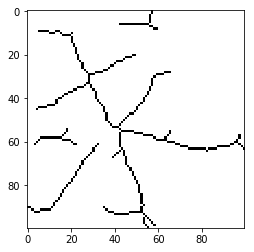

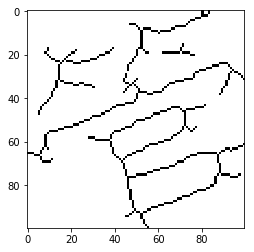

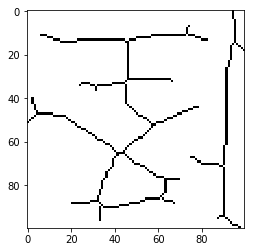

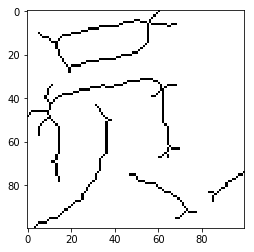

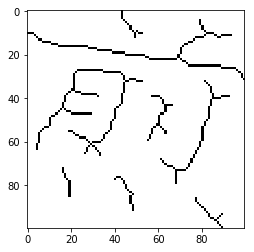

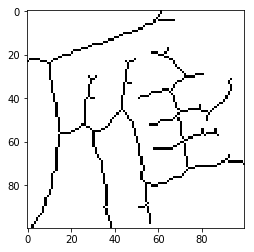

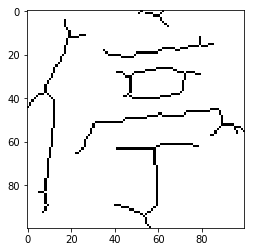

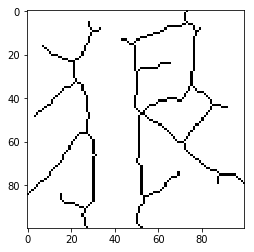

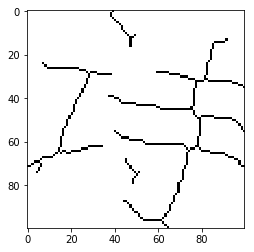

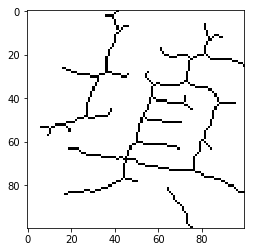

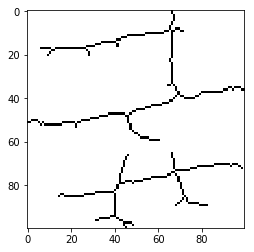

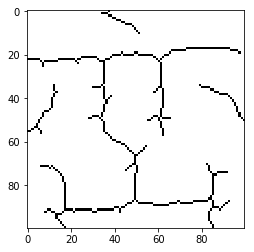

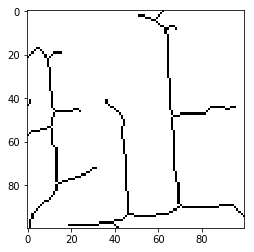

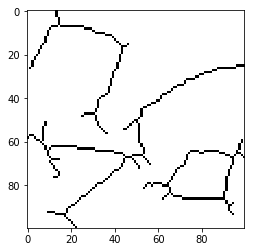

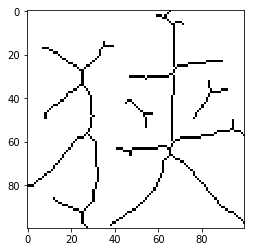

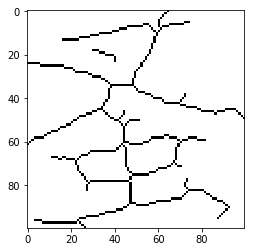

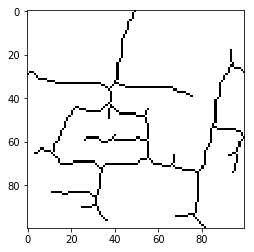

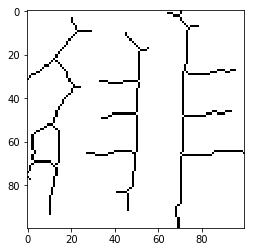

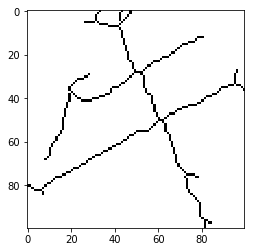

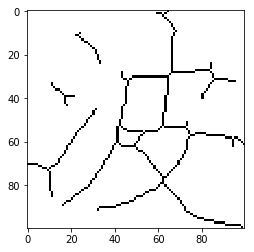

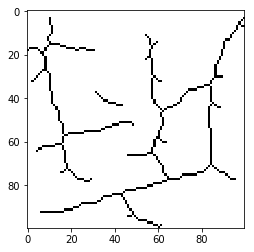

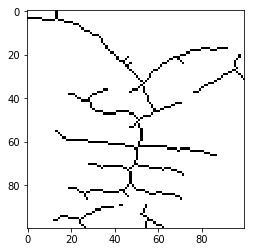

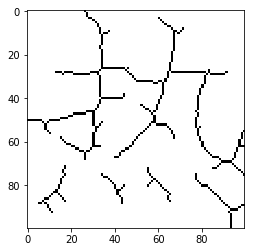

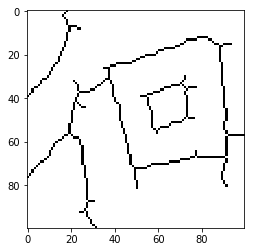

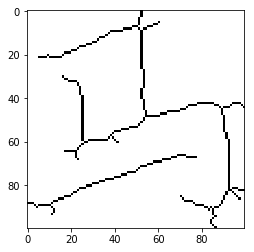

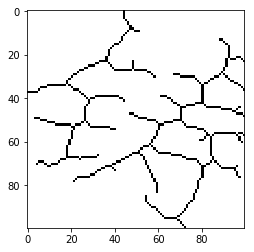

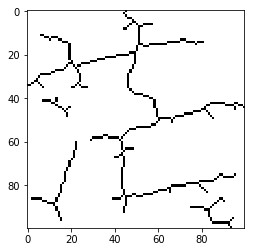

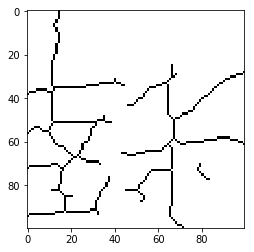

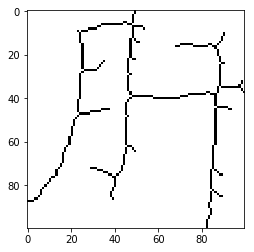

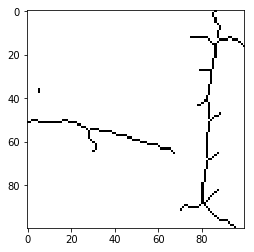

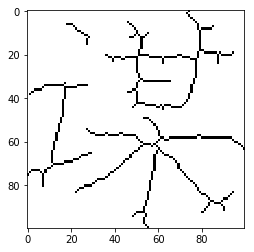

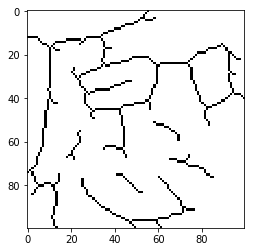

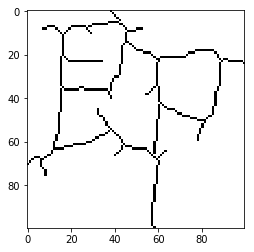

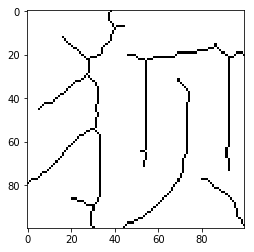

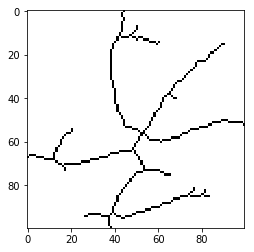

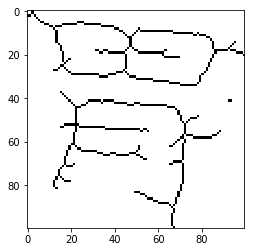

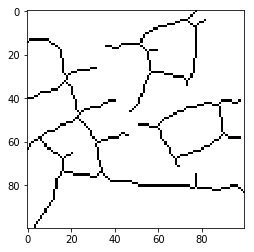

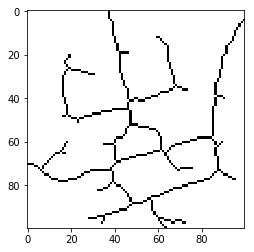

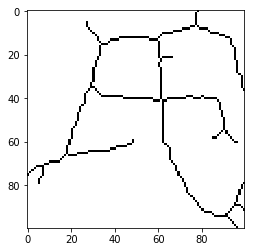

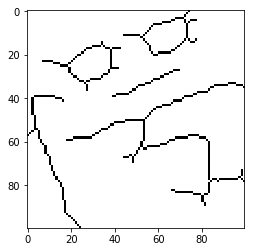

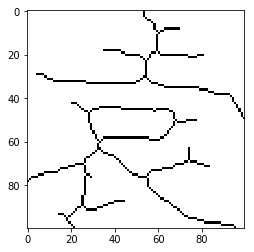

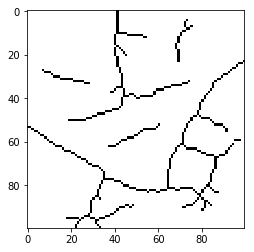

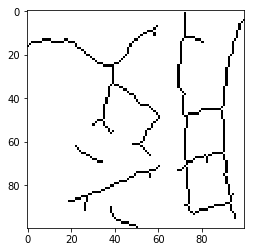

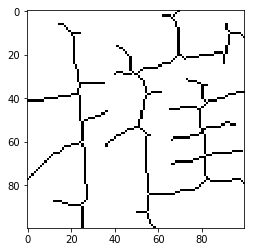

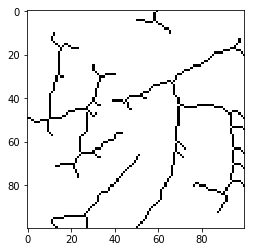

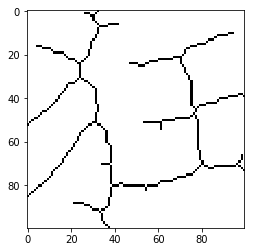

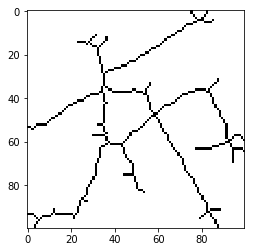

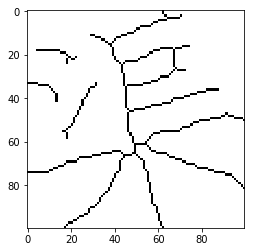

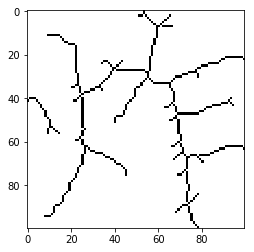

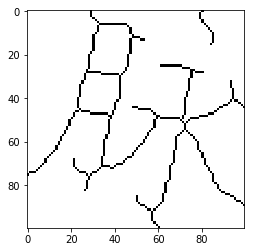

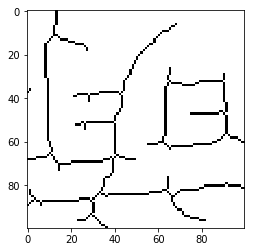

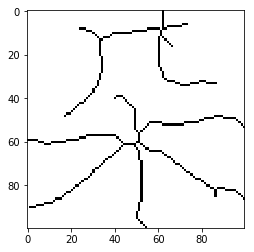

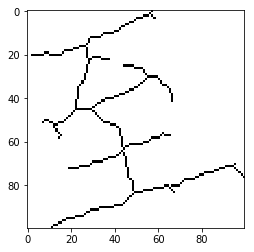

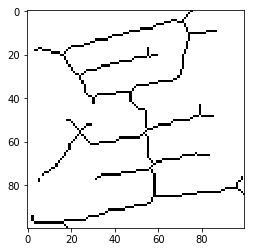

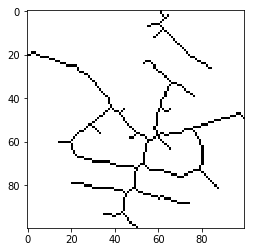

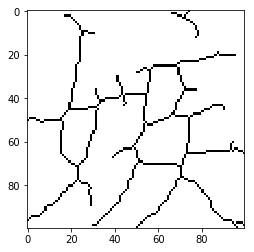

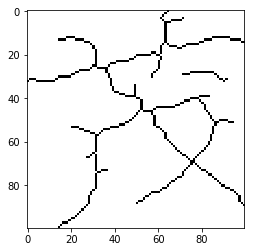

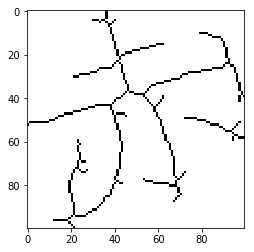

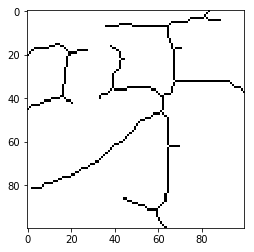

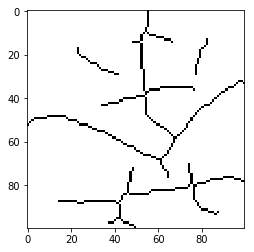

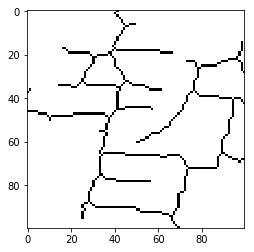

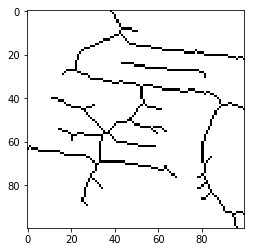

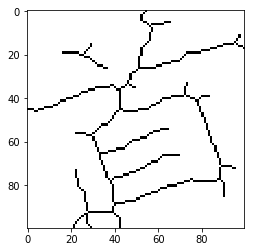

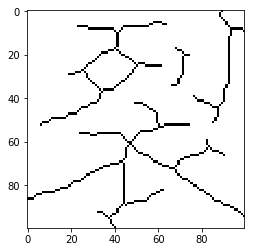

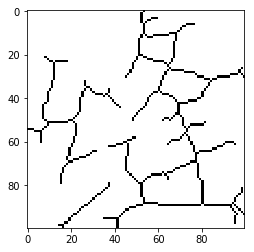

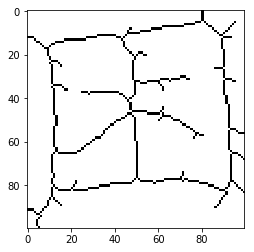

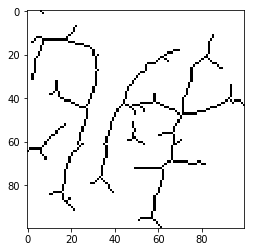

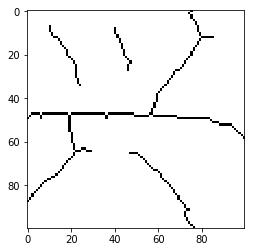

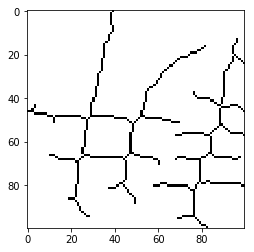

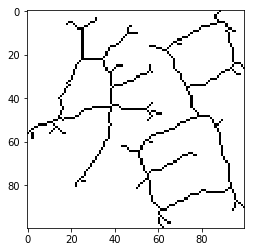

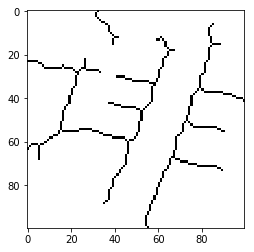

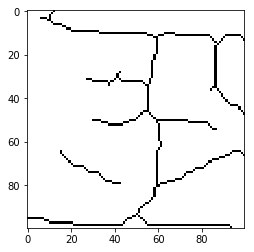

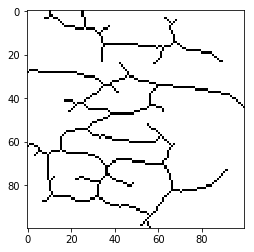

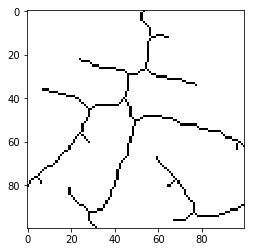

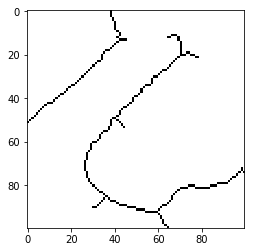

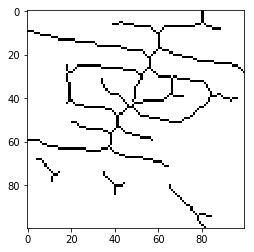

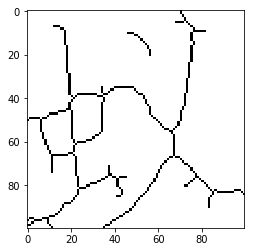

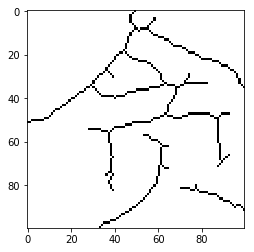

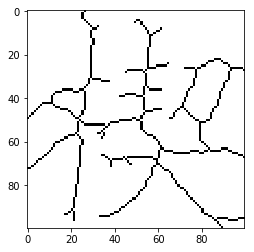

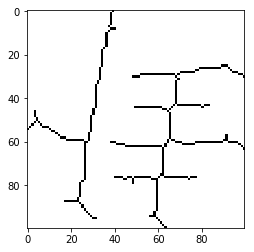

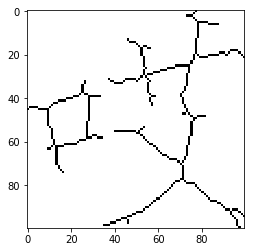

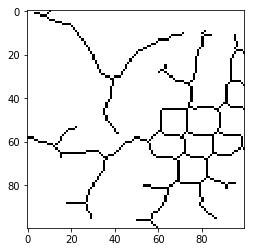

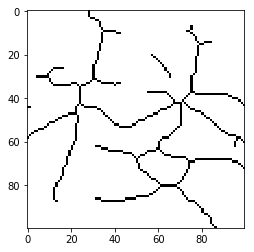

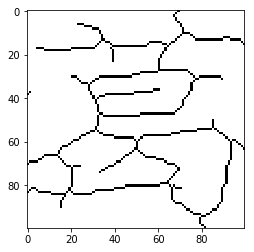

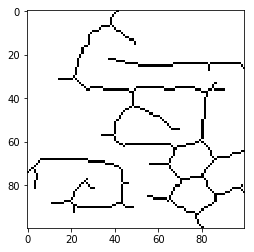

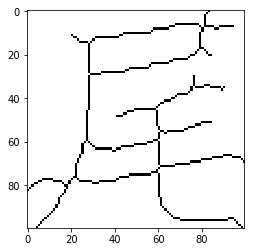

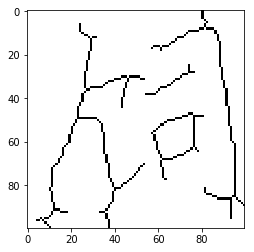

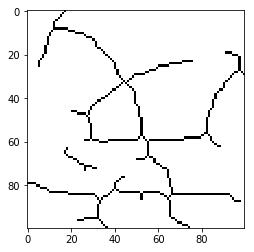

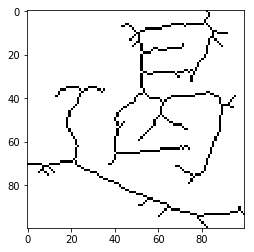

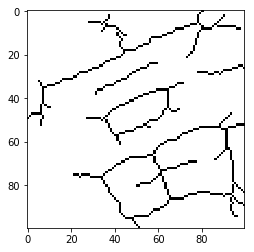

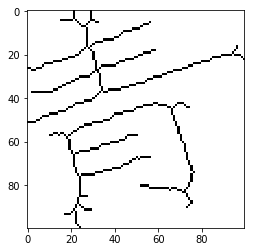

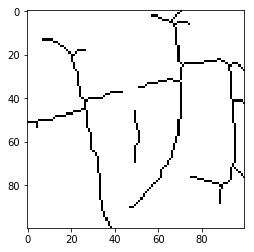

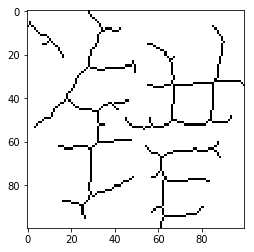

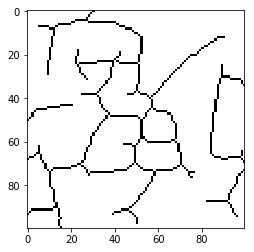

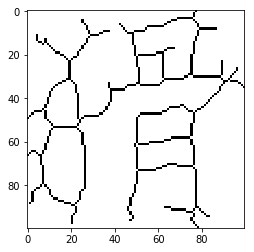

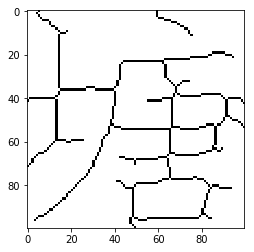

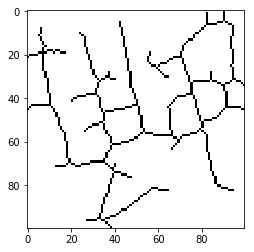

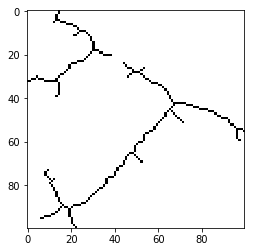

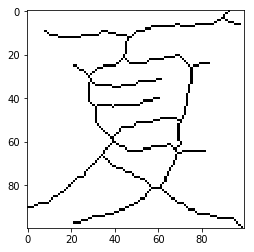

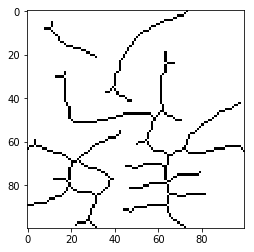

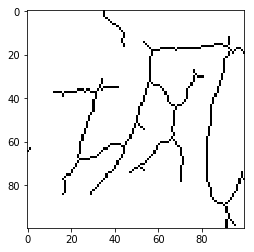

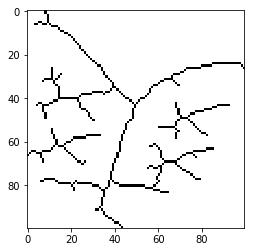

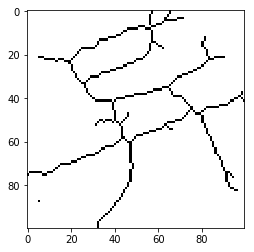

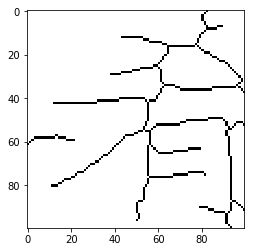

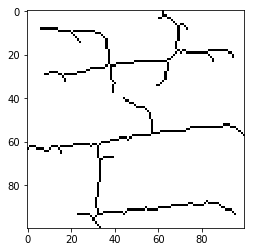

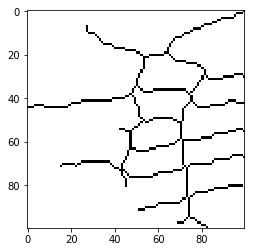

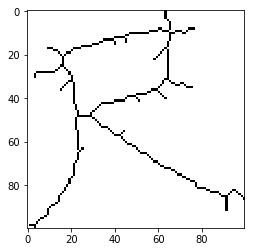

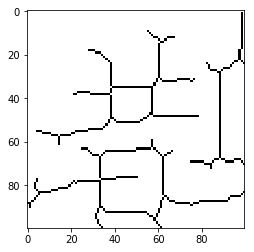

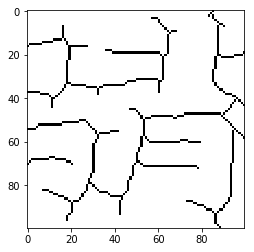

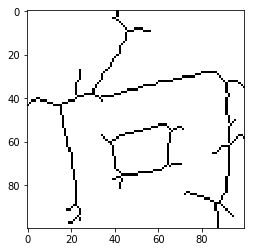

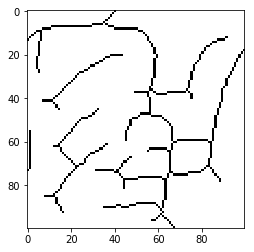

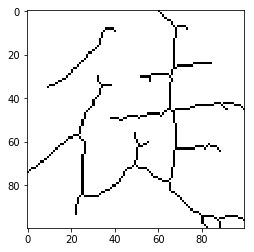

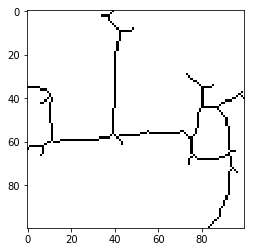

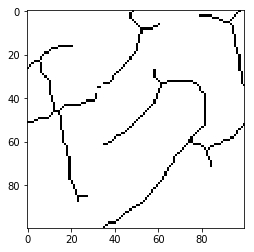

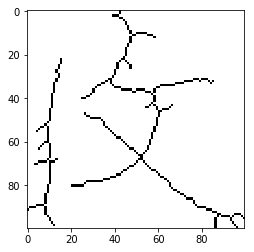

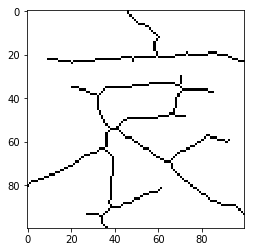

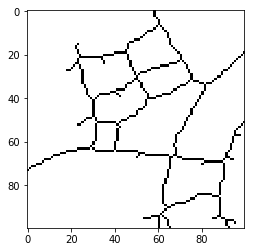

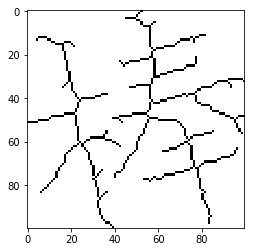

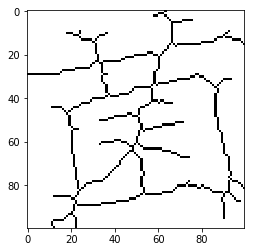

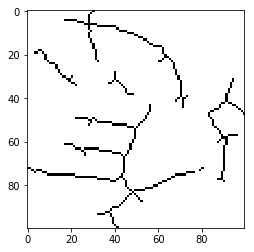

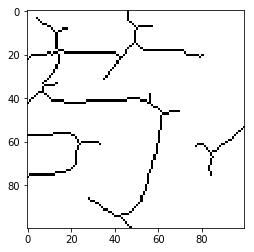

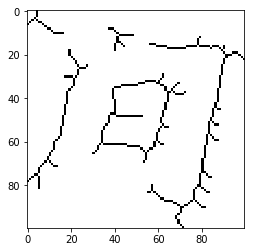

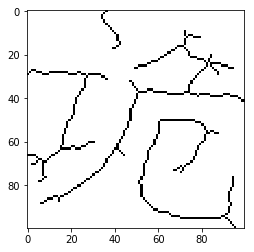

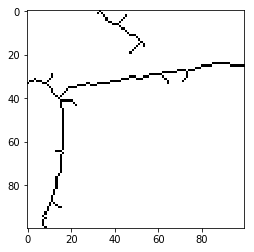

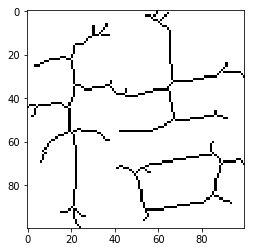

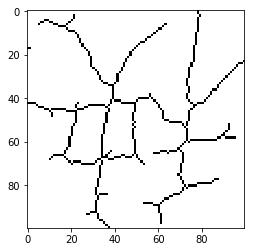

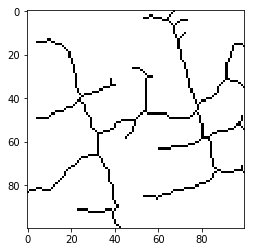

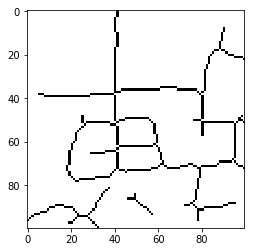

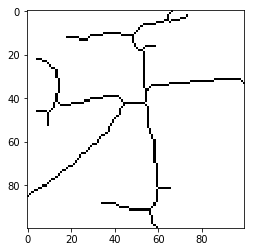

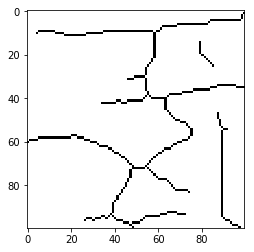

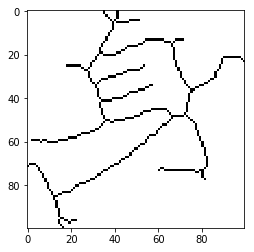

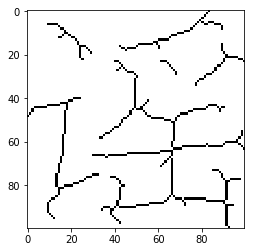

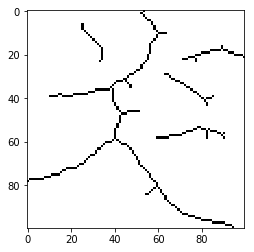

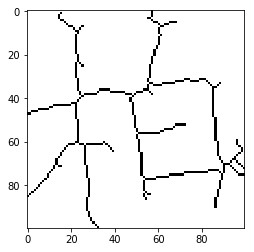

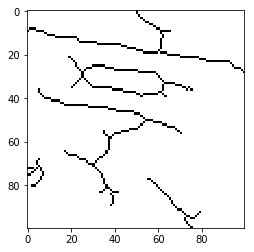

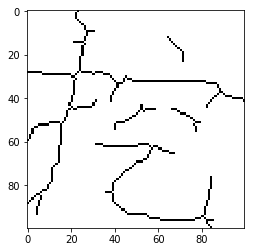

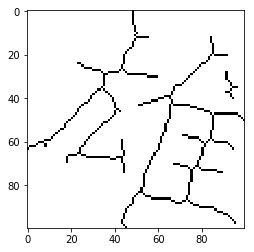

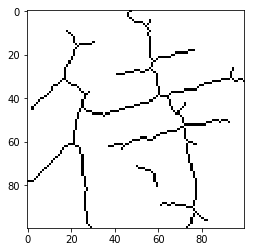

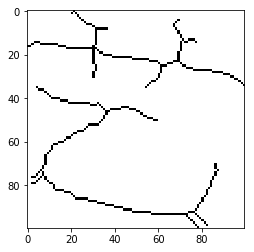

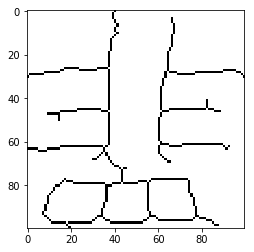

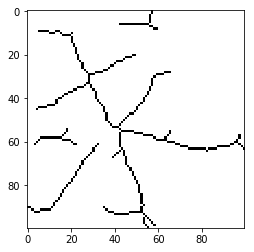

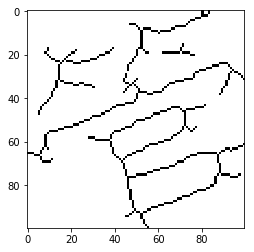

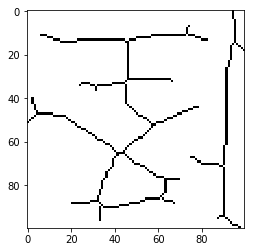

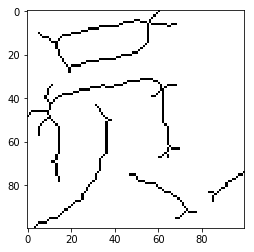

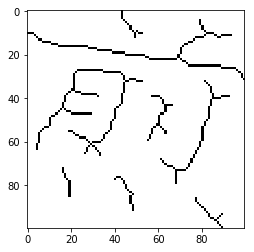

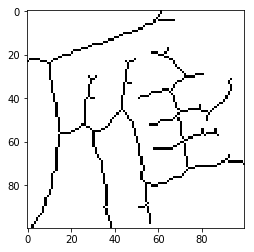

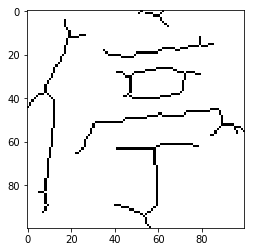

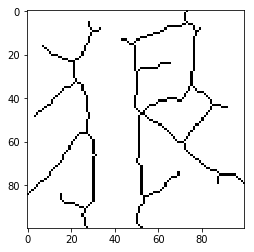

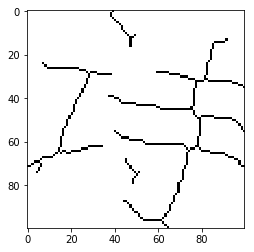

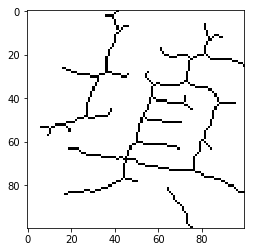

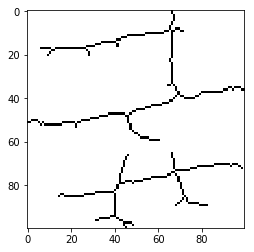

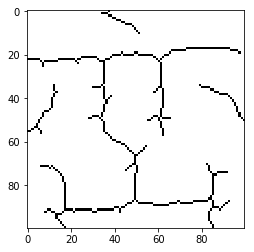

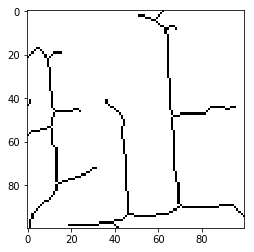

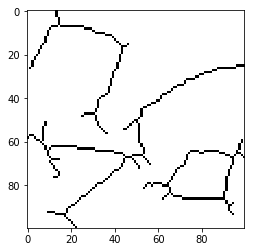

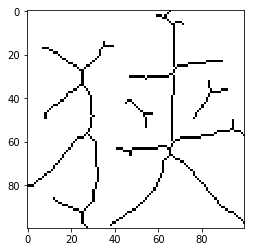

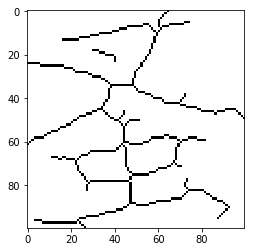

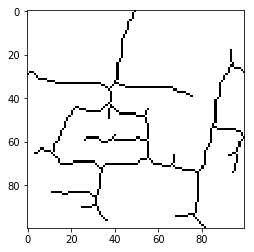

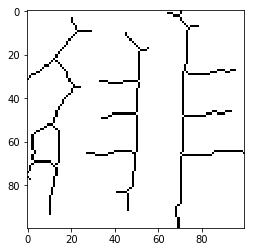

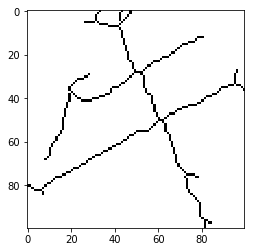

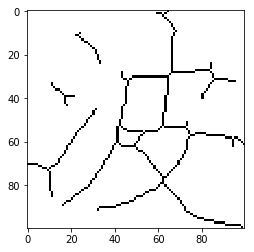

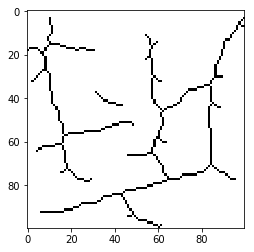

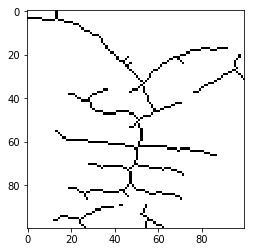

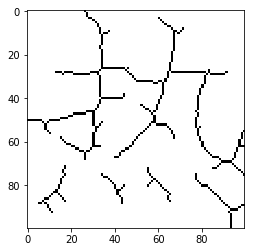

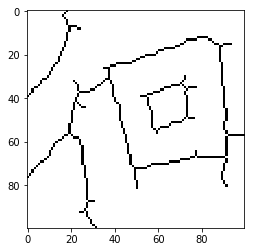

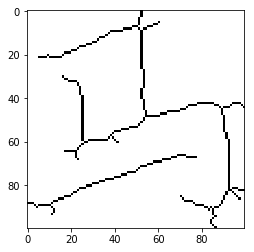

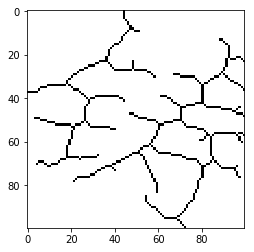

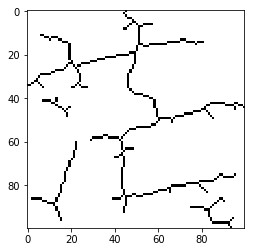

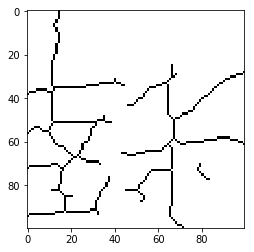

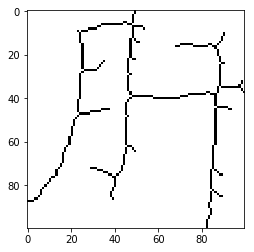

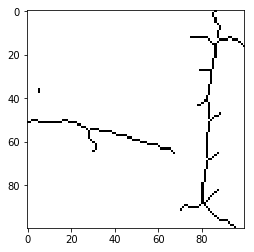

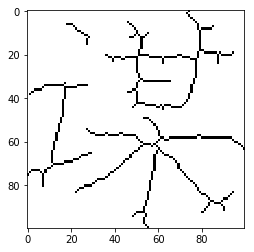

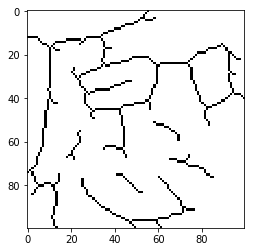

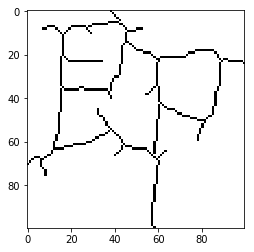

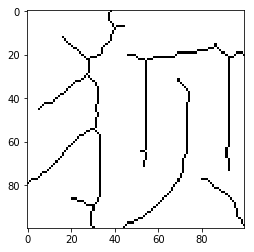

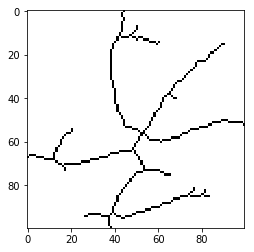

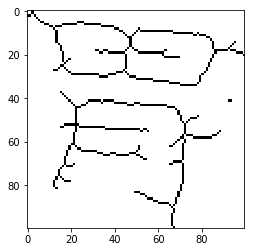

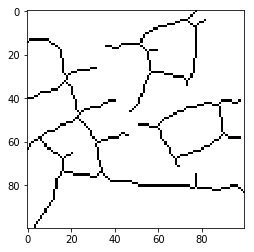

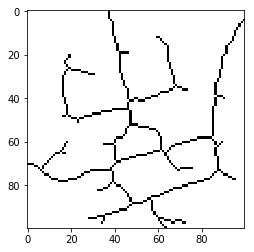

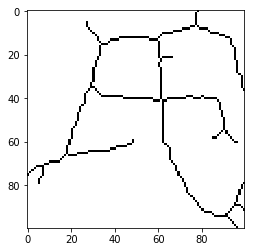

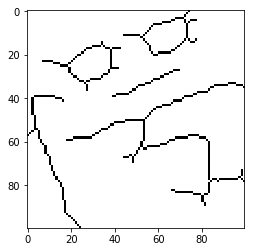

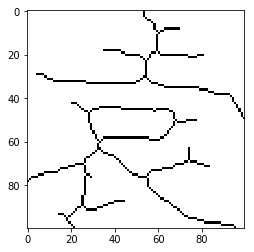

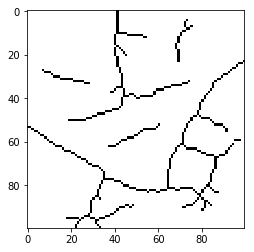

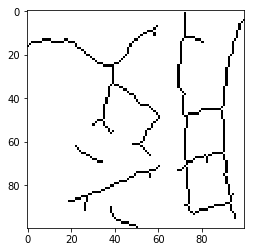

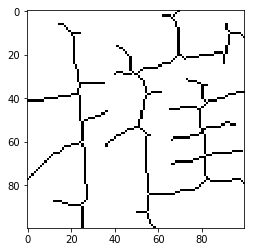

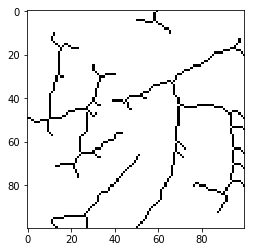

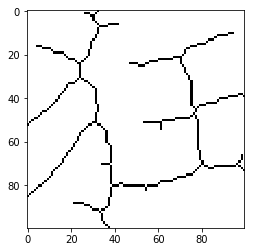

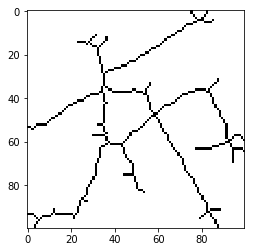

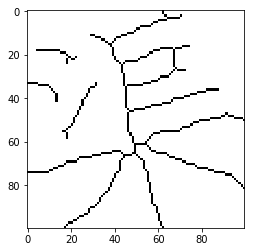

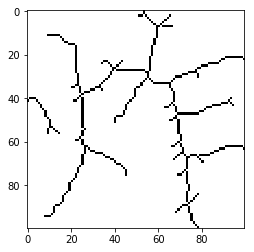

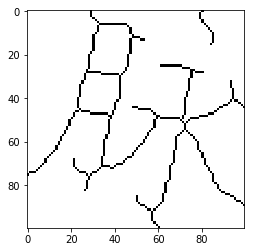

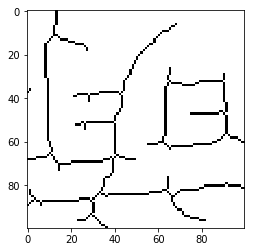

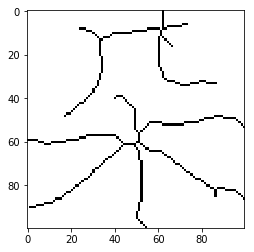

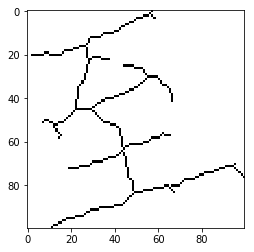

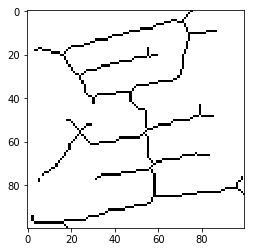

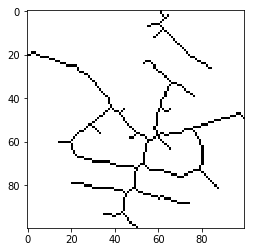

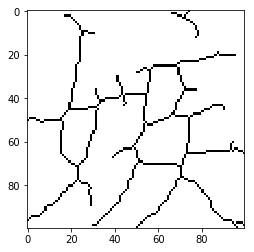

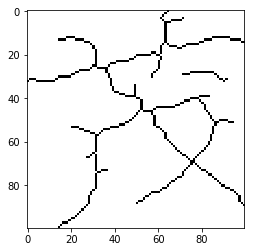

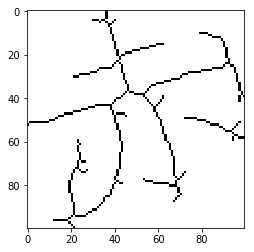

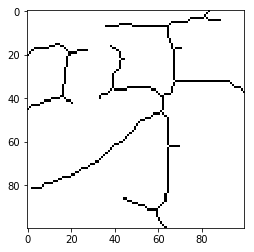

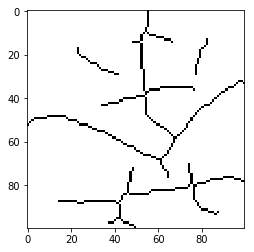

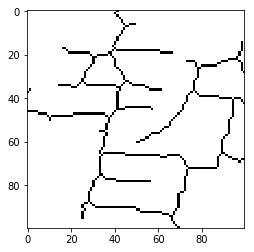

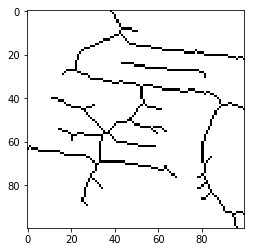

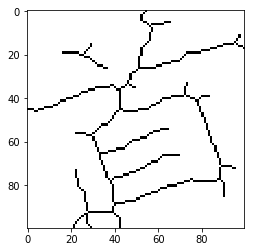

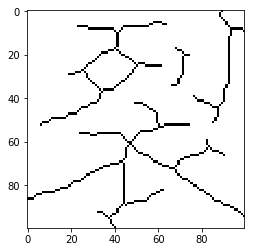

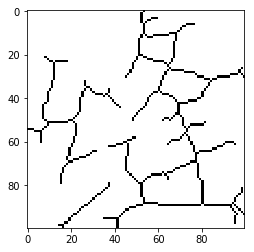

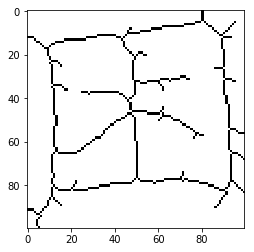

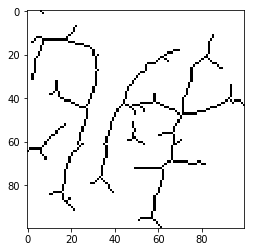

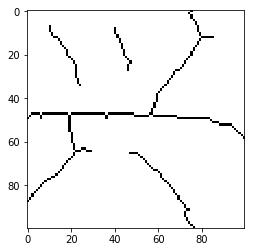

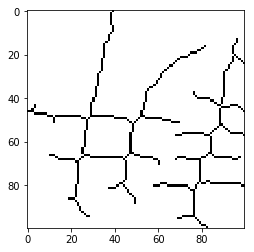

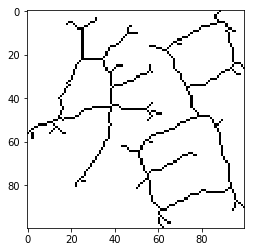

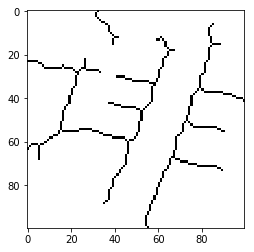

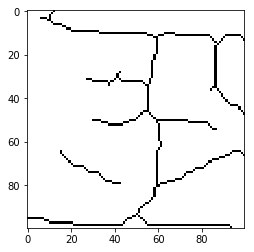

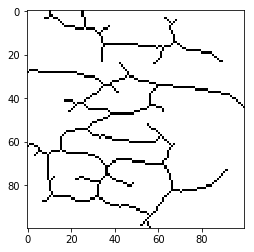

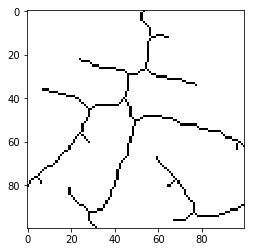

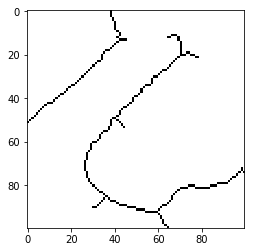

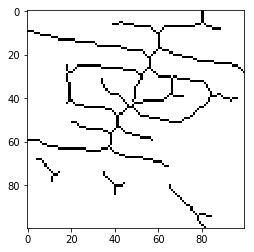

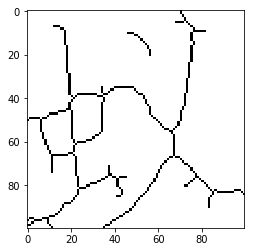

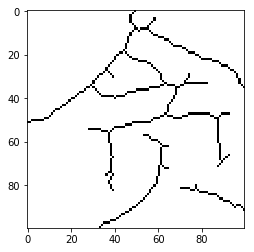

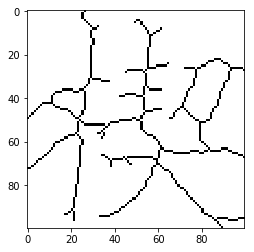

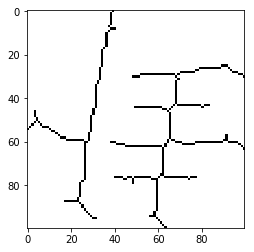

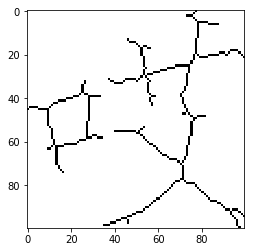

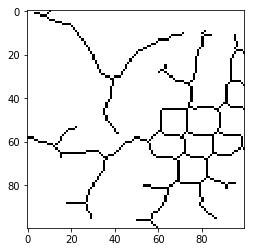

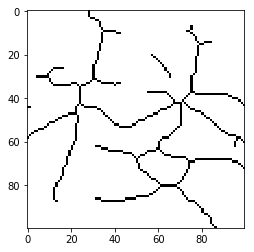

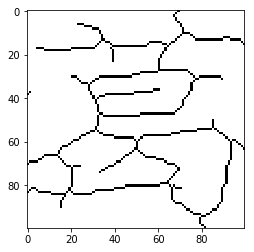

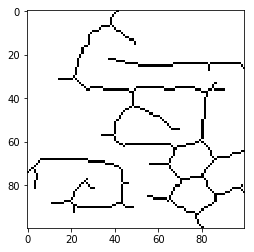

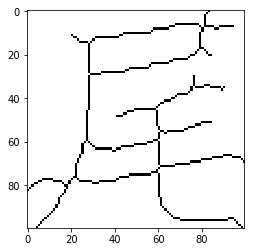

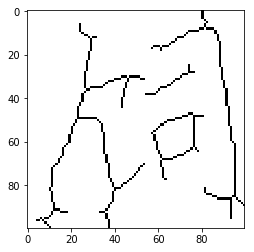

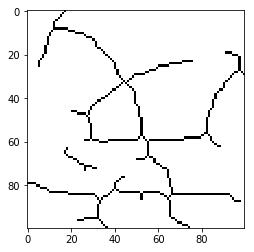

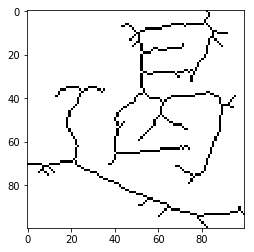

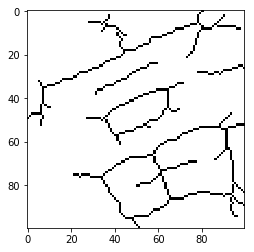

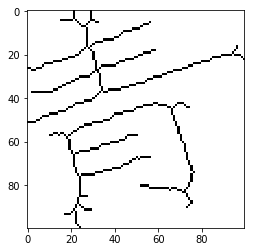

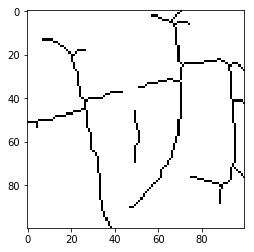

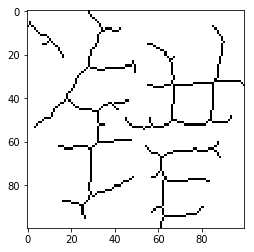

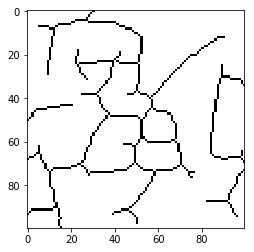

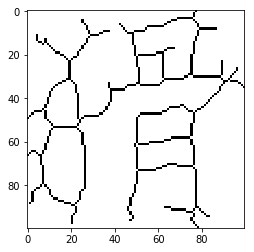

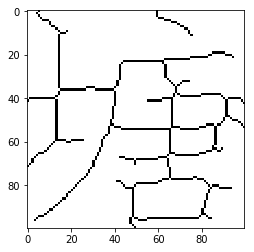

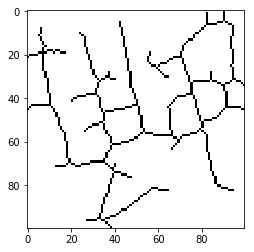

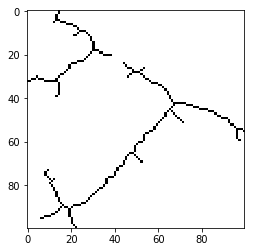

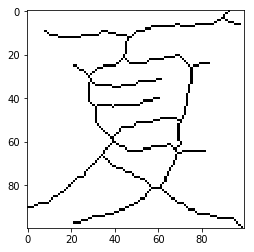

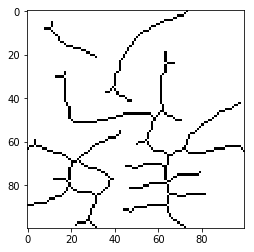

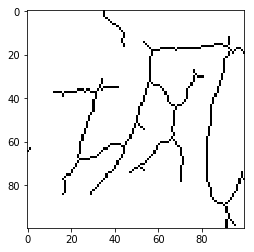

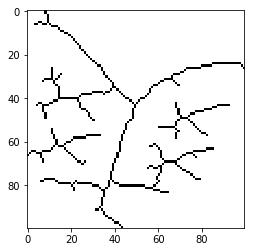

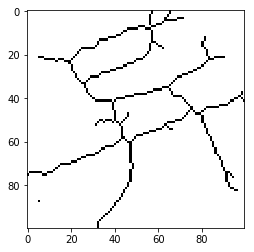

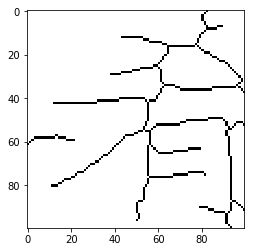

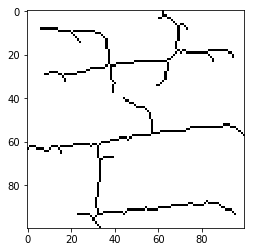

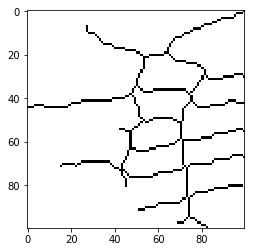

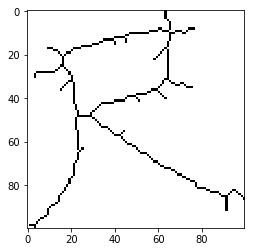

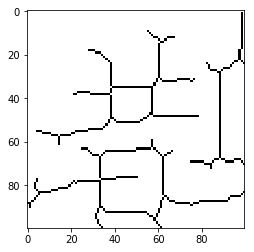

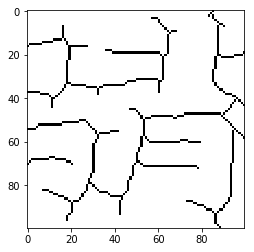

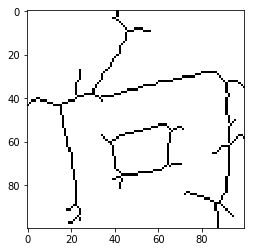

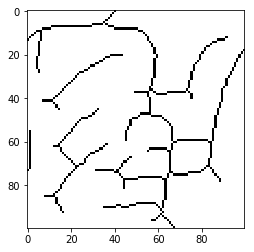

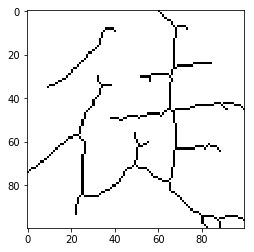

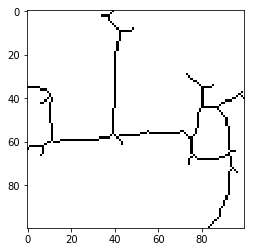

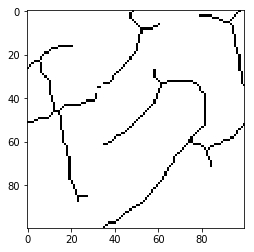

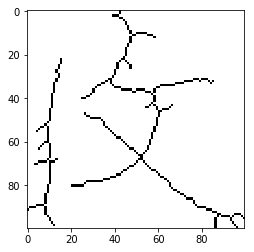

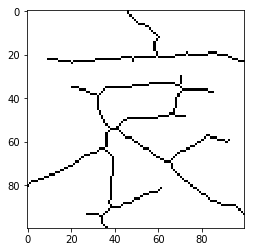

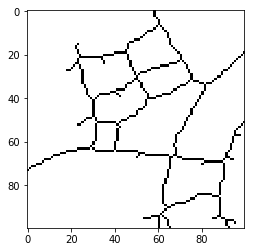

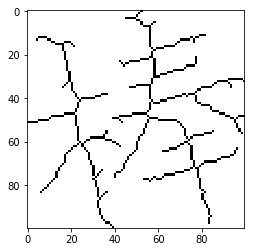

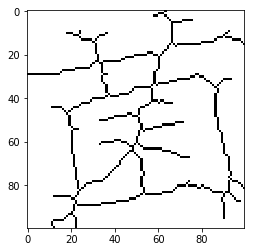

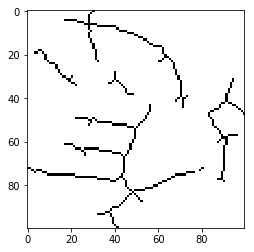

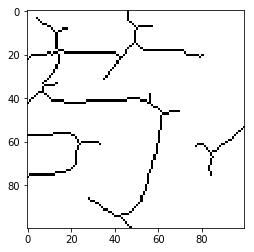

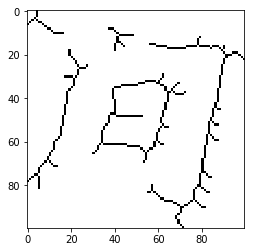

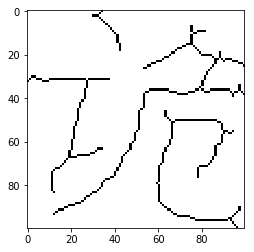

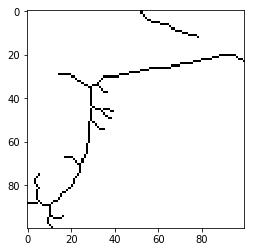

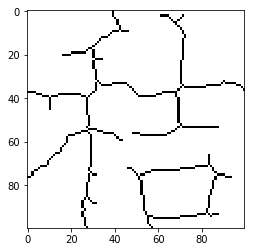

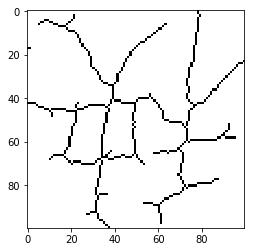

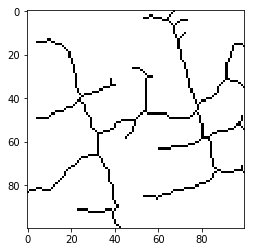

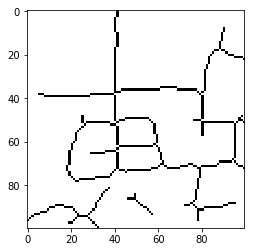

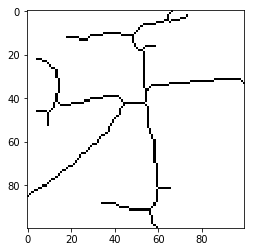

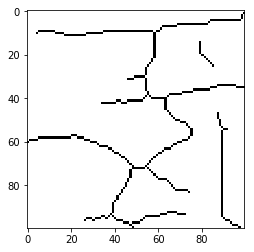

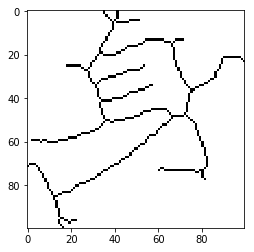

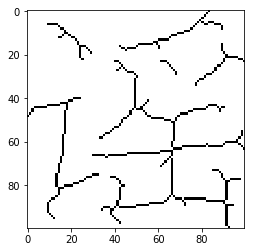

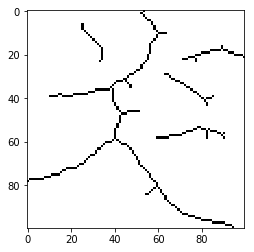

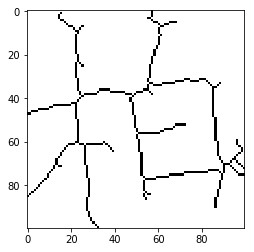

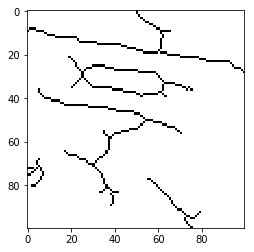

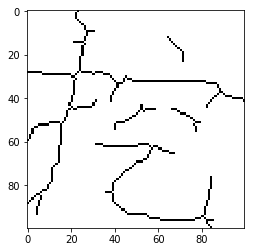

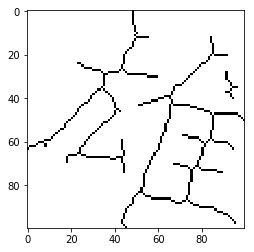

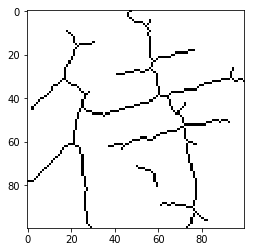

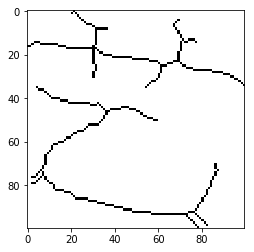

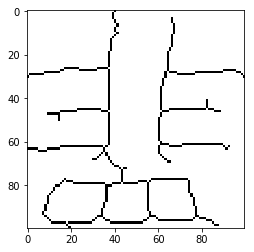

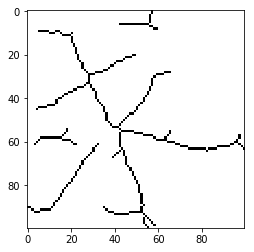

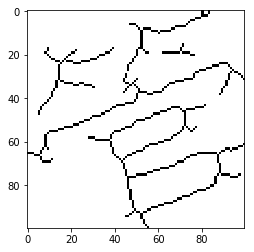

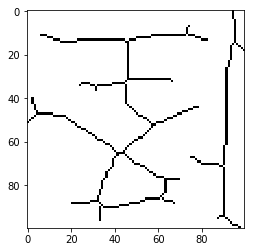

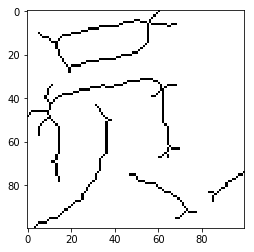

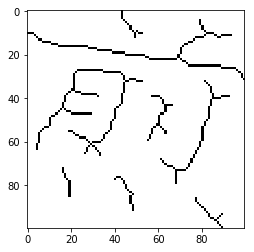

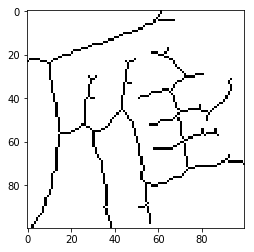

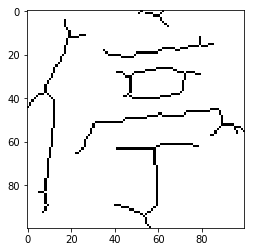

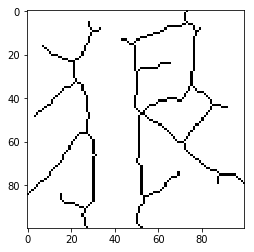

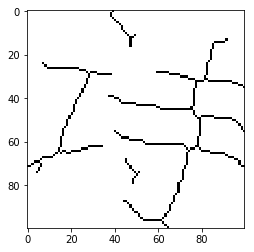

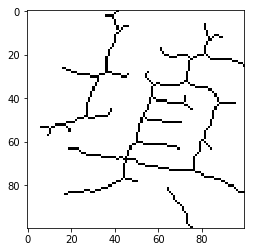

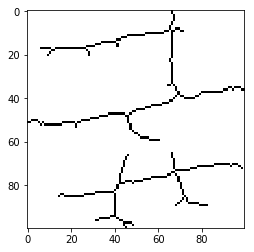

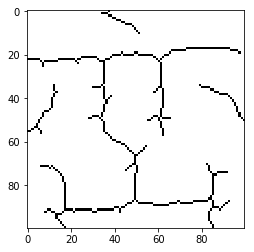

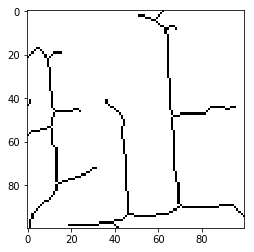

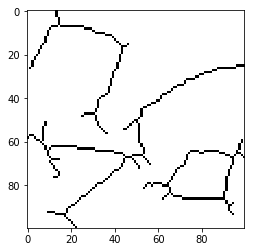

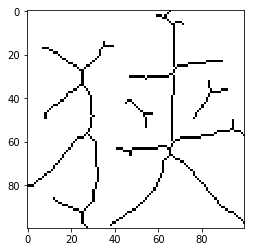

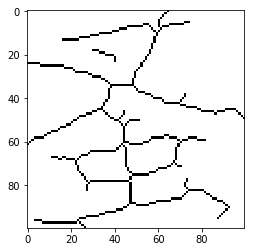

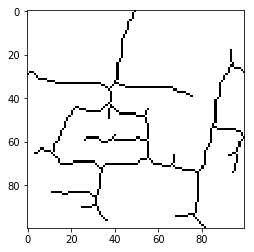

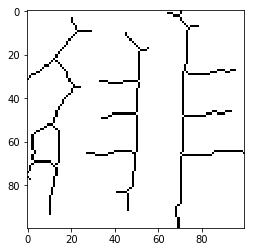

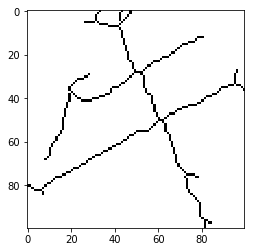

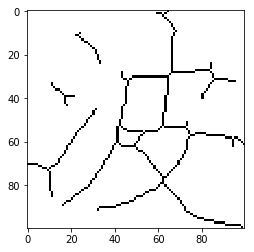

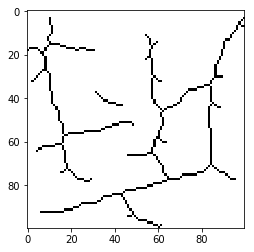

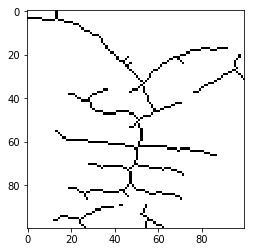

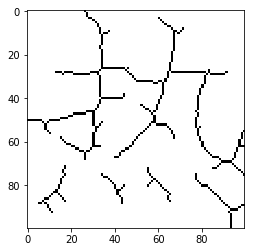

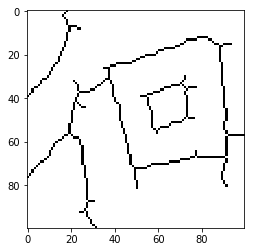

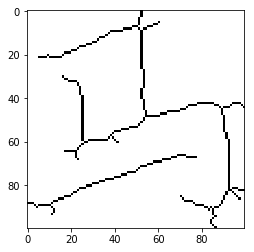

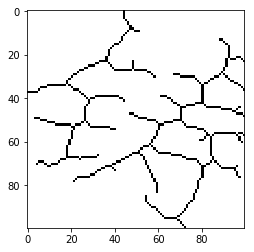

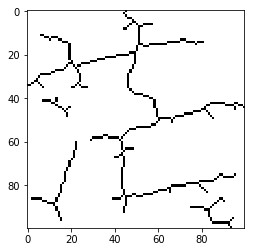

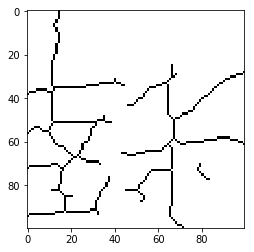

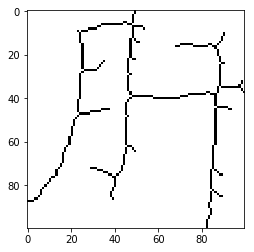

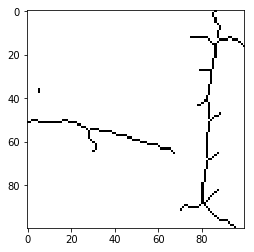

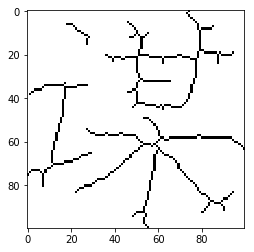

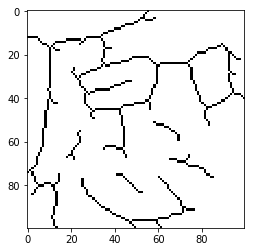

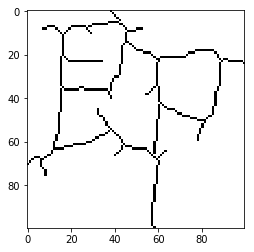

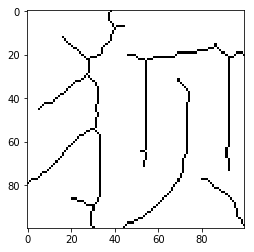

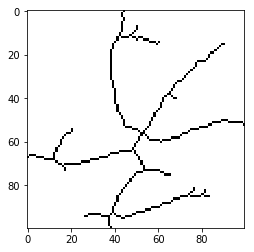

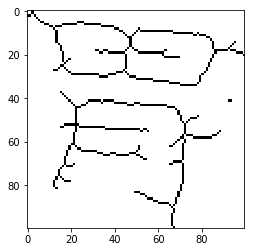

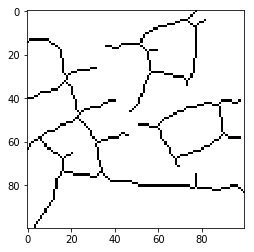

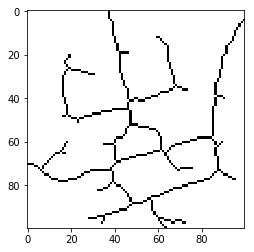

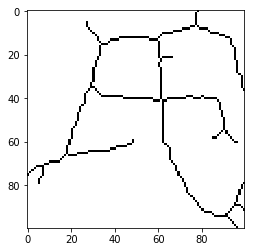

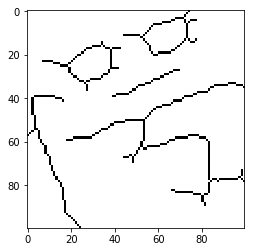

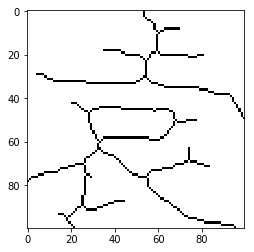

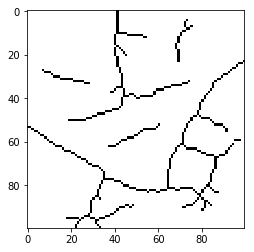

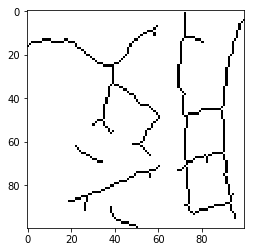

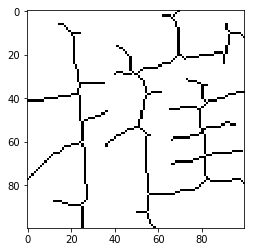

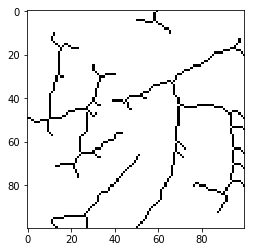

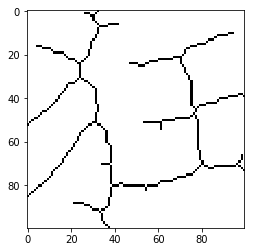

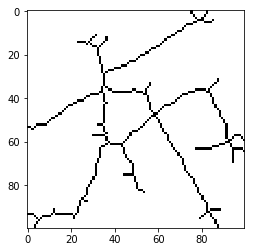

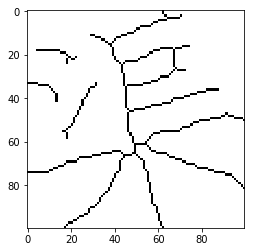

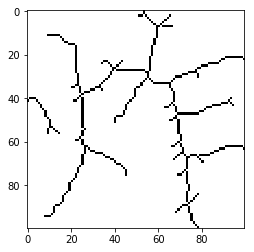

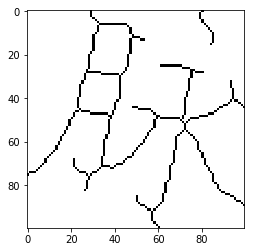

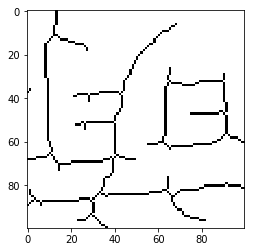

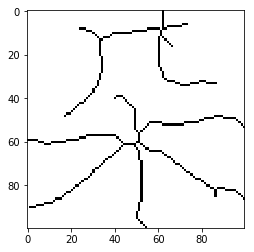

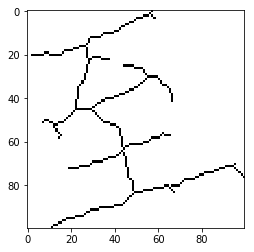

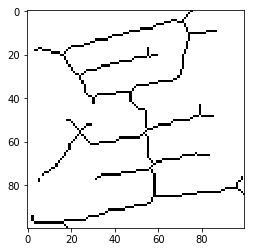

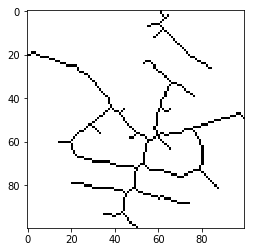

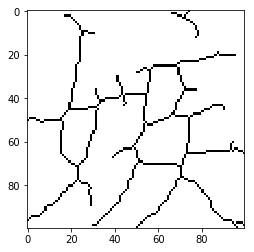

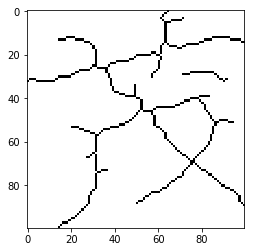

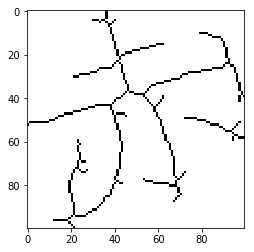

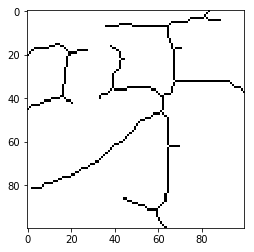

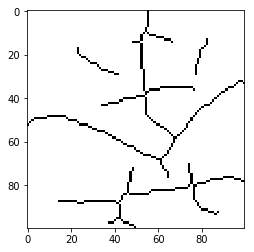

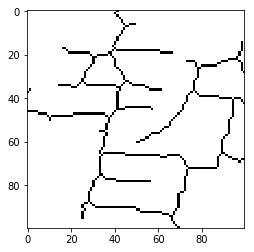

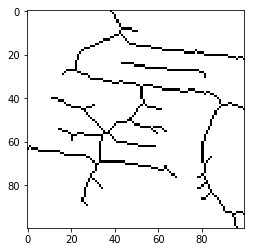

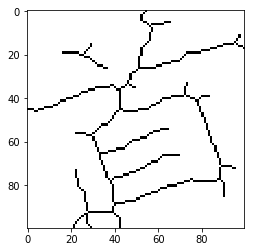

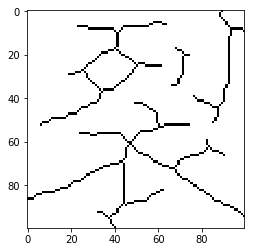

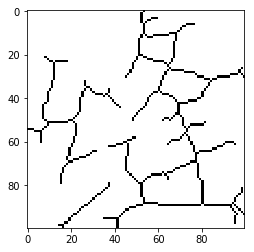

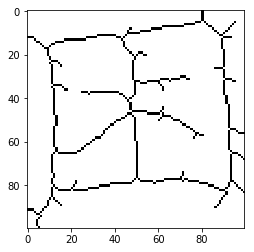

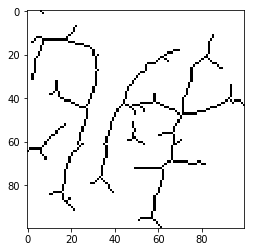

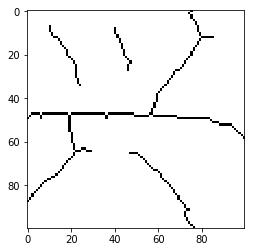

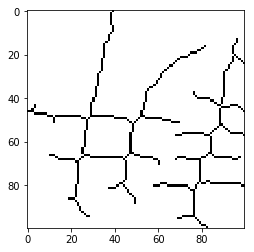

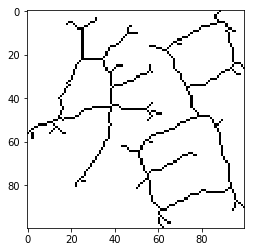

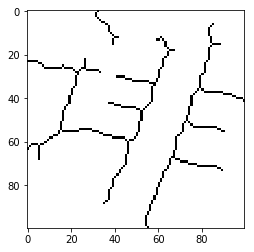

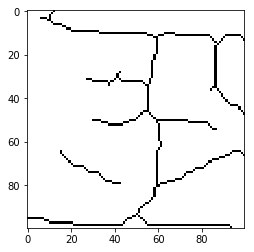

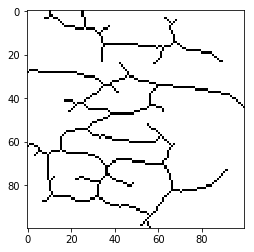

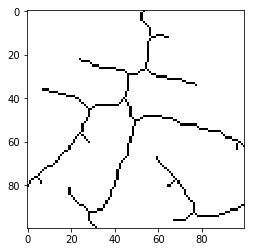

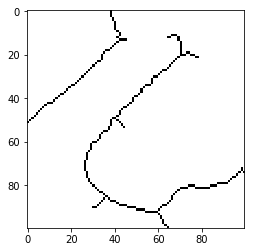

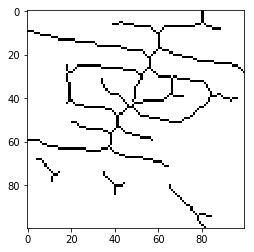

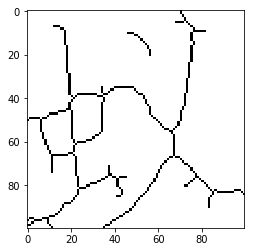

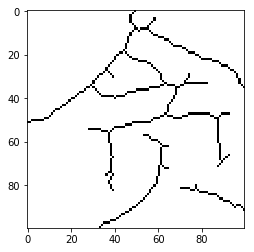

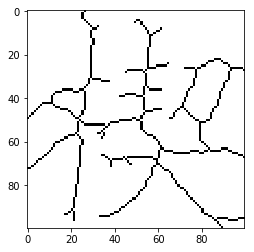

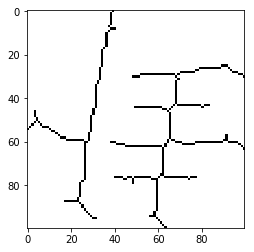

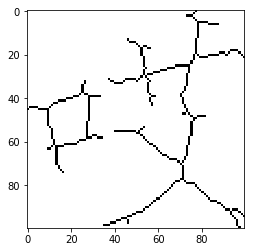

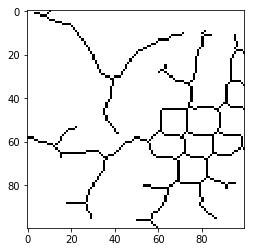

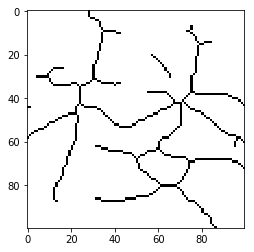

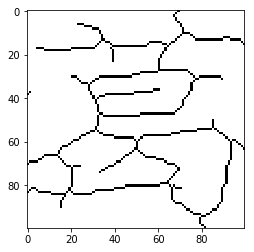

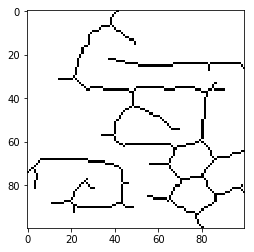

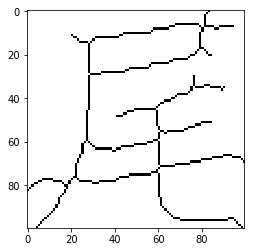

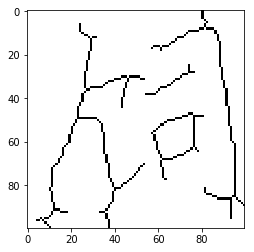

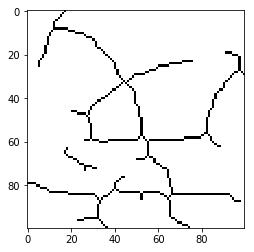

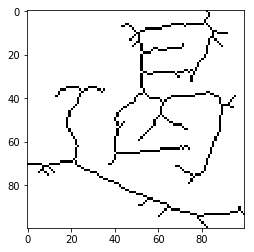

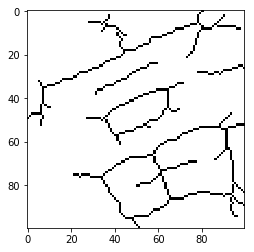

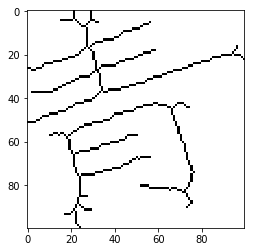

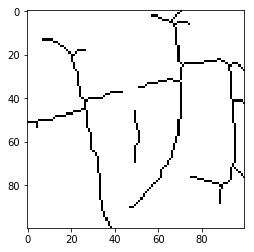

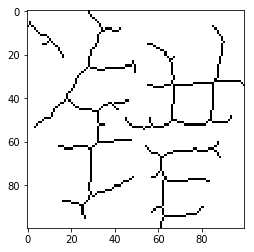

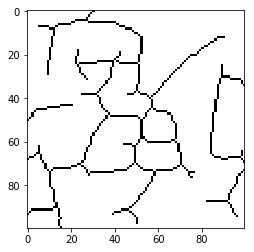

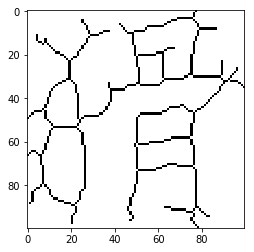

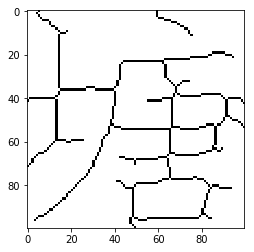

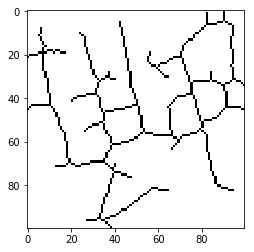

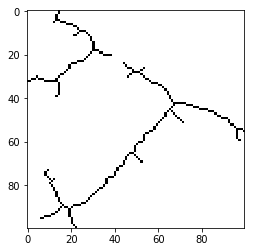

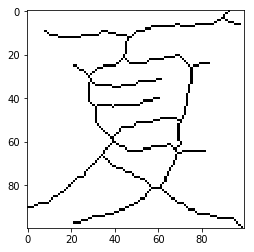

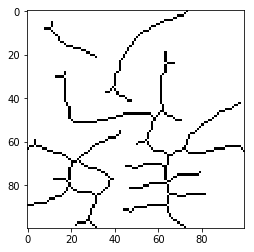

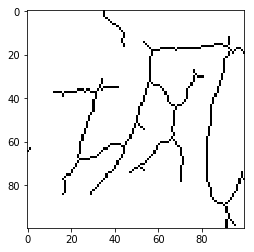

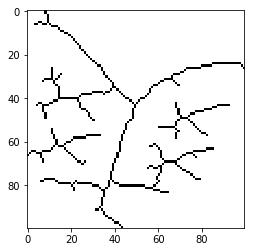

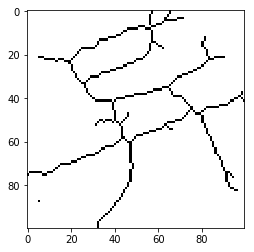

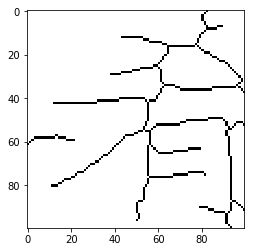

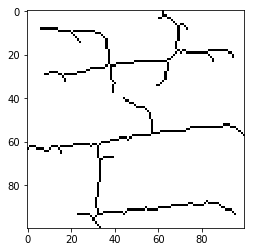

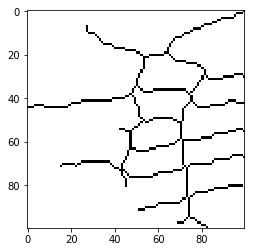

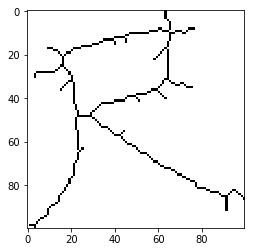

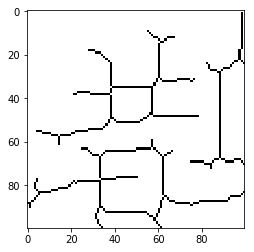

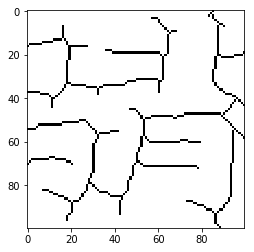

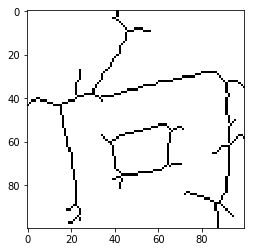

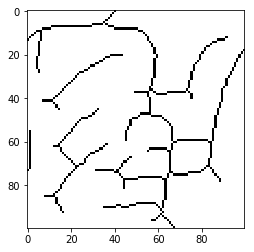

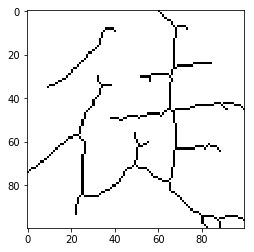

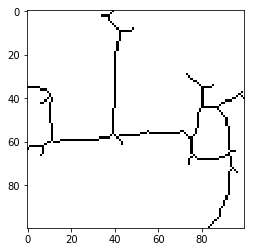

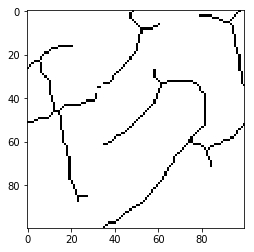

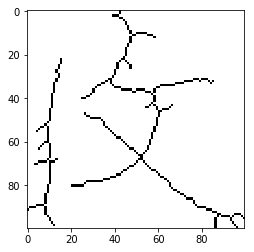

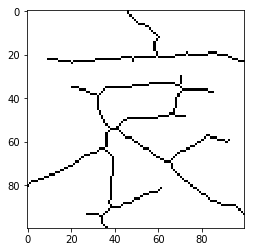

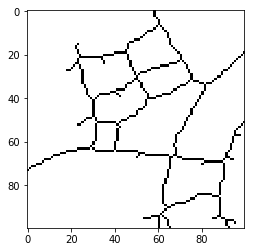

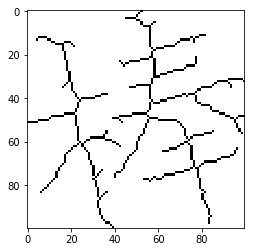

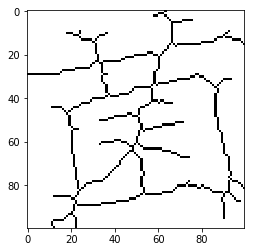

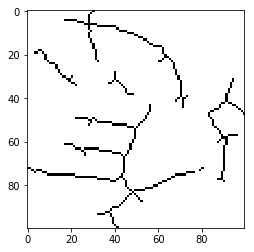

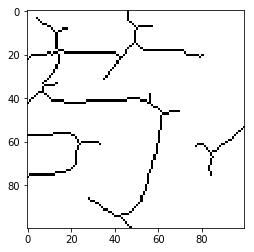

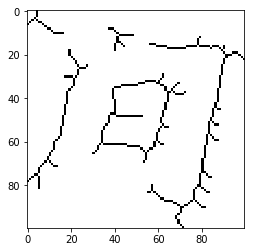

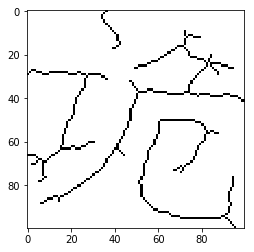

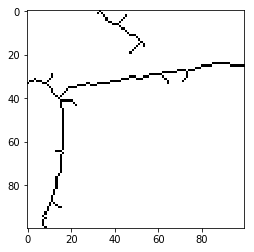

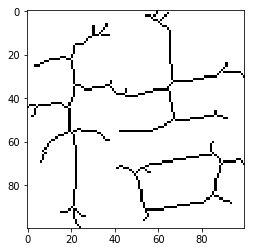

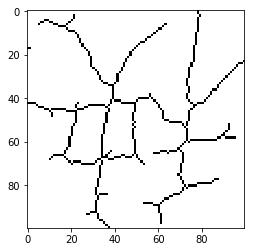

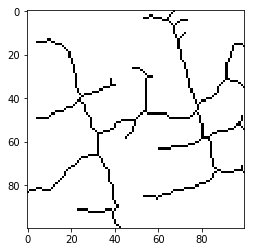

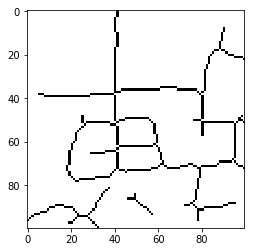

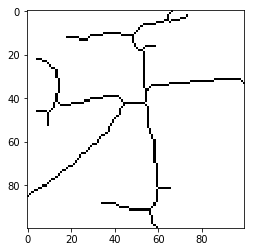

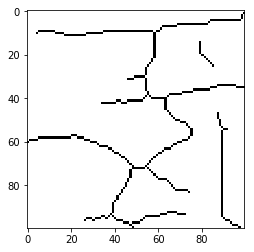

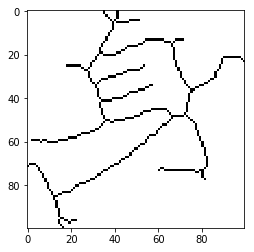

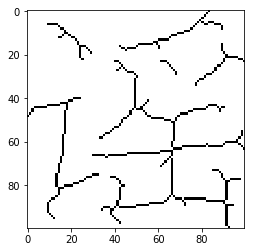

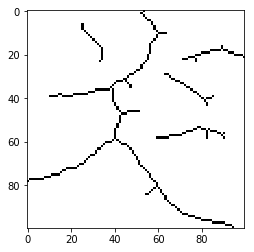

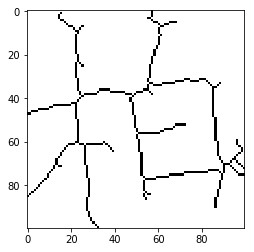

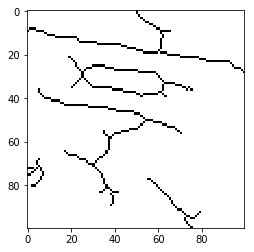

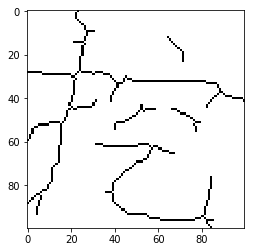

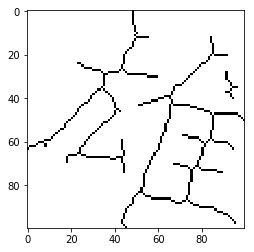

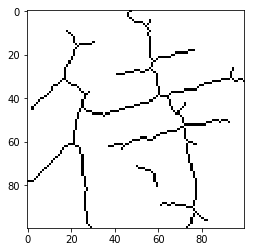

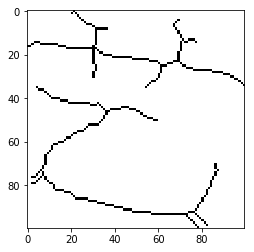

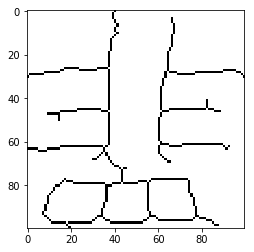

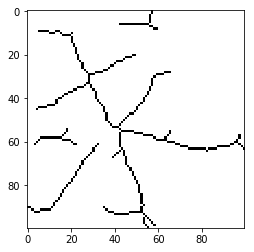

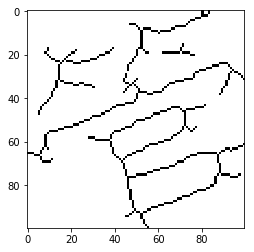

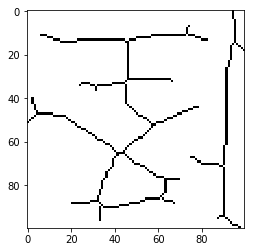

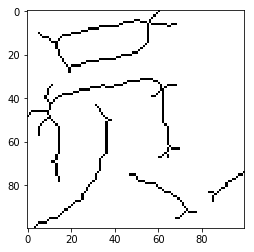

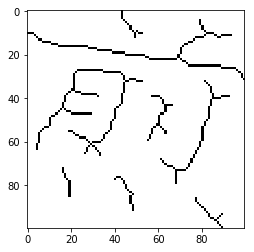

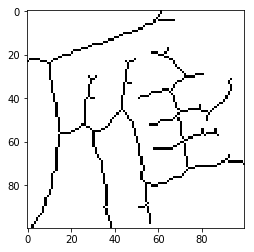

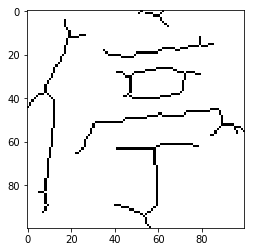

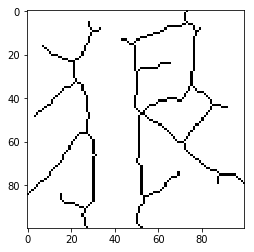

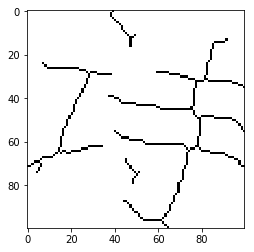

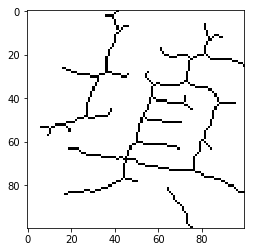

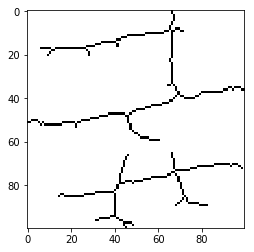

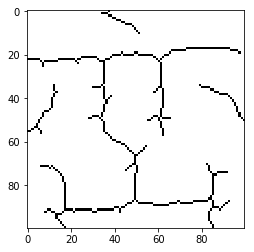

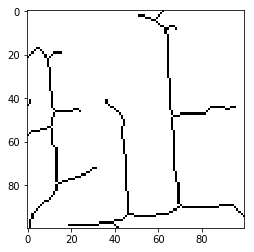

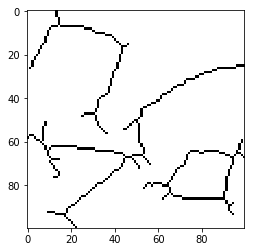

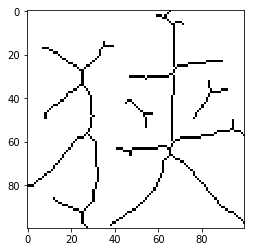

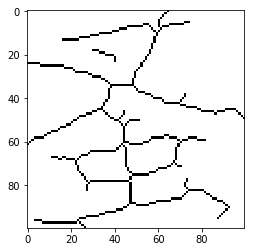

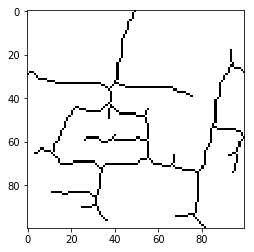

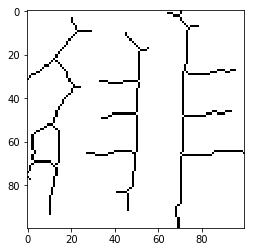

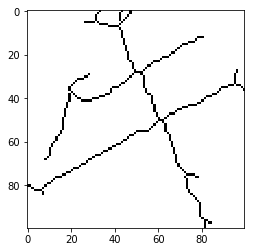

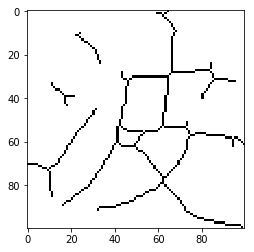

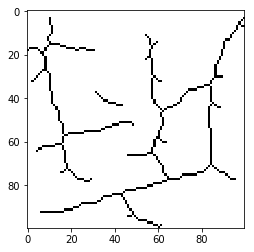

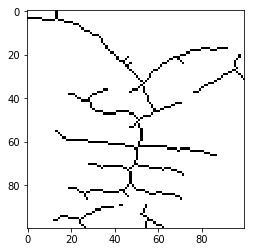

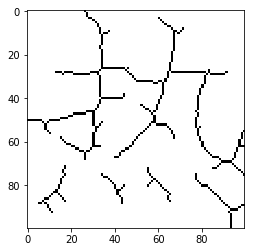

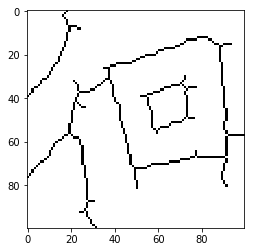

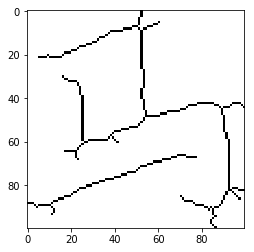

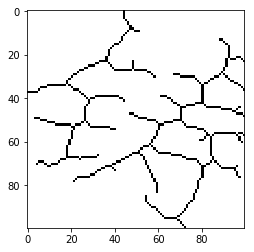

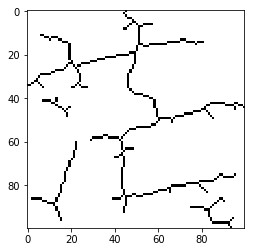

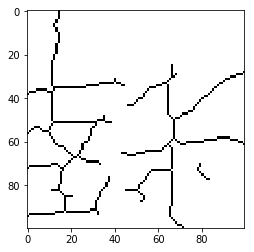

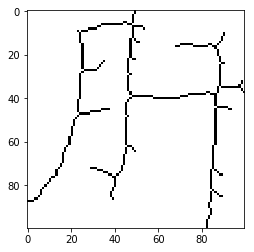

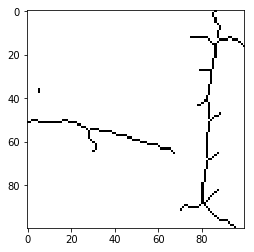

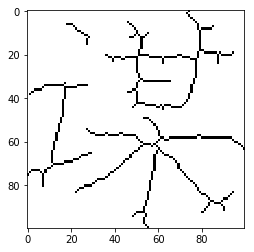

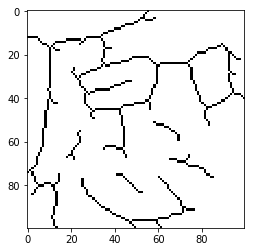

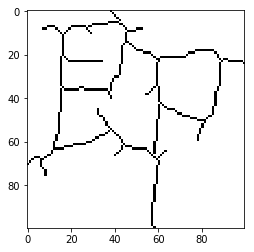

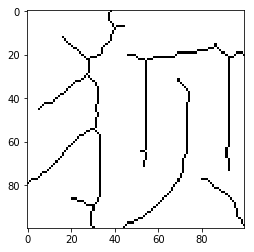

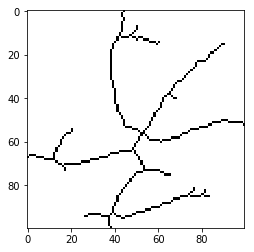

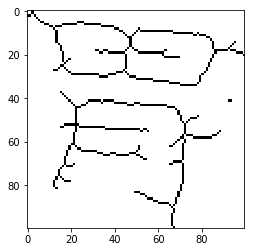

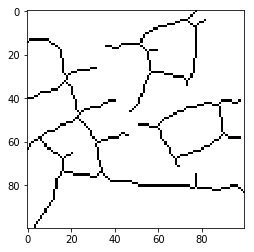

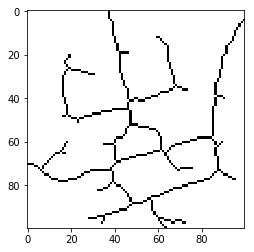

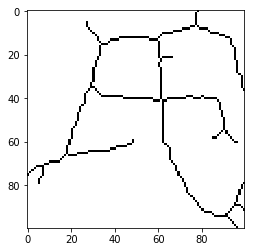

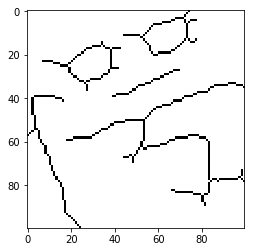

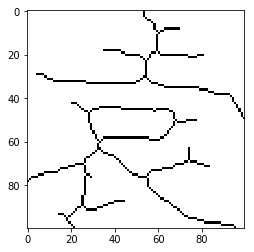

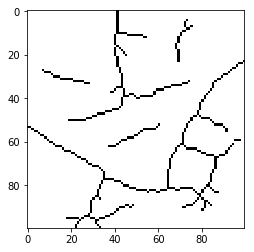

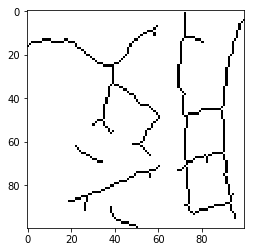

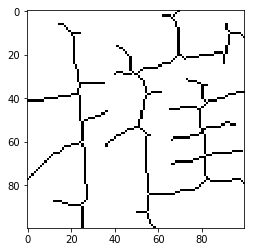

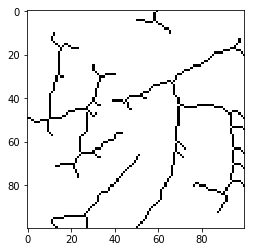

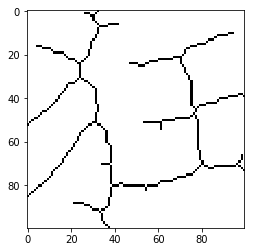

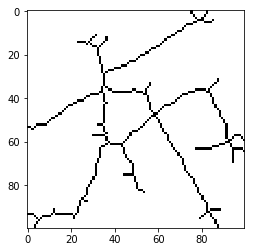

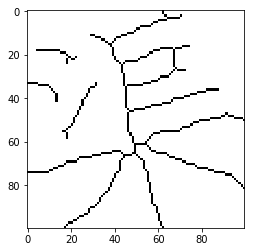

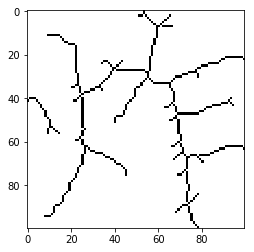

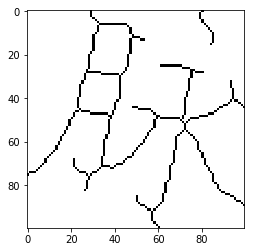

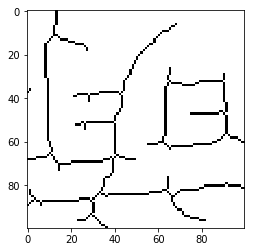

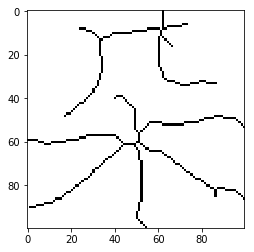

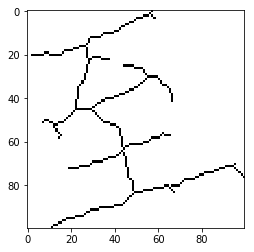

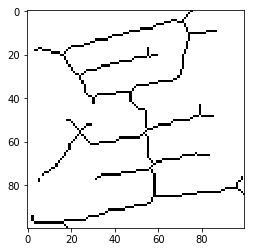

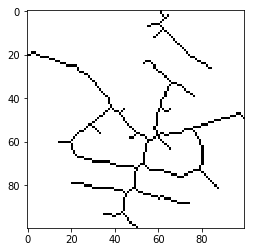

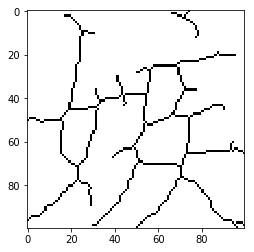

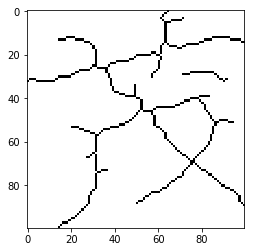

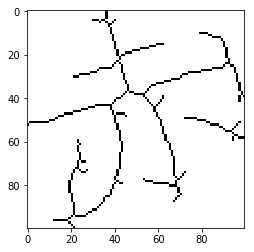

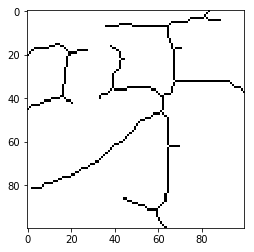

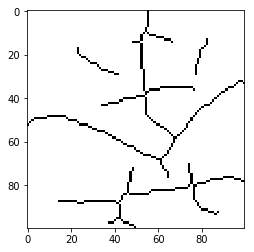

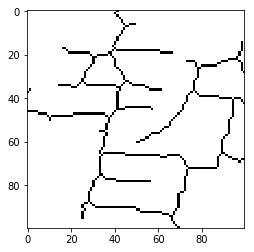

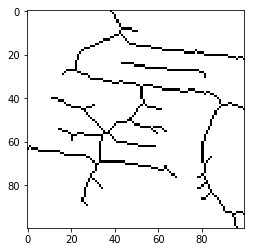

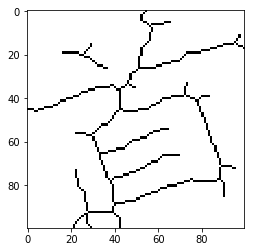

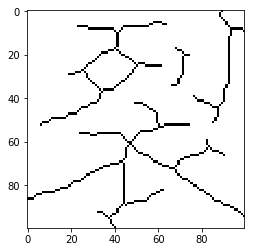

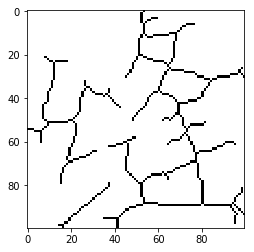

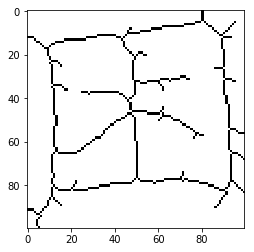

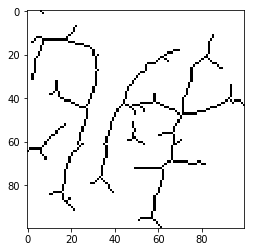

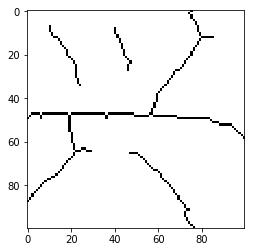

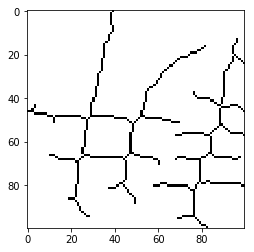

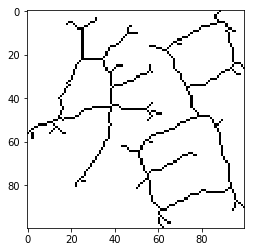

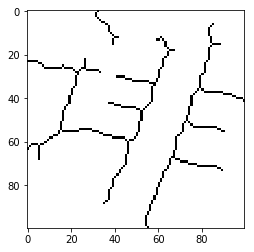

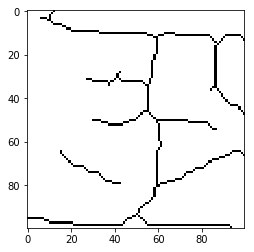

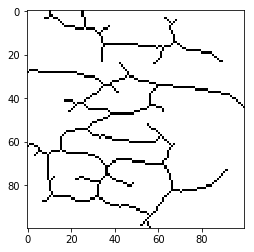

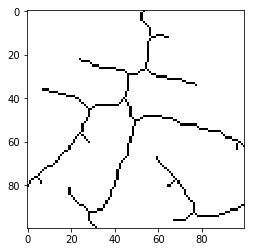

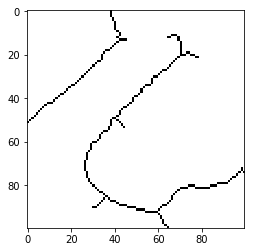

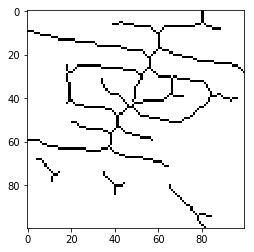

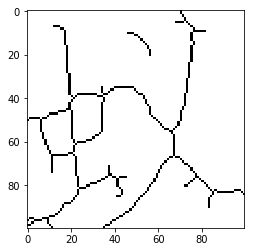

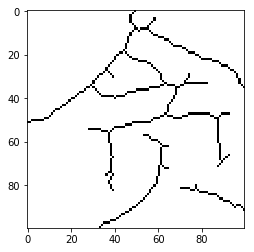

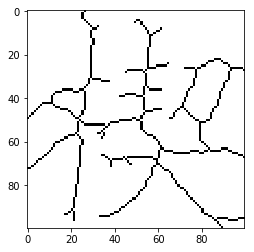

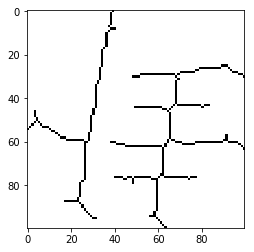

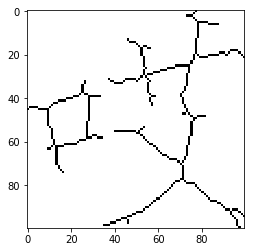

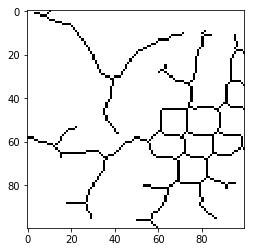

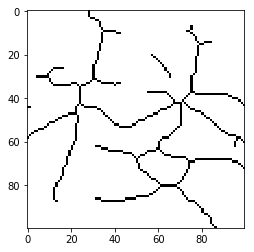

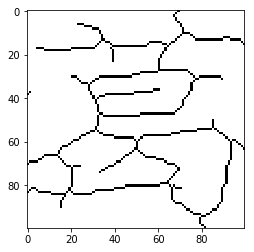

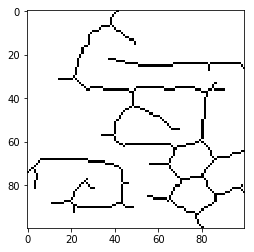

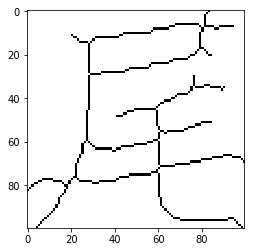

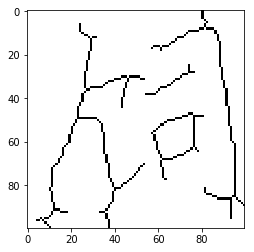

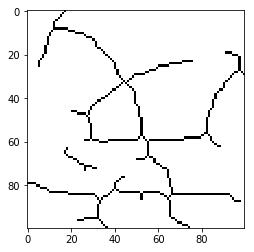

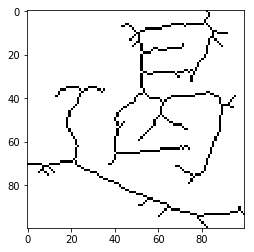

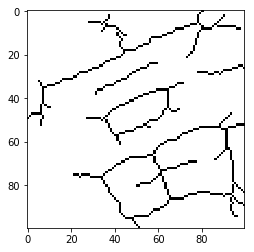

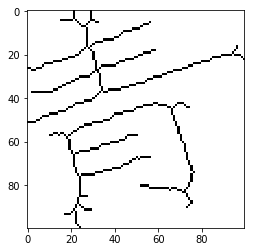

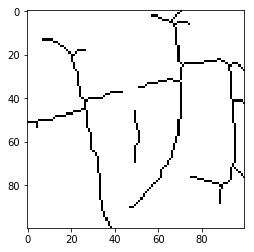

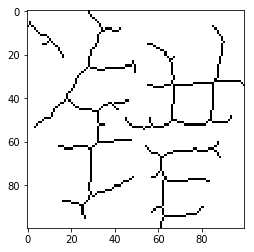

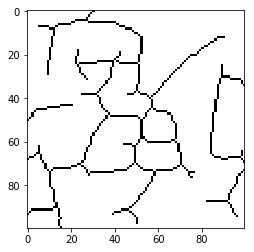

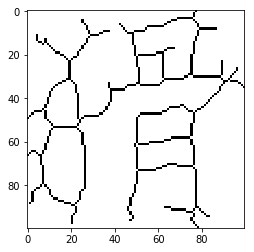

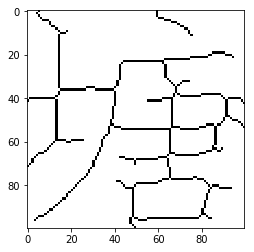

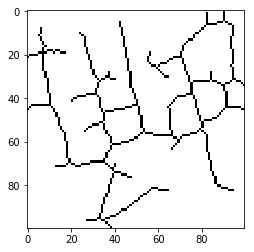

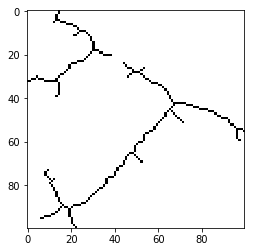

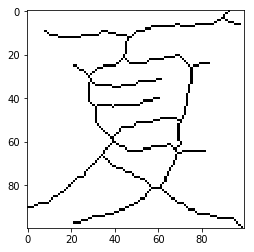

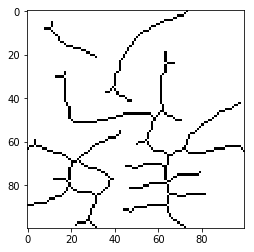

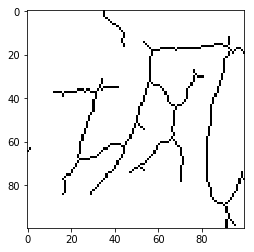

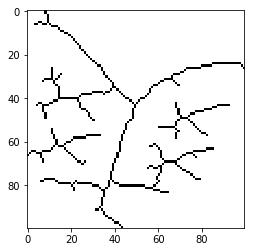

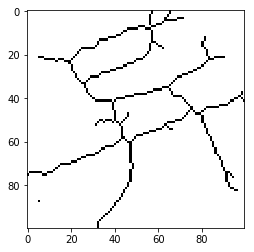

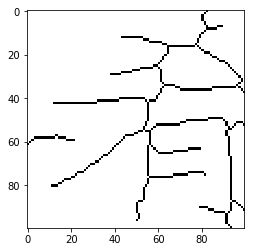

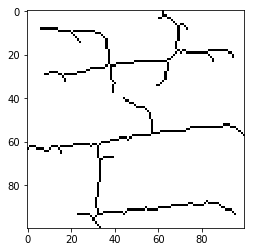

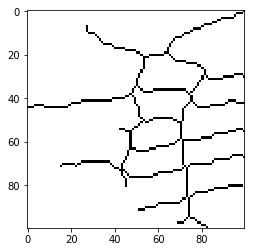

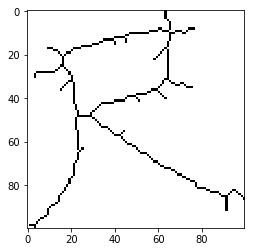

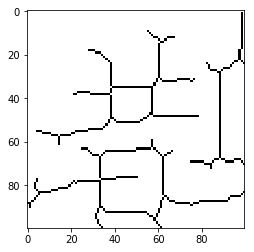

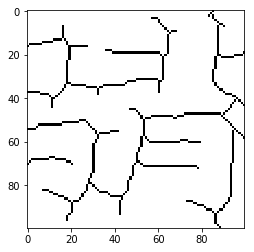

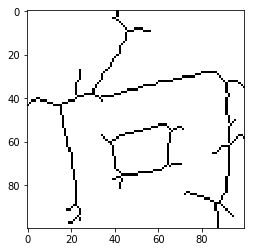

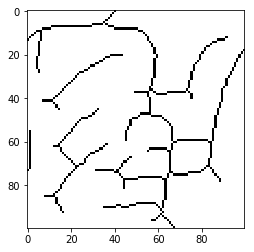

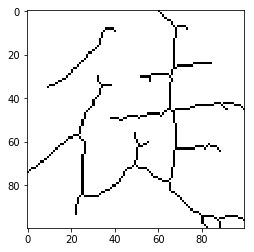

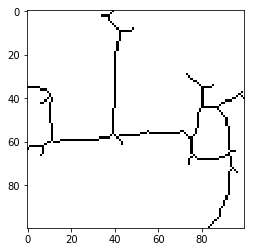

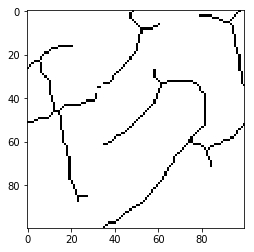

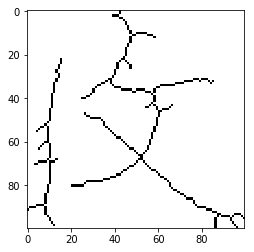

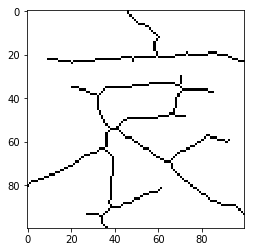

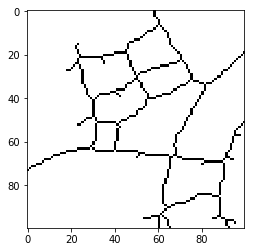

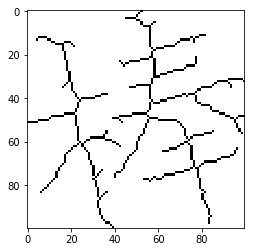

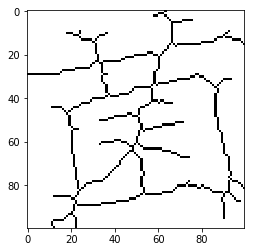

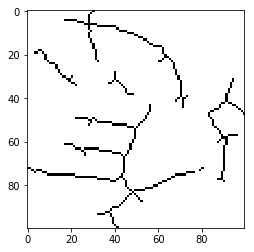

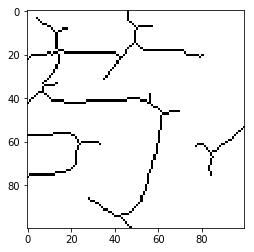

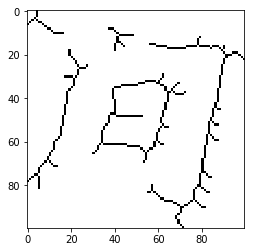

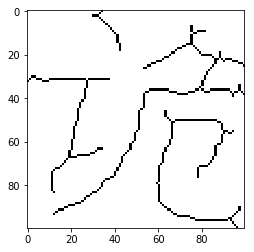

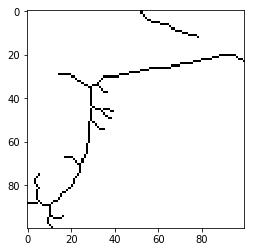

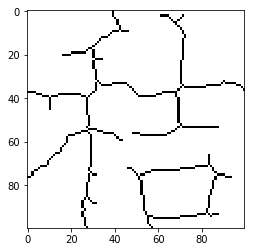

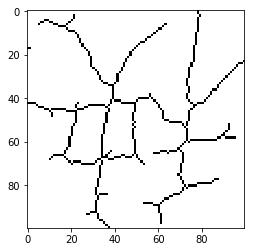

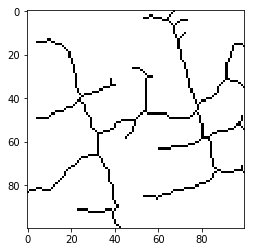

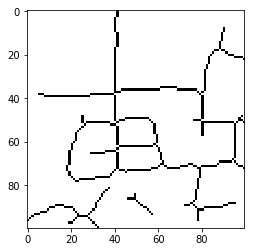

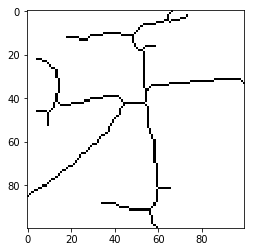

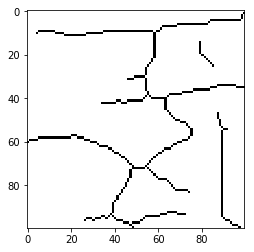

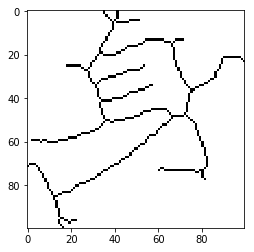

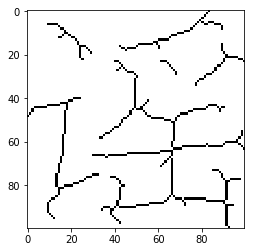

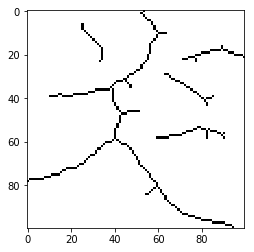

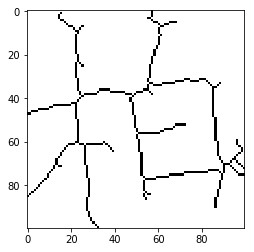

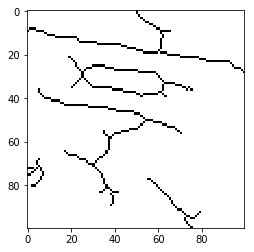

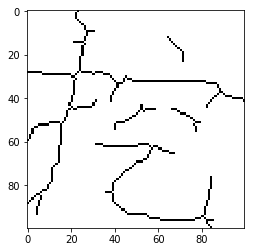

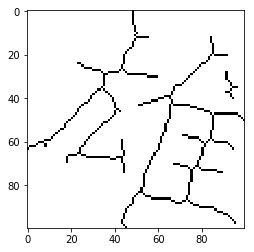

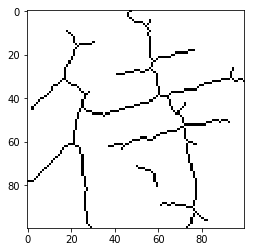

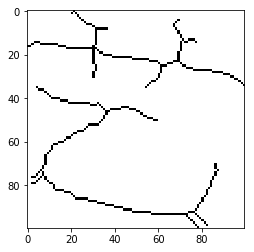

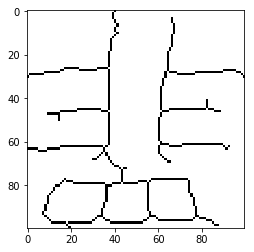

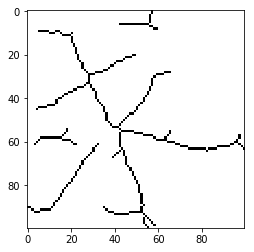

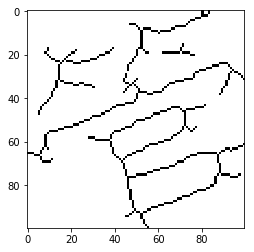

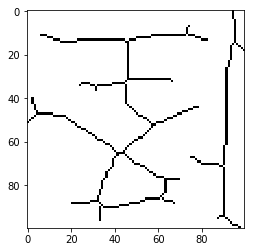

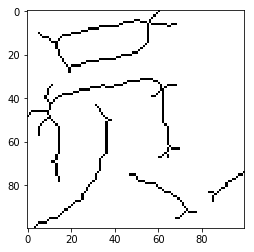

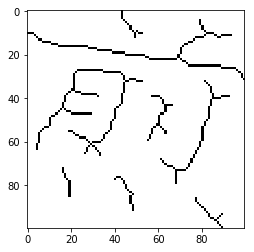

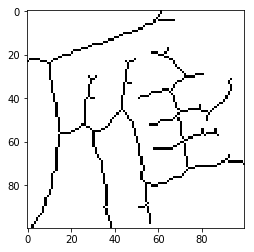

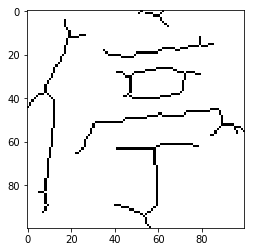

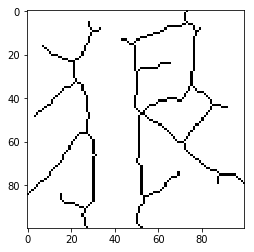

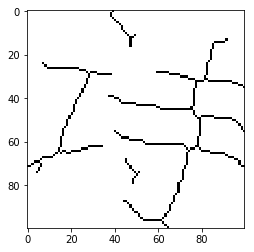

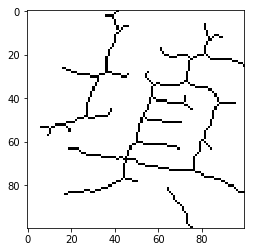

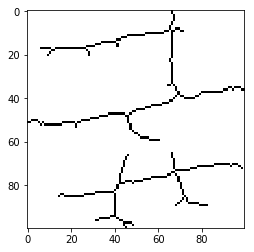

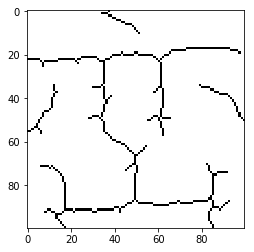

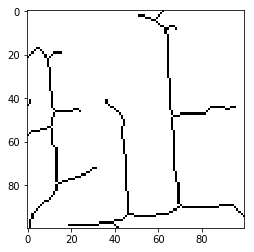

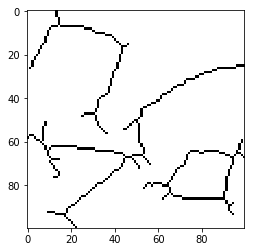

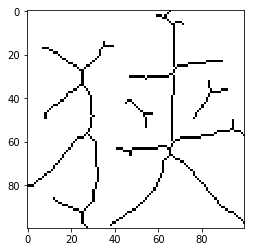

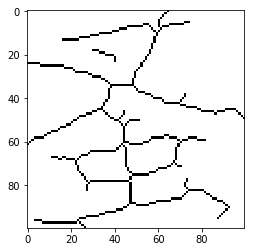

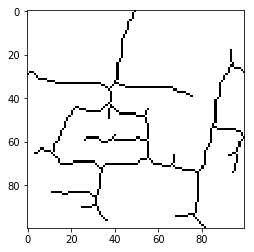

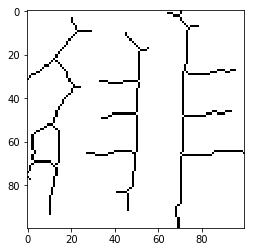

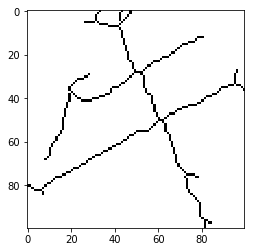

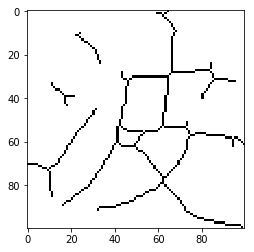

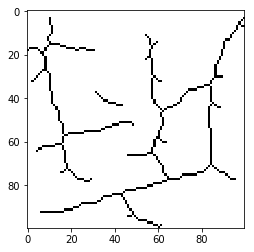

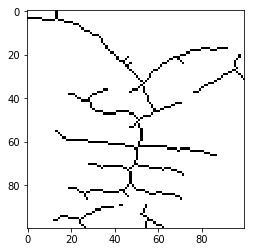

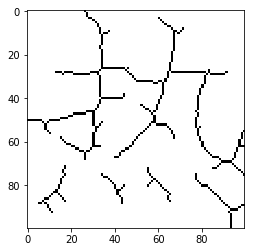

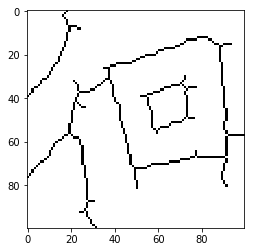

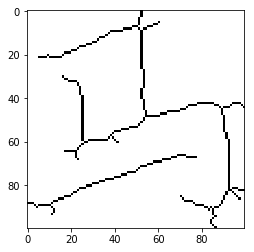

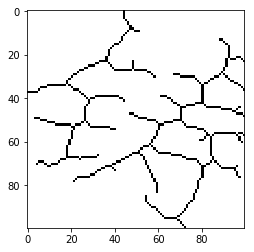

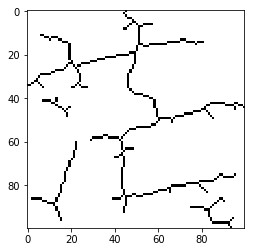

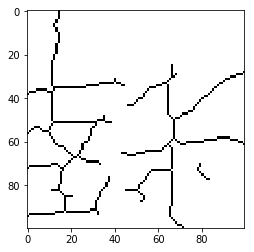

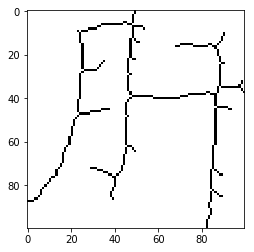

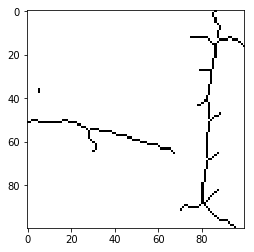

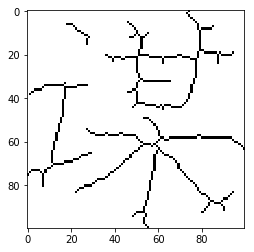

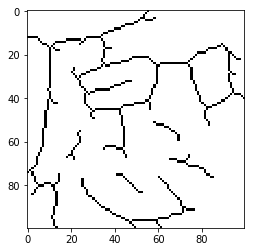

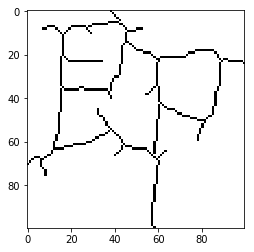

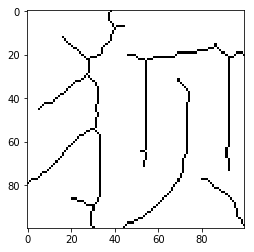

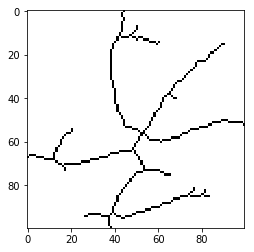

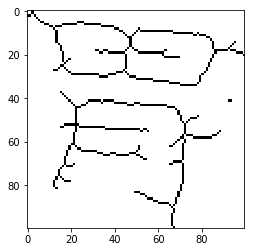

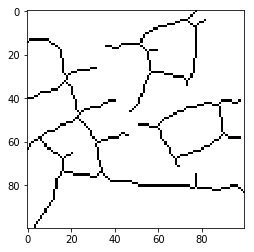

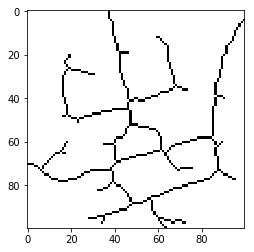

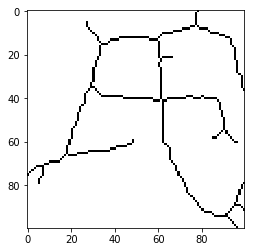

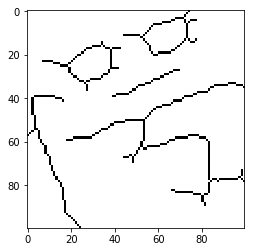

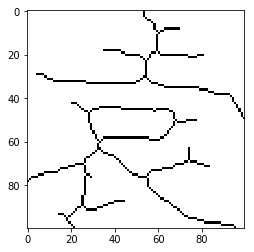

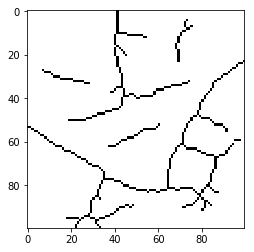

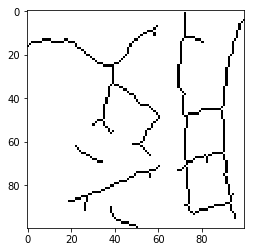

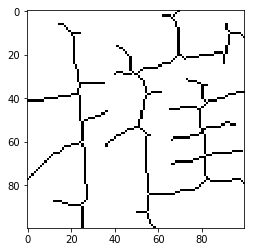

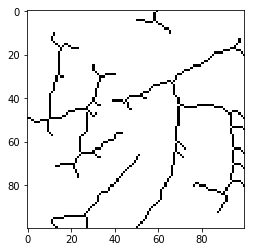

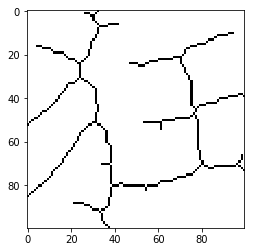

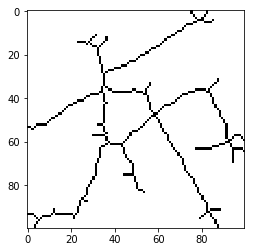

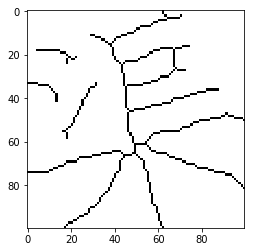

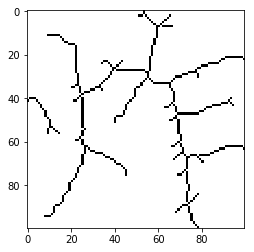

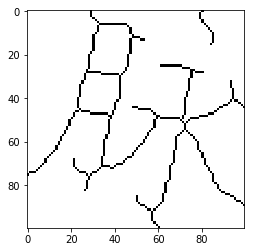

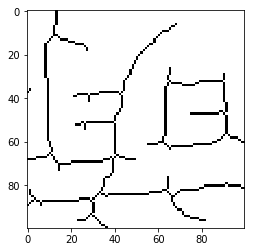

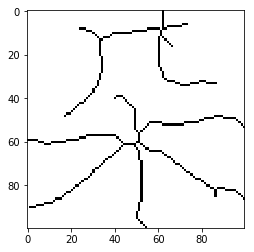

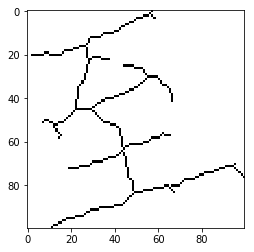

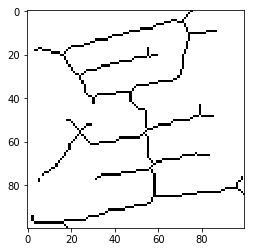

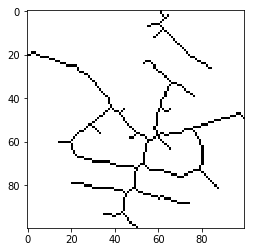

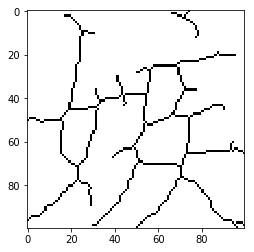

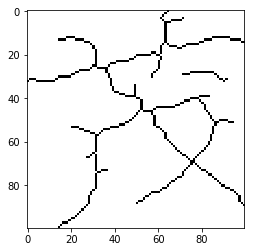

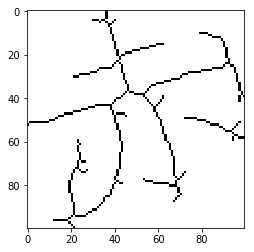

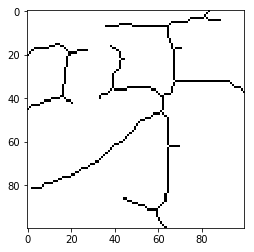

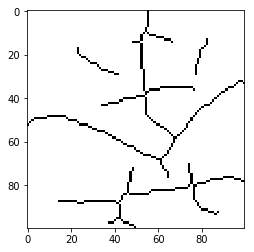

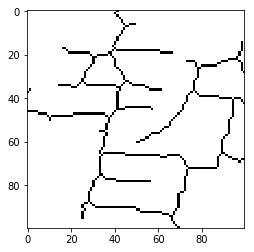

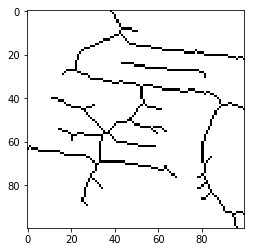

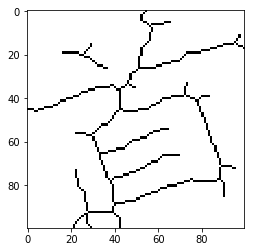

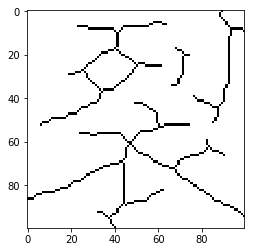

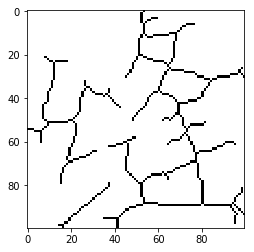

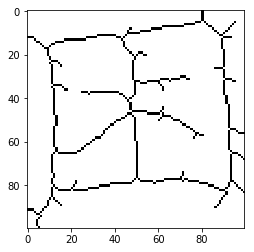

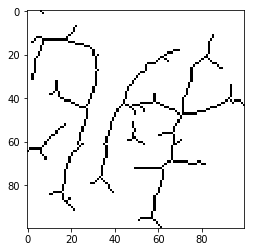

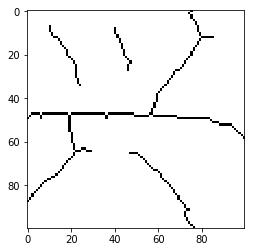

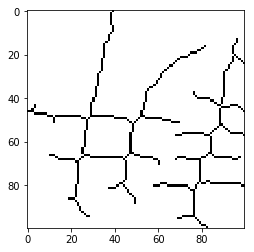

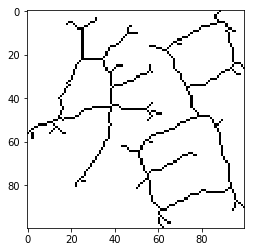

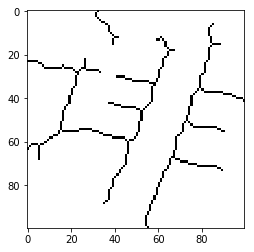

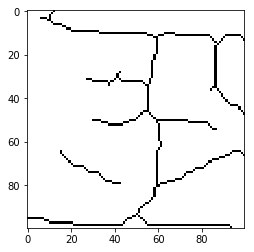

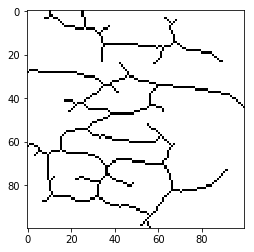

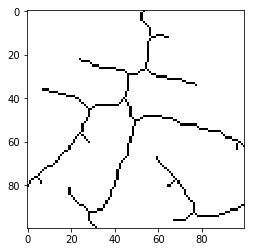

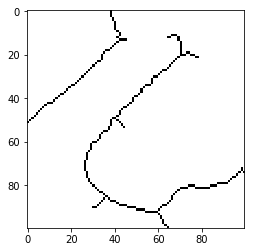

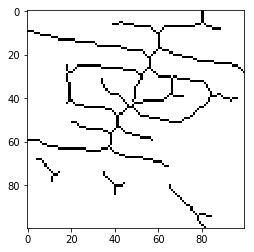

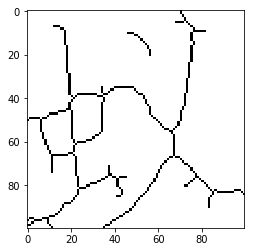

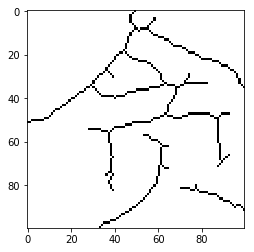

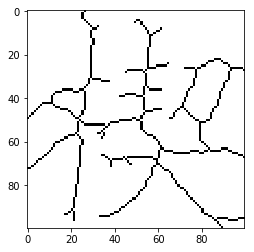

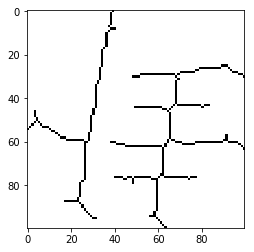

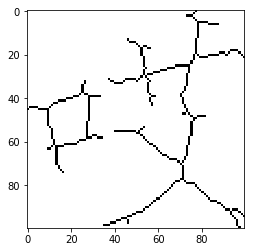

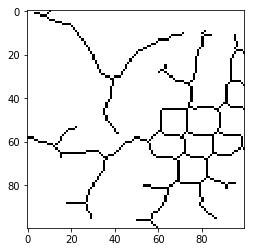

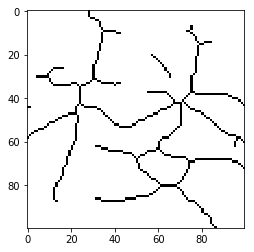

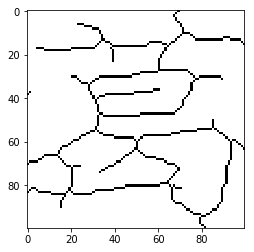

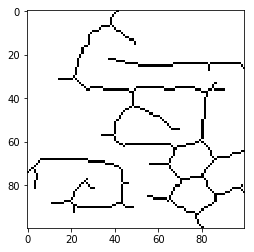

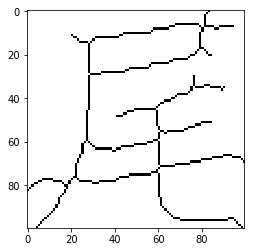

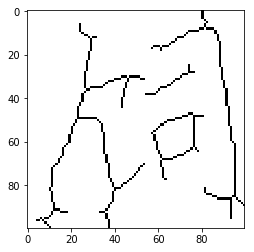

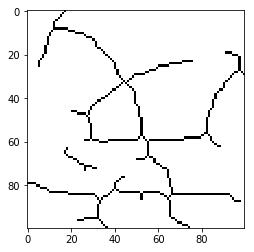

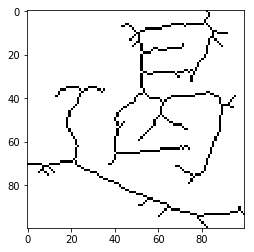

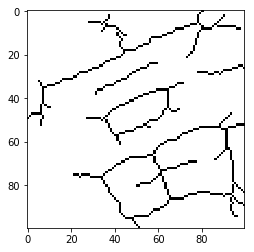

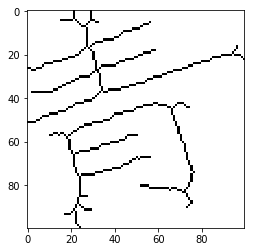

In [9]:
import pickle
id2word = {}
word2id = {}
with open(r"Data/id2word.pkl","rb") as f:
    id2word = pickle.load(f)
with open(r"Data/word2id.pkl","rb") as f:
    word2id = pickle.load(f)
    
img_dir = r'.\CaptchaData'
kk = 7
k = 1 
weight =100
height = 100
wordsfeature = Word2Feature.Word2Feature()
knn = KNN(k)
get_words = ImageUtil.Captha2Words(kk,weight, height)
for k in range(1,20,2):
    kind_right = 0
    reverse_right = 0
    reverse_TP = 0
    reverse_FP = 0
    reverse_FN = 0
    reverse_TN = 0
    all_right = 0
    test_num = kk * len(os.listdir(img_dir))
    for img_name in (os.listdir(img_dir)):
        print(img_name)
        split_name = img_name.split(" ") 
        labels = np.zeros((kk,2),dtype="int16")
        for i in range(0,kk):
            # print(split_name[2*i])
            # print(word2id[split_name[2*i]])
            if split_name[2*i] in word2id.keys():
                labels[i,0] = word2id[split_name[2*i]]
            else : 
                labels[i,0] = -1
            # print(split_name[2*i+1])
            labels[i,1] = int(split_name[2*i+1])
            
        # print(labels)
        img_path = os.path.join(img_dir, img_name)
        words = get_words.run(img_path)
        # rename =''
        for i in range(kk):
            label = labels[i,:]
            word = words[i,...]
            word = Word2Feature.rotating_calipers(word) 
            word = xihua.XiHua.Xihua(word)
            feature = wordsfeature.run(word) 
            distence = np.linalg.norm(train_X - feature,axis=1)
            predict_label = knn.run(distence,train_Y)
            if predict_label[0] == labels[i,0]:
                kind_right = kind_right + 1
            if predict_label[1] == labels[i,1]:
                reverse_right = reverse_right + 1
            if predict_label[0] == labels[i,0] and predict_label[1] == labels[i,1]:
                all_right = all_right + 1
            
            if label[1] ==1 and predict_label[1] ==1:
                reverse_TP = reverse_TP + 1
            if label[1] ==0 and predict_label[1] ==1:
                reverse_FP = reverse_FP + 1
            if label[1] ==1 and predict_label[1] ==0:
                reverse_FN = reverse_FN + 1
            if label[1] ==0 and predict_label[1] ==0:
                reverse_TN = reverse_TN + 1
    reverse_precision = reverse_TP/(reverse_TP+reverse_FP)
    reverse_recall = reverse_TP/(reverse_TP + reverse_FN)
    reverse_F1score = 2* reverse_precision*reverse_recall/(reverse_precision+reverse_recall)
    print(k,"准确率：汉字识别成功率{0:3f},反转识别成功率{1:3f}，F1score{2:3f},同时识别成功率{3:3f}".format(kind_right/test_num,reverse_right/test_num,reverse_F1score,all_right/test_num))
            # rename = rename + id2word[predict_label[0]] +' '+str(predict_label[1]) +(' ' if i != kk else '')
        # rename = rename +'.gif'
        # os.rename(img_path,os.path.join(img_dir,rename))
        # print(rename)

In [ ]:

k = 51
for k in range(1,10):
    knn = KNN(k)
    test_num = 100 
    kind_right = 0
    reverse_right = 0
    all_right = 0
    for i in range(test_num):#range(test_X.shape[0]):
        x = test_X[i,:]
        y = test_Y[i,:]
        distence = np.linalg.norm(train_X - x,axis=1)
        predict_label = knn.run(distence,train_Y)
        if predict_label[0] == y[0]:
            kind_right = kind_right + 1
        if predict_label[1] == y[1]:
            reverse_right = reverse_right + 1
        if predict_label[0] == y[0] and predict_label[1] == y[1]:
            all_right = all_right + 1
        # print(i)
    print(k,"准确率：汉字识别成功率{0:3f},反转识别成功率{1:3f}，同时识别成功率{2:3f}".format(kind_right/test_num,reverse_right/test_num,all_right/test_num))

In [12]:
dis = np.random.randint(50, size=(100,))
np.unique(dis,return_counts=True)

(array([ 0,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38,
        40, 41, 42, 43, 44, 45, 47]),
 array([1, 3, 2, 2, 4, 5, 1, 4, 2, 7, 1, 1, 2, 2, 2, 2, 1, 3, 2, 5, 1, 2, 3,
        2, 2, 2, 2, 2, 3, 4, 2, 4, 4, 5, 1, 3, 2, 1, 1, 1, 1], dtype=int64))

In [39]:
dic = {"1":2,"3":4}
dic.keys()
word2id["魄"]



2106